### LoanTap: Logistic Regression

#### Problem Statement
##### LoanTap aims to provide tailored personal loans to salaried professionals by leveraging data-driven underwriting. The goal of this project is to develop a predictive model that assesses an individual’s creditworthiness based on their financial and demographic attributes. If deemed eligible, the model should also recommend optimal repayment terms (e.g., loan amount, tenure, interest rate) to minimize risk while ensuring business viability.
#### Key Challenges:
- ##### Accurately predicting default risk using given data.
- ##### Balancing risk assessment with customer-friendly loan terms to maintain competitiveness.
- ##### Ensuring interpretability of model decisions for regulatory and operational transparency.
##### By solving this, LoanTap can enhance its underwriting efficiency, reduce defaults, and offer faster, more personalized loan approvals.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [3]:
df = pd.read_csv("logistic_regression.csv")
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [4]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
df.shape

(396030, 27)

#### Data Overview:
*The dataset consists of **396,030** loan applications, each described by 27 features, including a mix of numerical and categorical variables. The target variable, **loan_status**, is binary (e.g., approved/rejected), making this a supervised classification problem.*
##### Key Observations:
##### Data Types:
*Categorical variables (e.g., employment type, loan purpose) are stored as **object** dtypes. Converting these to **category** type will optimize memory usage and ensure efficiency.
Numerical variables (e.g., income, loan amount) may require outlier treatment and/or scaling.*

In [7]:
# convert category dtypes
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [8]:
for col in df.select_dtypes(include=np.number).columns:
    print(f"Feature - {col}:-\
    Mean: {round(df[col].mean(), 2)},\
    Median: {round(df[col].median(), 2)},\
    Std Deviation: {round(np.std(df[col]), 2)},\
    # \n5 point Summary: {df[col].describe()[3:]}\n")
    # print(f"Feature - {col} :-\n{df[col].describe()[1:]}\n")

Feature - loan_amnt:-    Mean: 14113.89,    Median: 12000.0,    Std Deviation: 8357.43,    # 
5 point Summary: min      500.0
25%     8000.0
50%    12000.0
75%    20000.0
max    40000.0
Name: loan_amnt, dtype: float64

Feature - int_rate:-    Mean: 13.64,    Median: 13.33,    Std Deviation: 4.47,    # 
5 point Summary: min     5.32
25%    10.49
50%    13.33
75%    16.49
max    30.99
Name: int_rate, dtype: float64

Feature - installment:-    Mean: 431.85,    Median: 375.43,    Std Deviation: 250.73,    # 
5 point Summary: min      16.08
25%     250.33
50%     375.43
75%     567.30
max    1533.81
Name: installment, dtype: float64

Feature - annual_inc:-    Mean: 74203.18,    Median: 64000.0,    Std Deviation: 61637.54,    # 
5 point Summary: min          0.0
25%      45000.0
50%      64000.0
75%      90000.0
max    8706582.0
Name: annual_inc, dtype: float64

Feature - dti:-    Mean: 17.38,    Median: 16.91,    Std Deviation: 18.02,    # 
5 point Summary: min       0.00
25%      11.28
50%

#### Key Insights from Numerical Variables
##### Loan Amount (loan_amnt)
- *Mean (14.1k) > Median (12k): Right-skewed distribution, indicating a minority of larger loans.*
- *Range (500–40k): Flexible offerings, but larger loans may need stricter checks.*
##### Interest Rate (int_rate)
- *Wide range (5.32%–30.99%): Reflects risk-based pricing. Median (13.33%) aligns with industry standards.*
##### Income & Debt (annual_inc, dti)
- *Income skew (Mean 74.2k, Max 8.7M): Extreme outliers suggest data errors or high-net-worth applicants.*
- *DTI (Debt-to-Income): Median (16.91%) is manageable, but max (9999%) is nonsensical—needs cleaning.*
##### Credit History (revol_util, pub_rec)
- *Revolving Utilization (Median 54.8%): Over 50% usage may signal credit dependency.*
- *Public Records (Median 0): Most applicants have clean records, but max (86) indicates severe defaults.*
##### Credit Accounts (total_acc, mort_acc)
- *Total Accounts (Median 24): Healthy credit activity.*
- *Mortgage Accounts (Median 1): Low mortgage exposure—typical for salaried millennials.*
##### Risk Implications
- *High-risk signals: High revol_util, dti outliers, or pub_rec > 0.*
##### Actionable Steps:
- *Cap loan_amnt for high-dti applicants.*
- *Flag revol_util >70% for deeper scrutiny.*
- *Investigate/clean implausible values (annual_inc, dti).*

1-2-3-4-5-6-7-

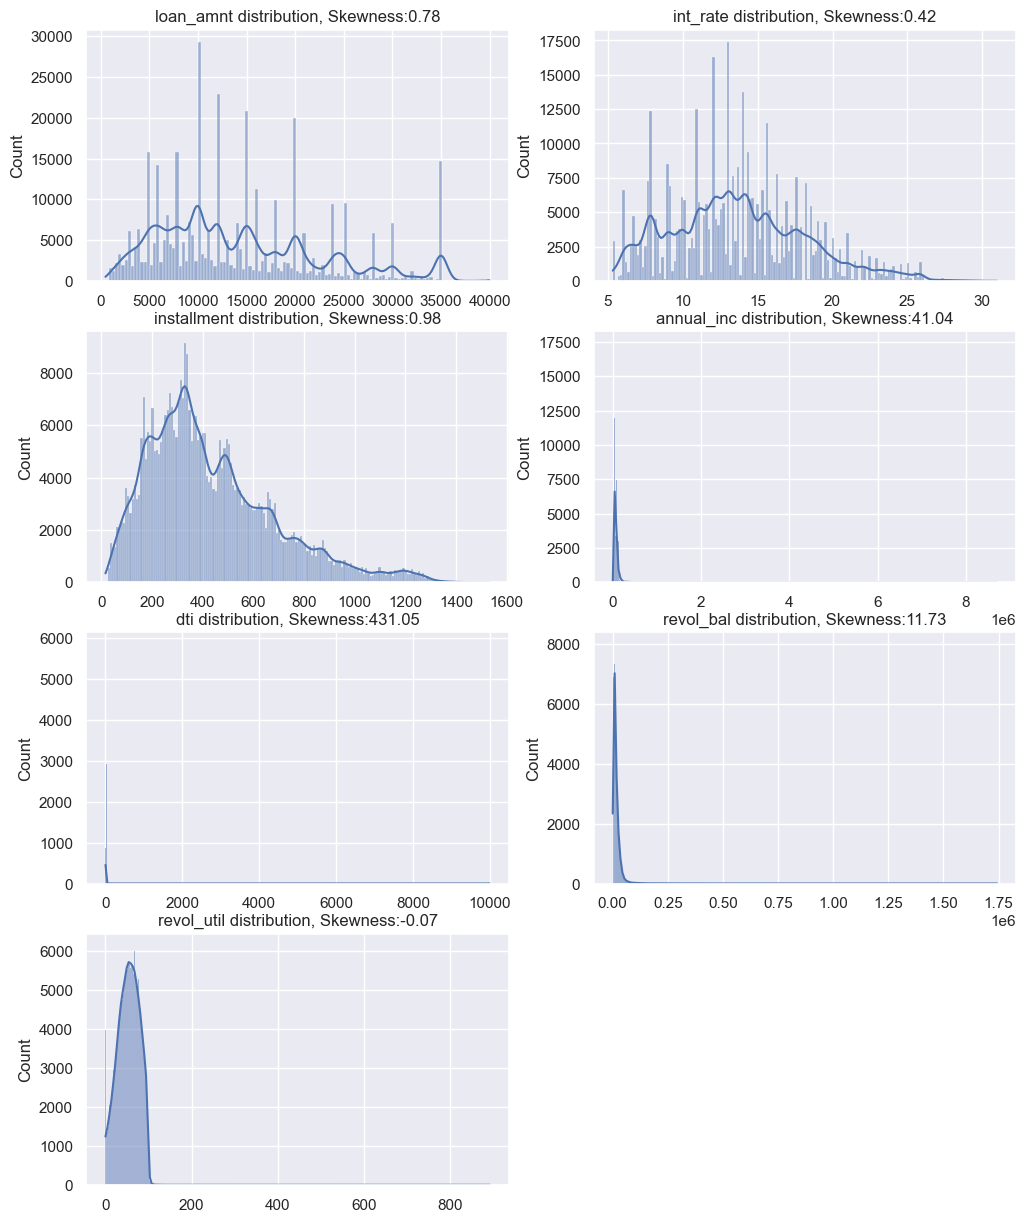

In [9]:
plt.figure(figsize=(12, 15))
i = 1
for col in ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util']:
    print(i, end="-")
    plt.subplot(4, 2, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"{col} distribution, Skewness:{round(df[col].skew(), 2)}")
    plt.xlabel(None)
    i += 1
plt.show()

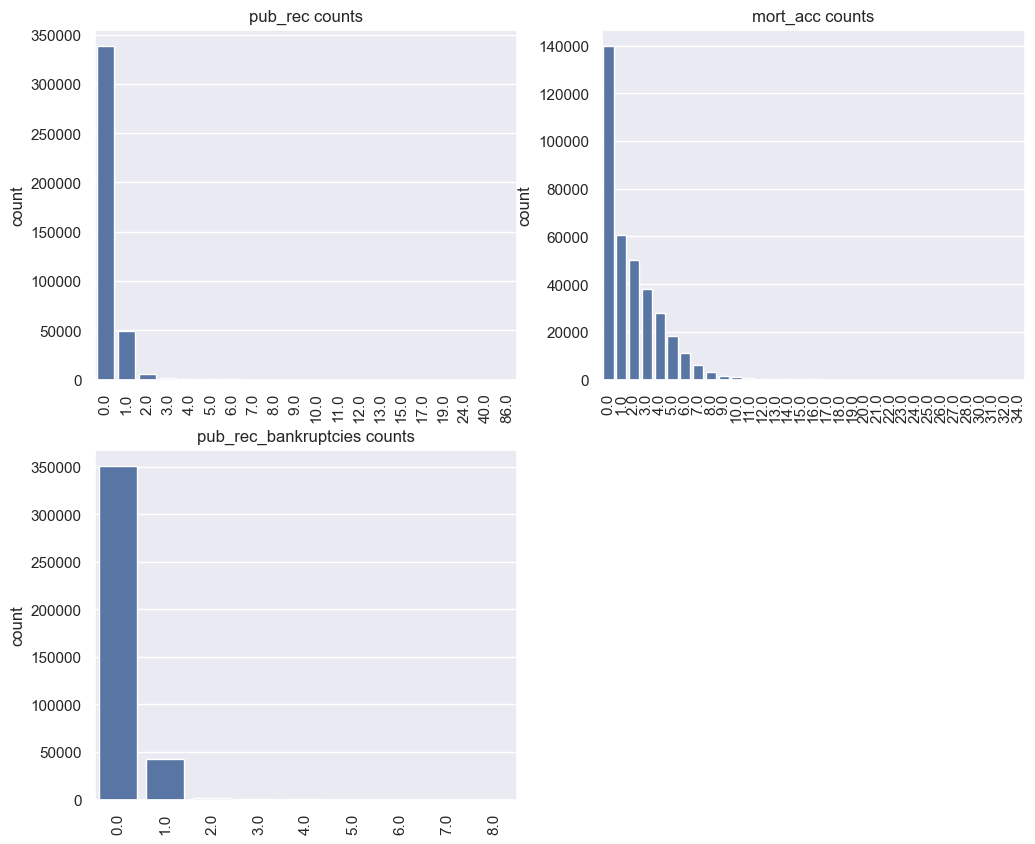

In [10]:
plt.figure(figsize=(12, 10))
i = 1
for col in ['pub_rec', 'mort_acc', 'pub_rec_bankruptcies']:
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f"{col} counts")
    plt.xlabel(None)
    plt.xticks(rotation=90)
    i += 1
plt.show()

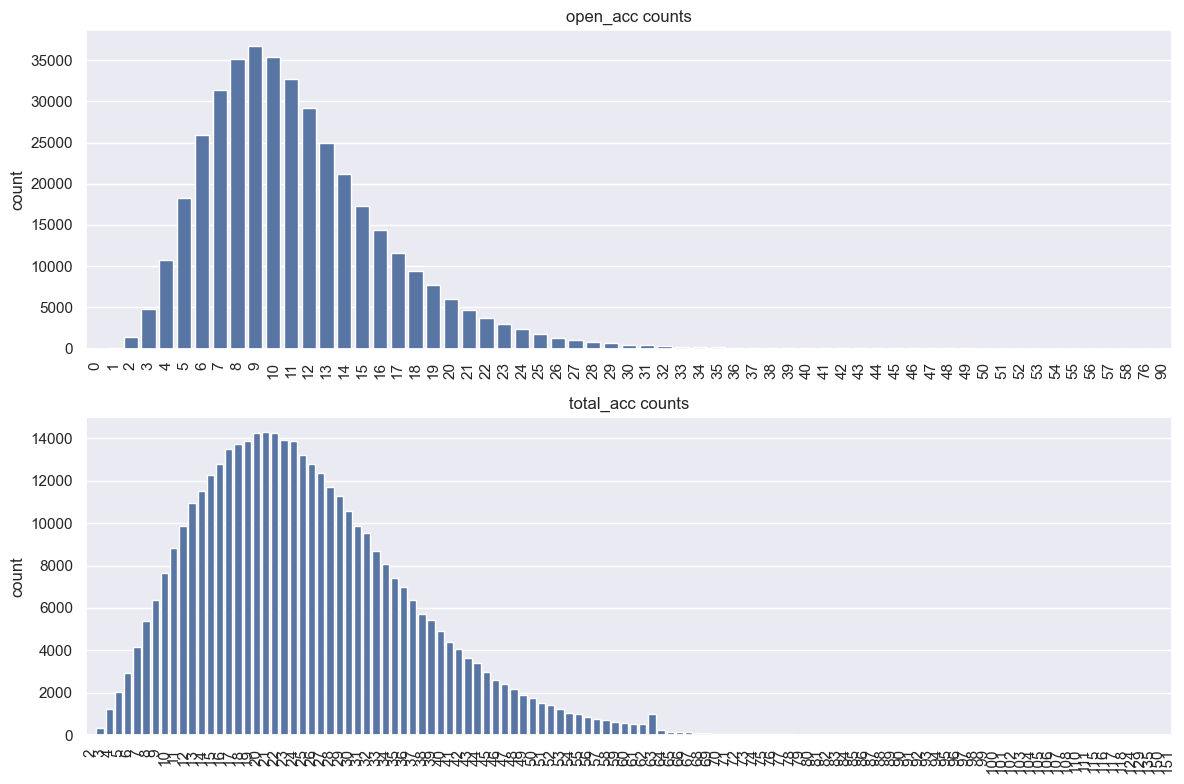

In [11]:
plt.figure(figsize=(12, 8))
i = 1
for col in ['open_acc', 'total_acc']:
    df[col] = df[col].astype(int)
    plt.subplot(2, 1, i)
    sns.countplot(data=df, x=col)
    plt.title(f"{col} counts")
    plt.xlabel(None)
    plt.xticks(rotation=90)
    plt.tight_layout()
    i += 1
plt.show()

##### Lets check the categorical columns now

In [12]:
for col in df.select_dtypes(include='category').columns:
    print(f"Feature - {col}:-\n{df[col].describe()[1:]}\n")

Feature - term:-
unique             2
top        36 months
freq          302005
Name: term, dtype: object

Feature - grade:-
unique         7
top            B
freq      116018
Name: grade, dtype: object

Feature - sub_grade:-
unique       35
top          B3
freq      26655
Name: sub_grade, dtype: object

Feature - emp_title:-
unique     173105
top       Teacher
freq         4389
Name: emp_title, dtype: object

Feature - emp_length:-
unique           11
top       10+ years
freq         126041
Name: emp_length, dtype: object

Feature - home_ownership:-
unique           6
top       MORTGAGE
freq        198348
Name: home_ownership, dtype: object

Feature - verification_status:-
unique           3
top       Verified
freq        139563
Name: verification_status, dtype: object

Feature - issue_d:-
unique         115
top       Oct-2014
freq         14846
Name: issue_d, dtype: object

Feature - loan_status:-
unique             2
top       Fully Paid
freq          318357
Name: loan_status, dtype

1-2-3-4-5-6-7-8-

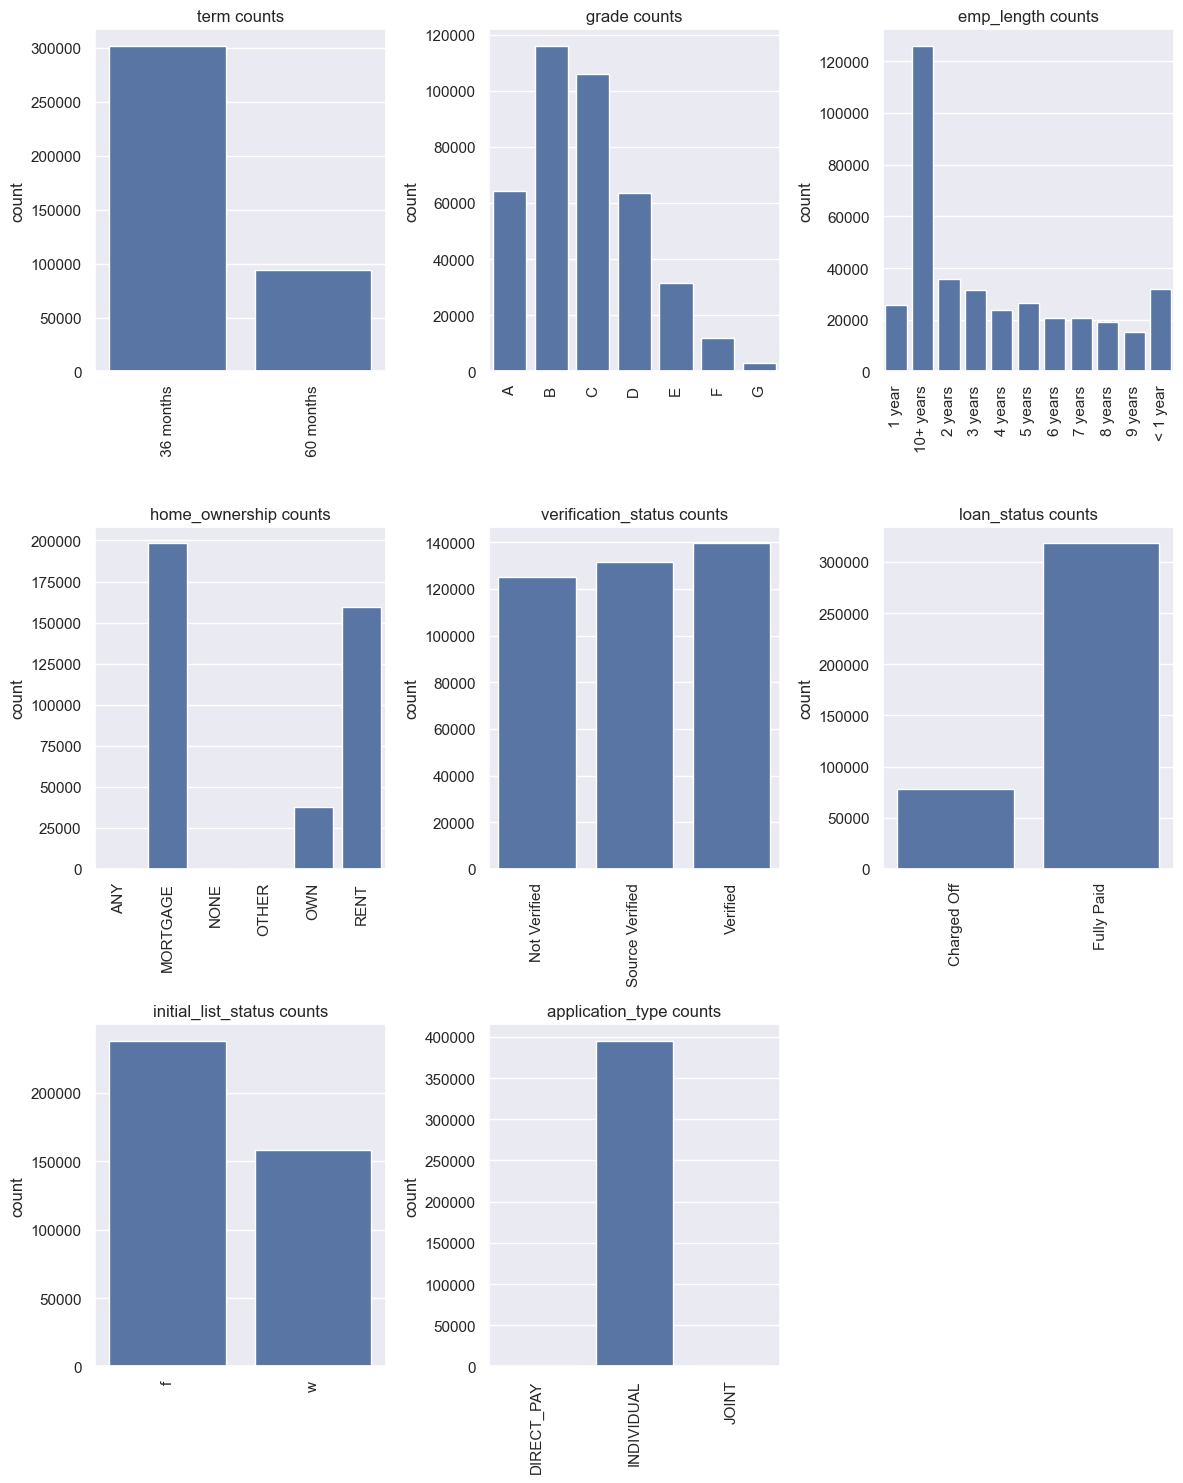

In [13]:
# check categorical columns counts
plt.figure(figsize=(12, 15))
i = 1
for col in ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'initial_list_status', 'application_type']:
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f"{col} counts")
    plt.xlabel(None)
    plt.xticks(rotation=90)
    plt.tight_layout()
    print(i, end="-")
    i += 1
plt.show()

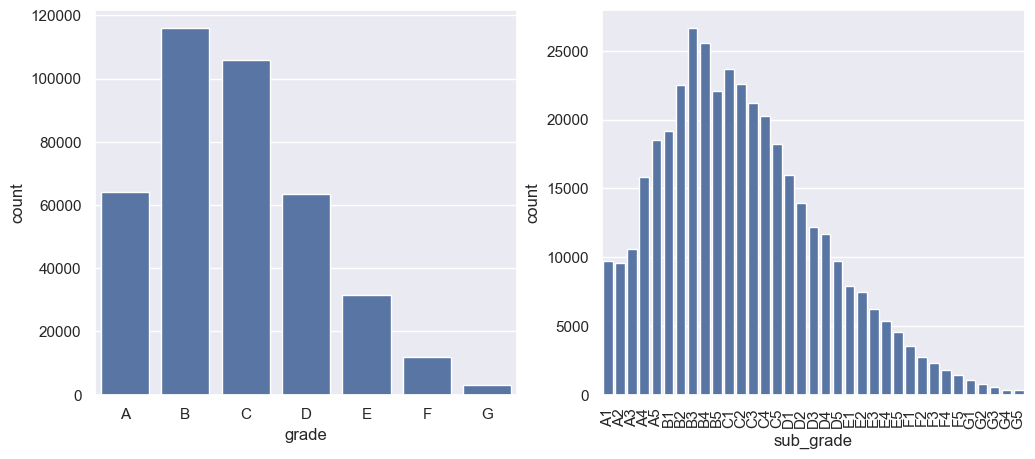

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.countplot(data=df, x='grade')
plt.subplot(122)
sns.countplot(data=df, x='sub_grade')
plt.xticks(rotation=90)
plt.show()

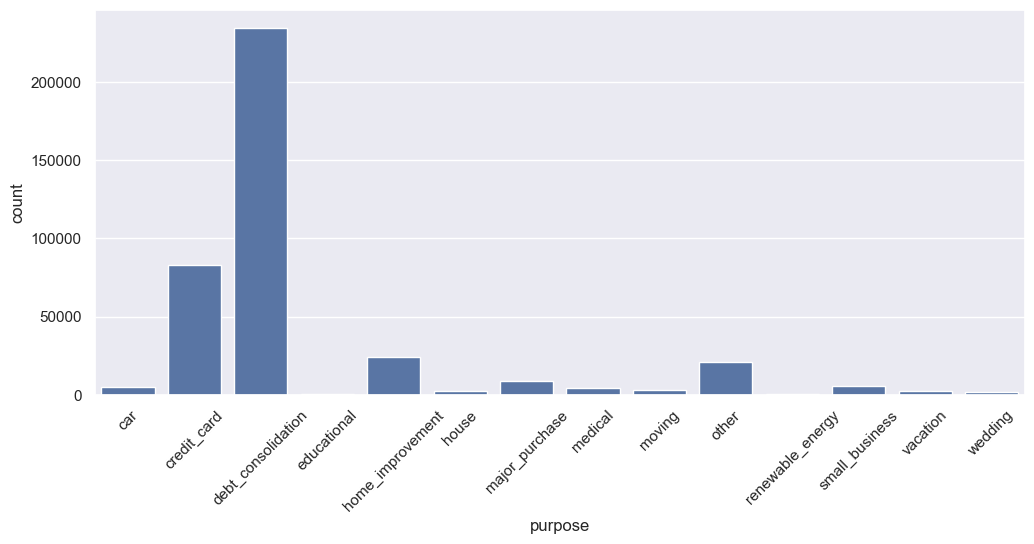

In [15]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='purpose')
plt.xticks(rotation=45)
plt.show()

In [16]:
from wordcloud import WordCloud

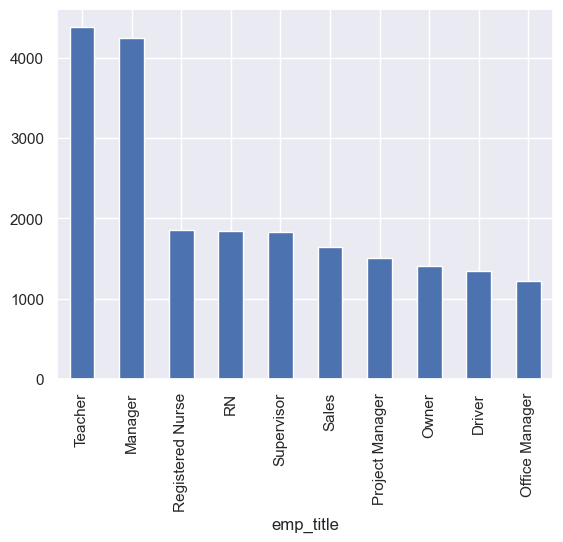

In [17]:
df['emp_title'].value_counts()[:10].plot.bar()
plt.show()

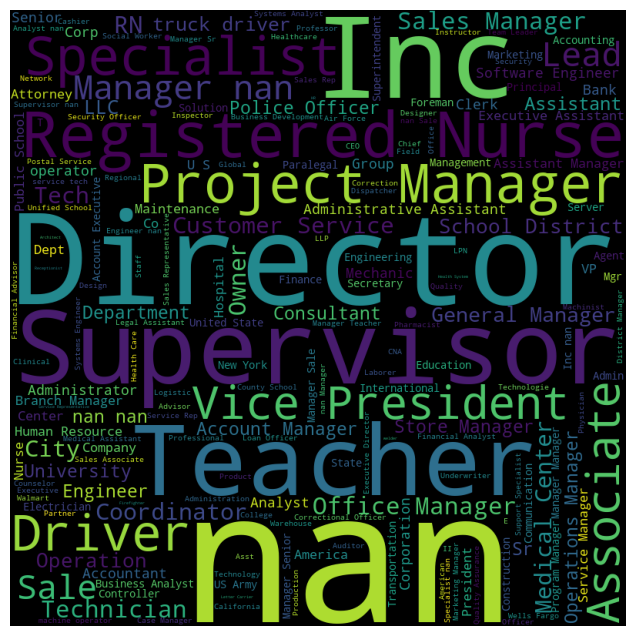

In [18]:
all_emp_titles = " ".join(df['emp_title'].astype(str).values)
title_cloud = WordCloud(width=800, height=800, background_color='black').generate(all_emp_titles)
plt.figure(figsize=(8, 8))
plt.imshow(title_cloud)
plt.axis('off')
plt.show()

#### Key Insights from Categorical Variables
##### 1. Loan Terms & Risk Segmentation
- *term: Majority (76%) opt for 36-month loans (vs. 60-month), suggesting shorter commitments are preferred.*
- *grade & sub_grade: Most loans are Grade B (29%) and Sub-Grade B3, indicating moderate-risk borrowers dominate.*
- *purpose: Debt consolidation (59%) is the top use-case—high-risk if existing debt isn’t refinanced effectively.*
##### 2. Borrower Stability
- *emp_title: High cardinality(173105). Teachers and Managers are most frequent.*
- *emp_length: 10+ years (32%) is most common, but verify if this aligns with income/age (potential data entry issues).*
- *home_ownership: Mortgage holders (50%) dominate, implying asset-backed applicants (lower risk than renters).*
##### 3. Verification & Risk Signals
- *verification_status: Verified income (35%) is top, but 65% are either "Not Verified" or "Source Verified"—higher risk pool.*
- *loan_status: 80% loans are "Fully Paid", but imbalanced data—check default rates in the remaining 20%.*
##### 4. Data Quality Flags
- *emp_title: 173k unique values (e.g., "Teacher" top at 1.1%)-consider bucketing for modelling.*
- *address: 393k unique values—useless as-is; extract ZIP codes or cities for geospatial trends.*
##### Risk & Business Implications
- *High-risk groups: Renters, non-verified income, or debt consolidation seekers.*
##### Actionable Steps:
- *Target Imbalance: Stratify sampling to avoid bias toward "Fully Paid" loans.*
- *Geospatial Analysis: Use address-derived features if fraud/regional trends are suspected.*

##### Check how loan_status is related with independant variables

1-2-3-4-5-6-7-8-9-

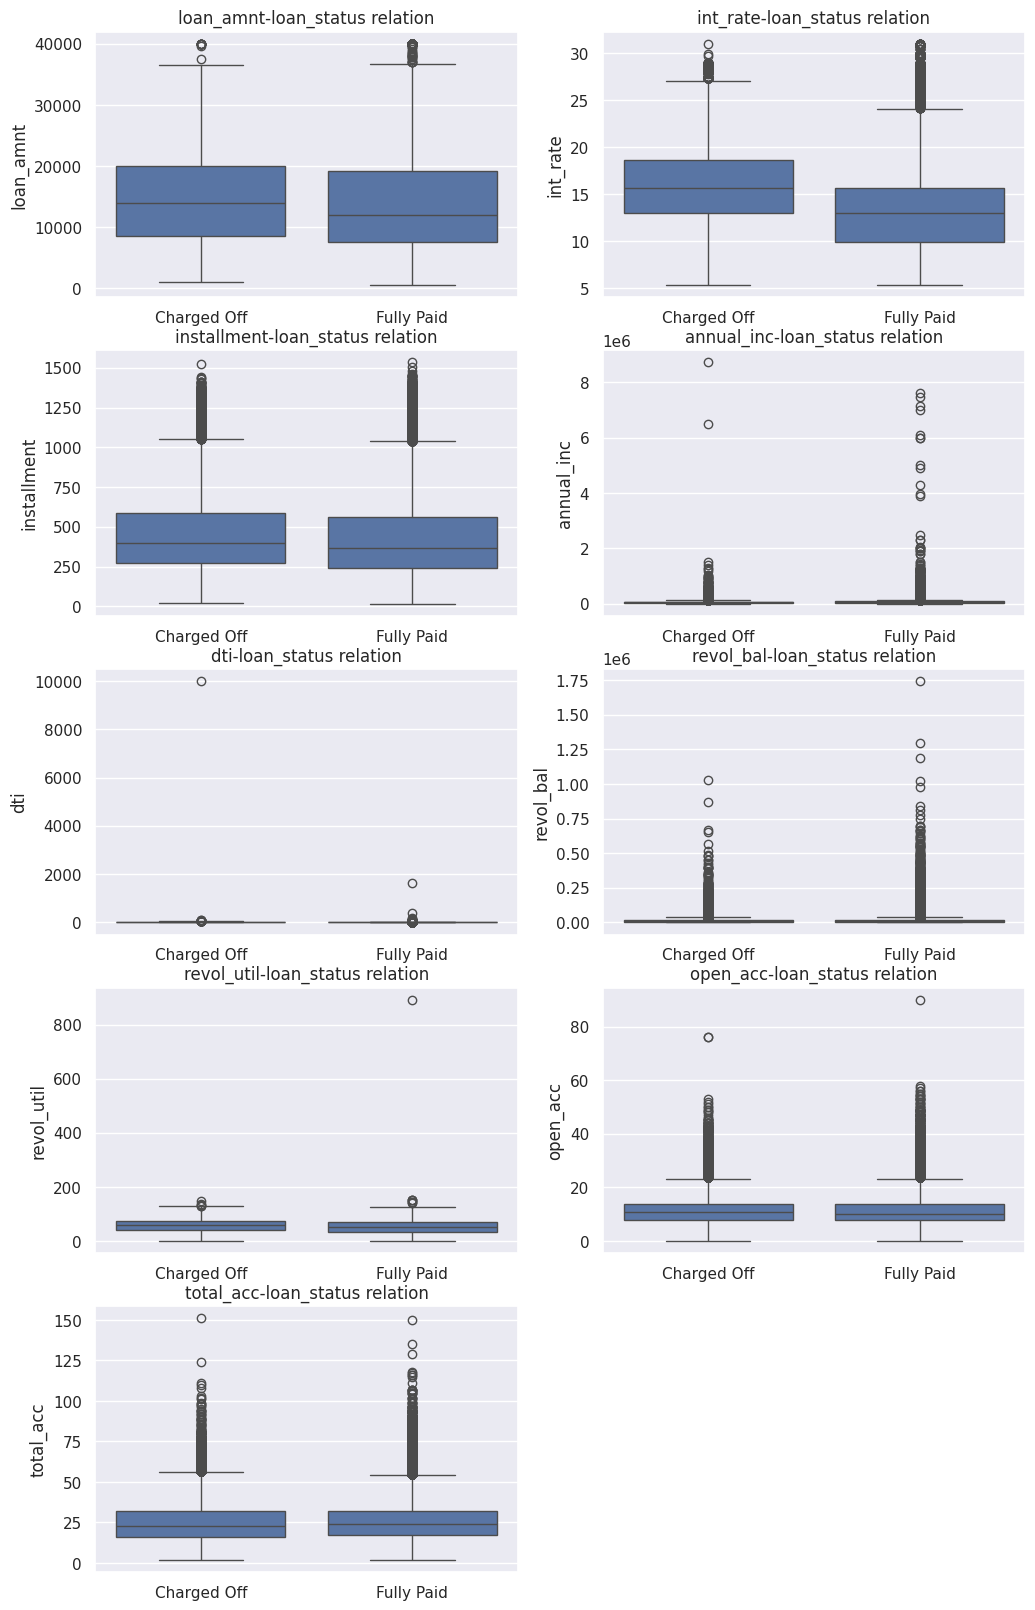

In [19]:
plt.figure(figsize=(12, 20))
i = 1
for col in ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'open_acc', 'total_acc']:
    print(i, end="-")
    plt.subplot(5, 2, i)
    sns.boxplot(data=df, y=col, x='loan_status')
    plt.title(f"{col}-loan_status relation")
    plt.xlabel(None)
    i += 1
plt.show()

In [8]:
for col in ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'open_acc', 'total_acc']:
    print("Column:", col, df.groupby('loan_status')[col].describe().round(2), "\n")

Column: loan_amnt                 count      mean      std     min     25%      50%      75%  \
loan_status                                                                  
Charged Off   77673.0  15126.30  8505.09  1000.0  8525.0  14000.0  20000.0   
Fully Paid   318357.0  13866.88  8302.32   500.0  7500.0  12000.0  19225.0   

                 max  
loan_status           
Charged Off  40000.0  
Fully Paid   40000.0   

Column: int_rate                 count   mean   std   min    25%    50%    75%    max
loan_status                                                         
Charged Off   77673.0  15.88  4.39  5.32  12.99  15.61  18.64  30.99
Fully Paid   318357.0  13.09  4.32  5.32   9.91  12.99  15.61  30.99 

Column: installment                 count    mean     std    min     25%     50%     75%      max
loan_status                                                                  
Charged Off   77673.0  452.70  249.10  21.62  274.86  399.06  585.67  1527.00
Fully Paid   318357.0  426

#### Key Insights: Numerical Variables vs. Loan Status
##### Loan Characteristics
- ##### Higher Defaults (Charged Off) Correlate With:
- *Larger Loans: Mean loan_amnt ₹15.1k (vs. ₹13.9k for Fully Paid).*
- *Higher Interest Rates: Mean int_rate 15.9% (vs. 13.1% for Fully Paid).*
- *Larger Installments: Mean installment ₹453 (vs. ₹427).*
  - *Insight: Riskier borrowers pay more—likely due to lower creditworthiness.*
##### Income & Debt Burden
- ##### Defaults Linked To:
- *Lower Income: Mean annual_inc 67.5k (vs. 75.8k for Fully Paid).*
- *Higher DTI: Mean dti 19.7 (vs. 16.8), with extreme outliers (max 9999!).*
  - *Insight: Income verification and DTI caps critical to reduce defaults.*
##### Credit Behavior
- ##### Risk Signals in Defaulters:
- *Higher Revolving Utilization: Mean revol_util 57.9% (vs. 52.8%).*
- *More Open Accounts: Mean open_acc 11.6 (vs. 11.2), but marginal.*
  - *Insight: High credit usage (revol_util >50%) flags financial stress.*
##### Minor Differences:
- *total_acc and revol_bal show negligible variance by loan status.*
##### Actionable Recommendations
##### Risk-Based Pricing:
- *Limit loan amounts or increase rates for applicants with: int_rate >15%, dti >20%, or revol_util >60%.*
##### Income Verification:
- *Prioritize checks for applicants with annual_inc <50k.*

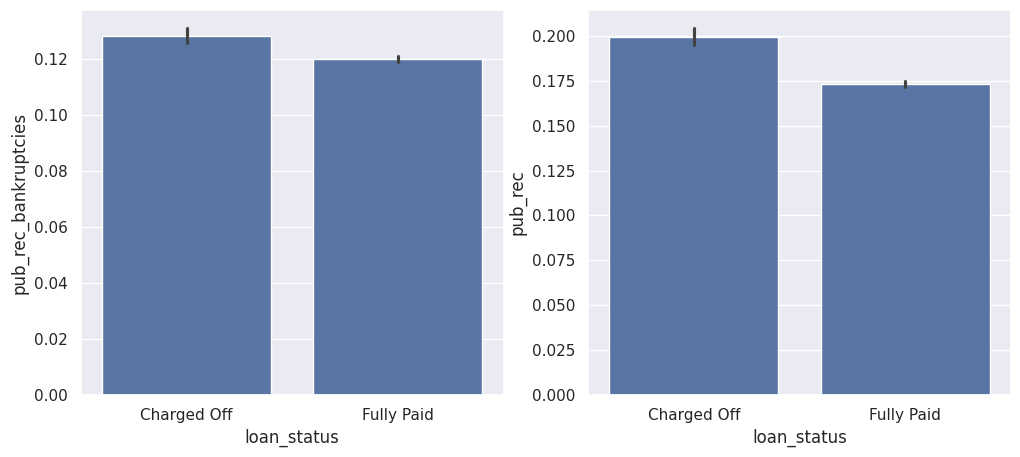

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.barplot(data=df, x='loan_status', y='pub_rec_bankruptcies')
plt.subplot(122)
sns.barplot(data=df, x='loan_status', y='pub_rec')
plt.show()

In [9]:
for col in ['pub_rec', 'pub_rec_bankruptcies']:
    print(df.groupby('loan_status')[col].mean().round(3))

loan_status
Charged Off    0.200
Fully Paid     0.173
Name: pub_rec, dtype: float64
loan_status
Charged Off    0.128
Fully Paid     0.120
Name: pub_rec_bankruptcies, dtype: float64


#### Key observations:
- *Borrowers with charged-off loans have 16% more public records (0.20 vs 0.17) and 7% more bankruptcies (0.128 vs 0.120) than those who fully repaid, indicating derogatory marks significantly impact repayment risk.*

##### Lets check the relations between the continuous variables

In [19]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='category').drop('loan_status', axis=1).columns
print(num_cols, "\n", cat_cols)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object') 
 Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')


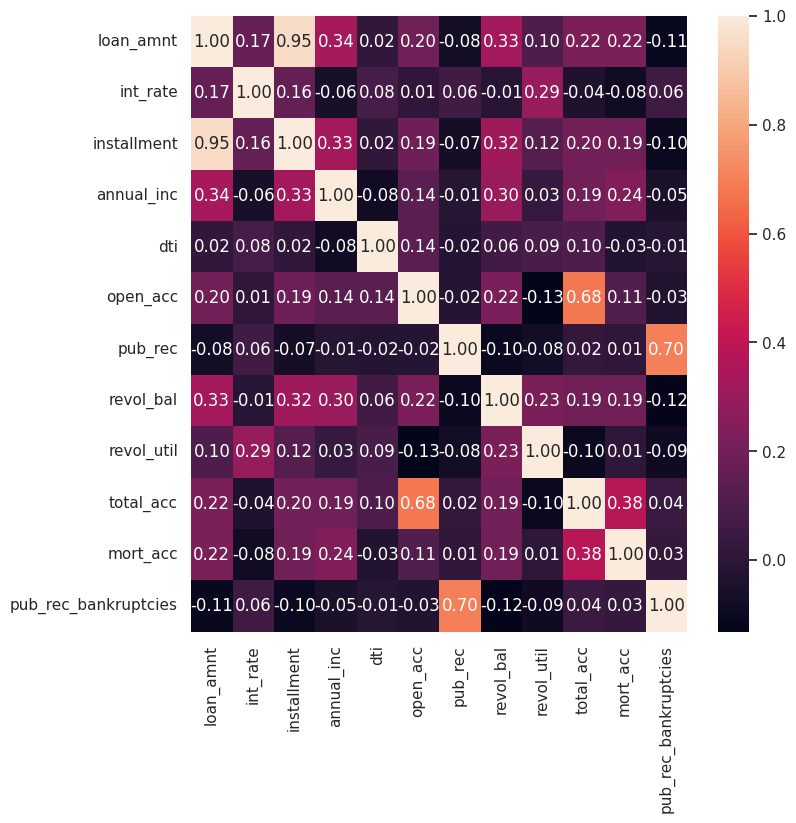

In [24]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f')
plt.show()

#### Correlated features
- *Loan seems to have almost perfect correlation with installments.*
- *public derogatory records have 70% positive corelation with bankruptcies record.*
- *total account and open account are significantly related.*

#### Lets take a closer look towards the variables with high correlations

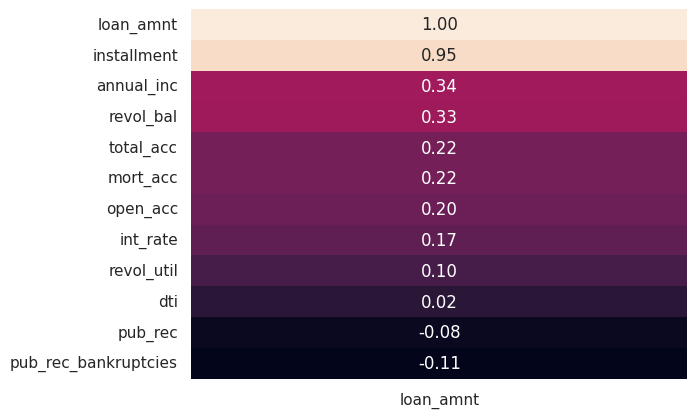

In [25]:
corr_df = pd.DataFrame(df[num_cols].corr()['loan_amnt'].sort_values(ascending=False))
sns.heatmap(corr_df, annot=True, fmt='.2f', cbar=False)
plt.show()

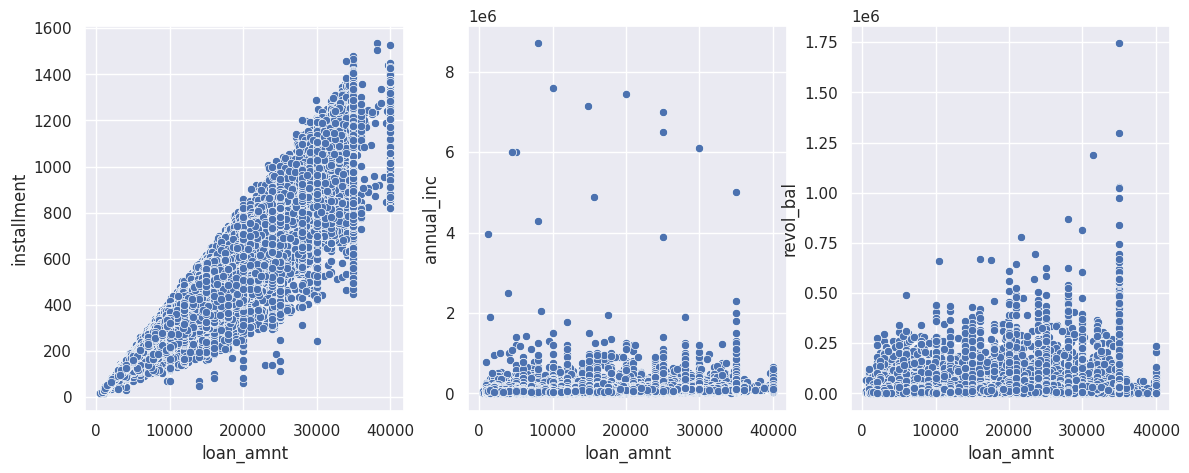

In [26]:
plt.figure(figsize=(14, 5))
plt.subplot(131)
sns.scatterplot(data=df, x='loan_amnt', y='installment')
plt.subplot(132)
sns.scatterplot(data=df, x='loan_amnt', y='annual_inc')
plt.subplot(133)
sns.scatterplot(data=df, x='loan_amnt', y='revol_bal')
plt.show()

#### Key charecteristics:
##### Loan Amount:
- *As expected, higher loan amounts directly translate to larger monthly installments. This near-perfect correlation(0.95) confirms logical repayment behavior.*
- *Higher Annual income doesn't necessarily translate to higher loan amounts.*
- *Existing Credit balance has very feeble influence on loan sizing.*
- *No significant correlations with features like dti or total_acc, indicating loan amounts are determined independently of these factors.*
##### Insights:
- *Installment values can be predicted reliably from loan amounts, but over-reliance on this pair may cause other risk factors to be overlooked.*

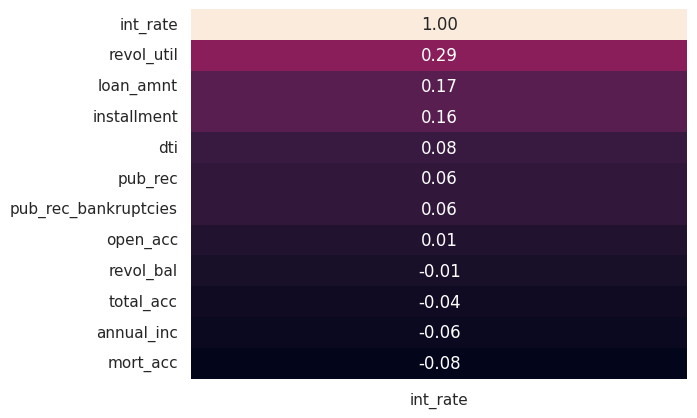

In [27]:
corr_df = pd.DataFrame(df[num_cols].corr()['int_rate'].sort_values(ascending=False))
sns.heatmap(corr_df, annot=True, fmt='.2f', cbar=False)
plt.show()

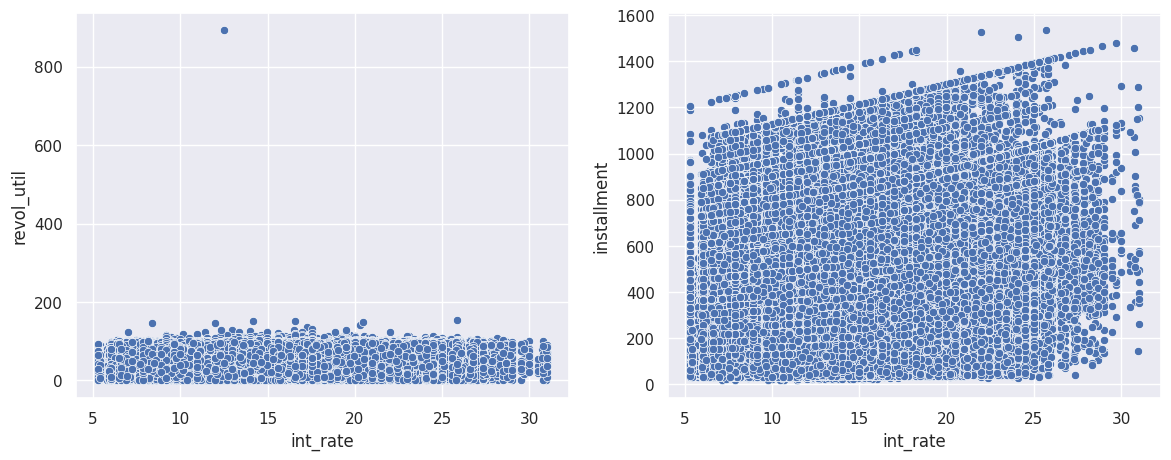

In [28]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.scatterplot(data=df, x='int_rate', y='revol_util')
plt.subplot(122)
sns.scatterplot(data=df, x='int_rate', y='installment')
plt.show()

##### Interest rate:
- *Links credit card usage to pricing risk. Higher utilization - higher rates. Although plot seems misleading, could be due to that one extreme credit utilization.*
- *Weak correlation with installments and almost neutral otherwise.*

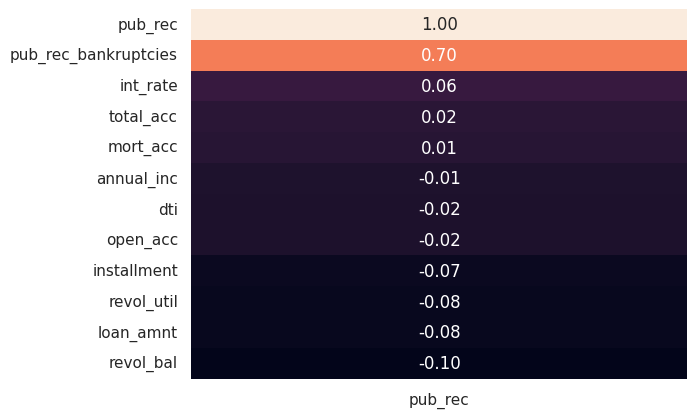

In [29]:
corr_df = pd.DataFrame(df[num_cols].corr()['pub_rec'].sort_values(ascending=False))
sns.heatmap(corr_df, annot=True, fmt='.2f', cbar=False)
plt.show()

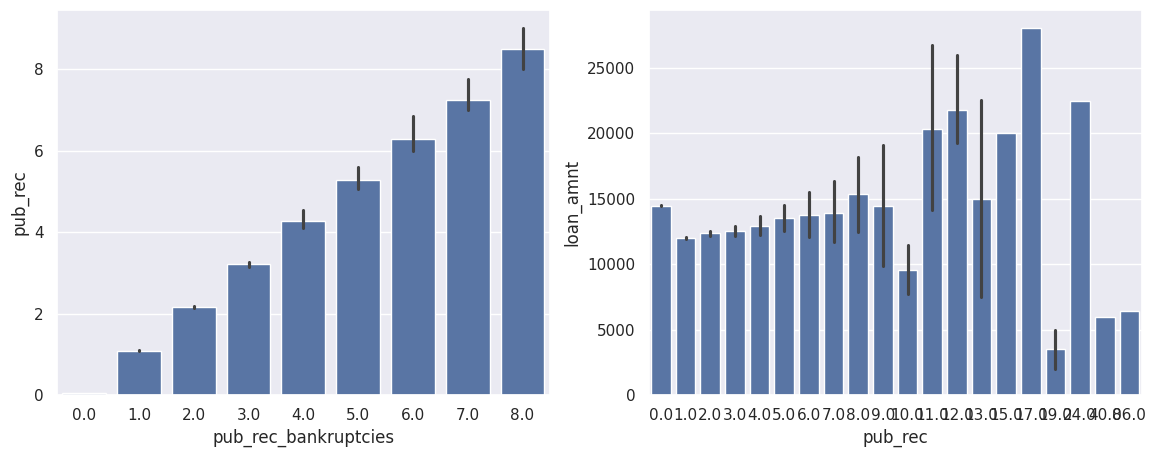

In [30]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.barplot(data=df, x='pub_rec_bankruptcies', y='pub_rec')
plt.subplot(122)
sns.barplot(data=df, x='pub_rec', y='loan_amnt')
plt.show()

#### Key Observations
##### Public Record vs Bankruptcies:
- *Strong tie between derogatory records and bankruptcies—critical for default prediction.*
##### Public Record vs Loan Amount:
- *Weak negative correlation. Riskier borrower gets smaller loans.*

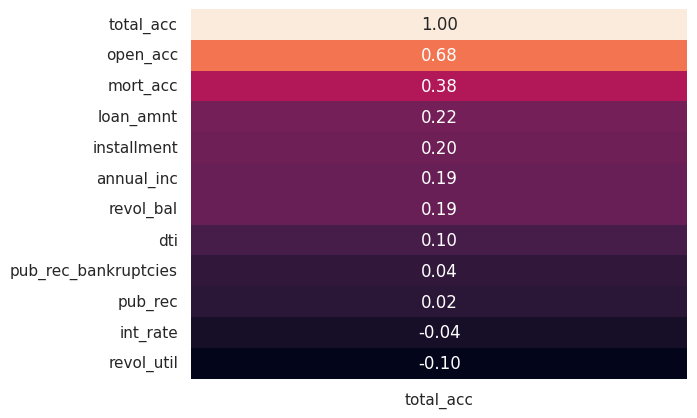

In [31]:
corr_df = pd.DataFrame(df[num_cols].corr()['total_acc'].sort_values(ascending=False))
sns.heatmap(corr_df, annot=True, fmt='.2f', cbar=False)
plt.show()

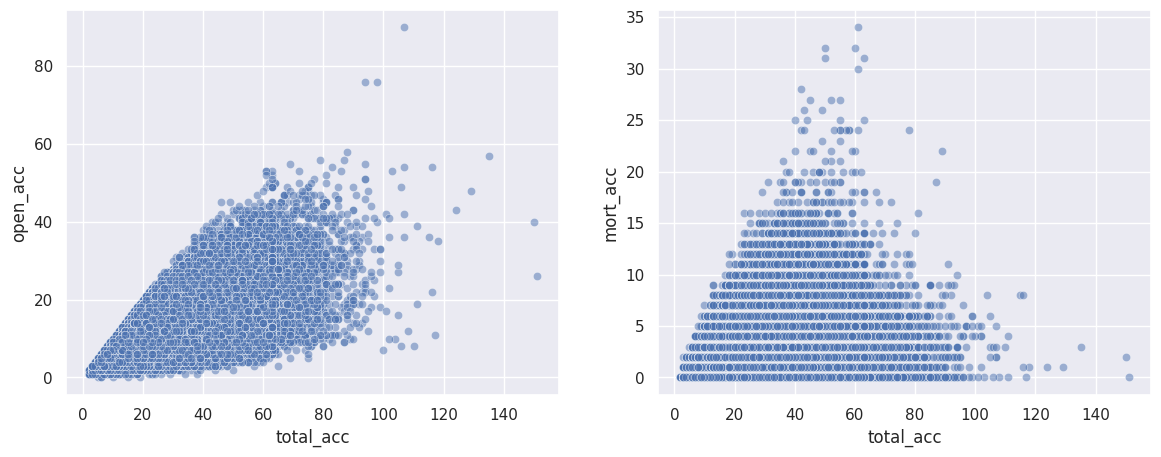

In [32]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.scatterplot(data=df, x='total_acc', y='open_acc', alpha=0.5)
plt.subplot(122)
sns.scatterplot(data=df, x='total_acc', y='mort_acc', alpha=0.5)
plt.show()

#### Key Charecteristics
##### Total Accounts vs. Open Accounts (0.68)
- *Reflects credit history depth. High correlation suggests redundancy*
##### Total Accounts vs. Mortgage Accounts (0.34)
- *Low-Moderate correlation.*

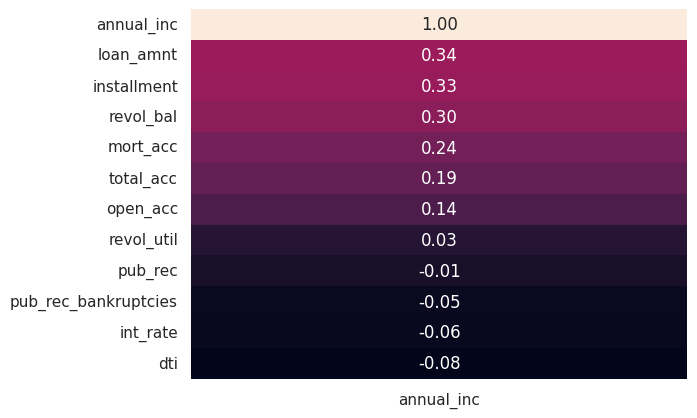

In [33]:
corr_df = pd.DataFrame(df[num_cols].corr()['annual_inc'].sort_values(ascending=False))
sns.heatmap(corr_df, annot=True, fmt='.2f', cbar=False)
plt.show()

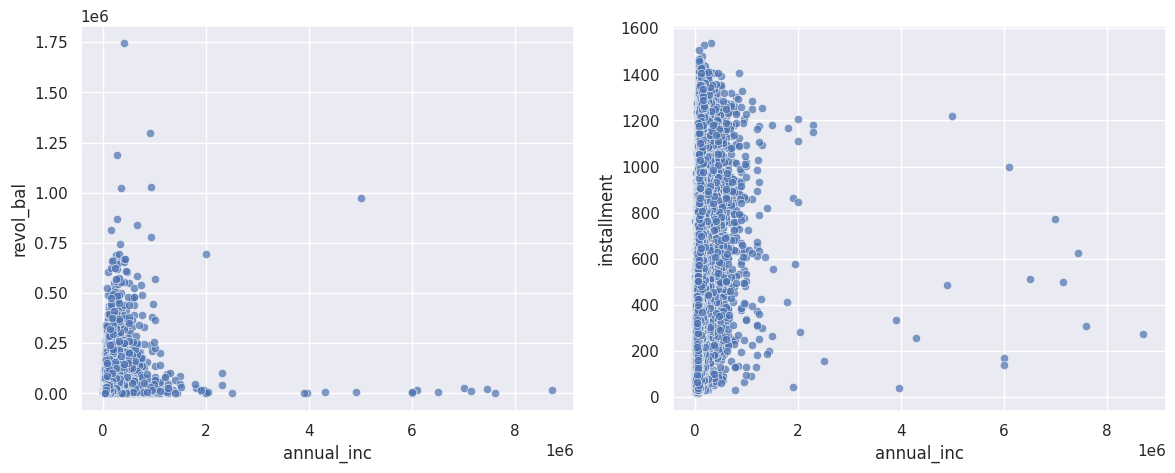

In [34]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.scatterplot(data=df, x='annual_inc', y='revol_bal', alpha=0.7)
plt.subplot(122)
sns.scatterplot(data=df, x='annual_inc', y='installment', alpha=0.7)
plt.show()

#### Key observation
- *Annual Income vs. Revolving Balance (0.30): Moderate correlation—high-income borrowers may rely less on revolving credit.*

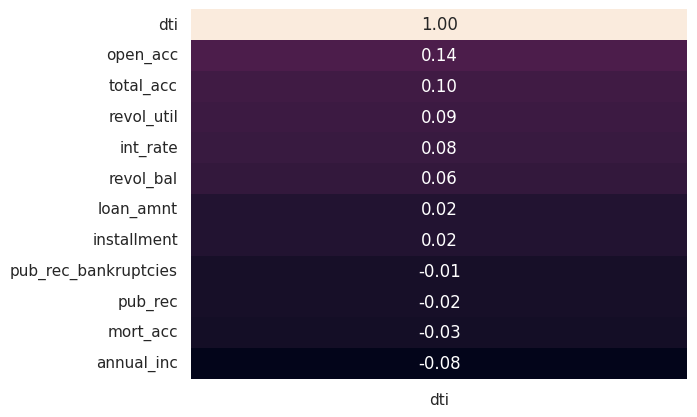

In [35]:
corr_df = pd.DataFrame(df[num_cols].corr()['dti'].sort_values(ascending=False))
sns.heatmap(corr_df, annot=True, fmt='.2f', cbar=False)
plt.show()

In [20]:
df[df['dti'] > 100.0][['loan_amnt', 'dti', 'installment', 'annual_inc', 'loan_status']]

loan_amnt      dti  installment  annual_inc  loan_status
7011      18375.0   189.90       552.77      2500.0   Fully Paid
36015     15100.0   145.65       318.98      8000.0   Fully Paid
264045     3200.0   107.55       134.09      6672.0   Fully Paid
285674     3700.0  9999.00       123.94         0.0  Charged Off
294182    15000.0   120.66       523.00      8700.0   Fully Paid
296164    14000.0   138.03       461.60     16000.0   Fully Paid
338571    19000.0   380.53       472.10      5000.0   Fully Paid
350865    24000.0  1622.00       764.99       600.0   Fully Paid

#### Key Observation:
- *Why is dti correlation with loan_amnt is near-zero.*
- *Despite extreme DTI ratios (>100), 7/8 loans were fully paid - including a 24k loan at 1622 DTI and 600 income - while only the 0-income case (9999 DTI) defaulted, suggesting some borrowers manage debt beyond normal limits.*
- *The only default had $0 income – extreme cases need income validation, even if others somehow repaid.*

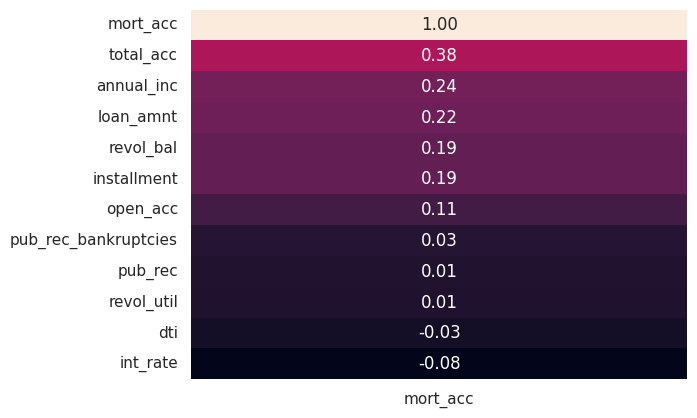

In [37]:
corr_df = pd.DataFrame(df[num_cols].corr()['mort_acc'].sort_values(ascending=False))
sns.heatmap(corr_df, annot=True, fmt='.2f', cbar=False)
plt.show()
del(corr_df)

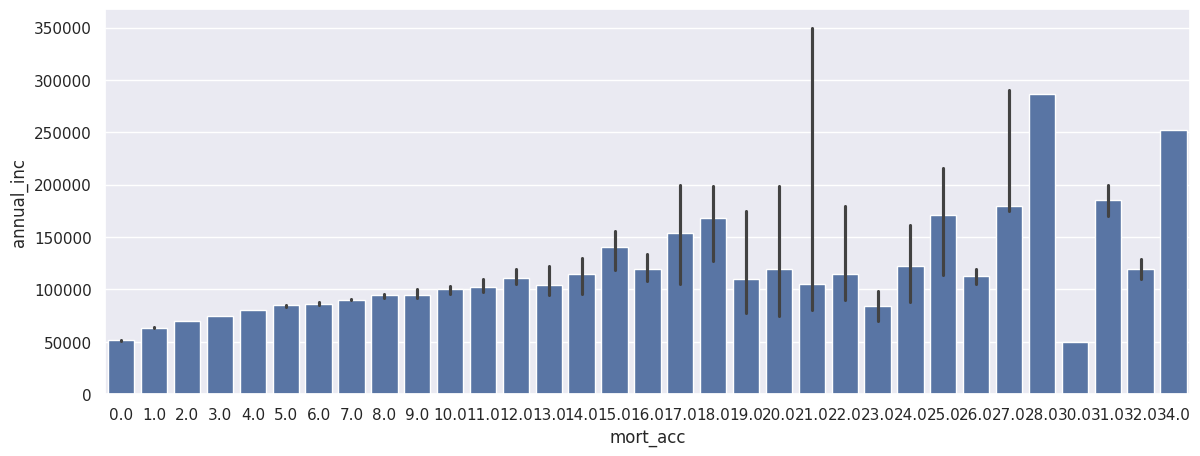

In [38]:
plt.figure(figsize=(14, 5))
plt.subplot(111)
sns.barplot(data=df, x='mort_acc', y='annual_inc', estimator='median')
plt.show()

#### Key Observations
- *mort_acc having moderate correlation with annual income signifies high income individuals avoids mortgages, also evident by the plot.*

#### Let's check the relation between the categorical variables and loan status

In [39]:
df[cat_cols].head(2)

term grade sub_grade        emp_title emp_length home_ownership  \
0   36 months     B        B4        Marketing  10+ years           RENT   
1   36 months     B        B5  Credit analyst     4 years       MORTGAGE   

  verification_status   issue_d             purpose               title  \
0        Not Verified  Jan-2015            vacation            Vacation   
1        Not Verified  Jan-2015  debt_consolidation  Debt consolidation   

  earliest_cr_line initial_list_status application_type  \
0         Jun-1990                   w       INDIVIDUAL   
1         Jul-2004                   f       INDIVIDUAL   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113

loan_status  Charged Off  Fully Paid
term                                
36 months      15.774573   84.225427
60 months      31.941505   68.058495


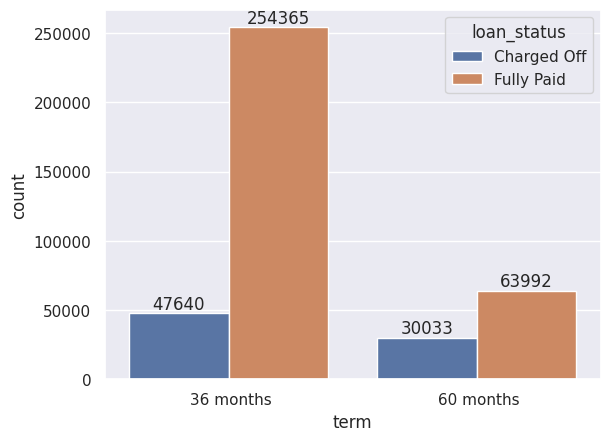

In [40]:
print(pd.crosstab(index=df['term'], columns=df['loan_status'], normalize='index')*100)
ax = sns.countplot(data=df, x='term', hue='loan_status')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

#### Key Insights: Loan Term Risk
##### Default Rates by Term:
- *36-month loans: 15.8% default rate (47,640 Charged Off / 302,005 total).*
- *60-month loans: 31.9% default rate (30,033 Charged Off / 94,025 total).*
##### Business Impact:
- *60-month loans are 2× riskier than 36-month loans.*
- *But they represent only 19% of total loans (94k/396k), suggesting selective approval.*
##### Actionable Takeaways:
- *Pricing: Charge higher interest for 60-month terms to offset risk.*
- *Underwriting: Stricter eligibility criteria for longer terms (e.g., higher income/DTI thresholds).*
- *Customer Incentives: Promote 36-month loans to reduce defaults.*

               count   mean   std   min    25%    50%    75%    max
term                                                               
 36 months  302005.0  12.55  3.94  5.32   9.63  12.42  15.10  30.99
 60 months   94025.0  17.12  4.31  5.32  13.99  16.99  19.99  30.99


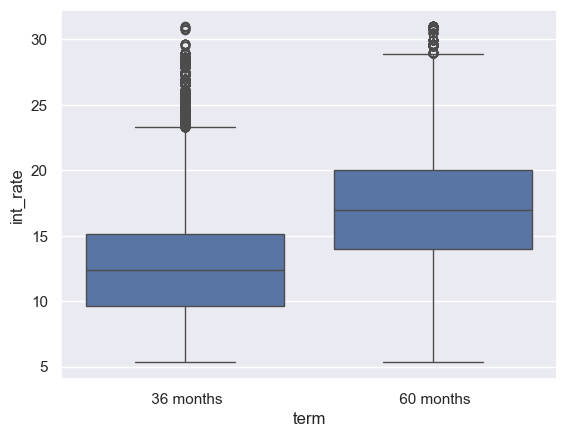

In [10]:
print(df.groupby('term')['int_rate'].describe().round(2))
sns.boxplot(data=df, x='term', y='int_rate')
plt.show()

##### Interest Rate vs. Loan Term
- *60-month loans: ~17.1% avg rate (4.3 std) — 36% higher than 36-month loans (12.6%).*
- *Risk-based pricing: Lenders charge more for longer terms (max 30.99% both).*
- *Key gap: 60-month loans 25th percentile rate (14%) exceeds 36-month's 75th percentile (15%), showing strict risk segmentation.*
##### Implication: Higher defaults on 60-month loans (31% vs 16%) justify elevated rates, but may deter prime borrowers.

               count      mean       std     min      25%      50%      75%  \
term                                                                          
 36 months  302005.0  72128.29  63816.92     0.0  43000.0  60000.0  86000.0   
 60 months   94025.0  80867.64  53505.39  2500.0  52500.0  70000.0  95000.0   

                  max  
term                   
 36 months  8706582.0  
 60 months  6500000.0  


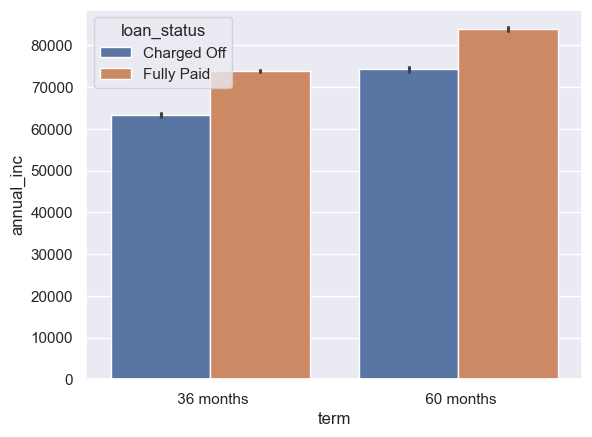

In [11]:
print(df.groupby('term')['annual_inc'].describe().round(2))
sns.barplot(data=df, x='term', y='annual_inc', hue='loan_status')
plt.show()

##### Term vs. Annual Income Insights
- *60-month borrowers earn 12% more (mean ₹80.9k vs. ₹72.1k) but have 2× higher defaults (31% vs. 16%).*
- *Paradox: Higher-income borrowers opting for longer terms are riskier, likely due to:*
  - *Larger loans (₹24k avg vs. ₹14k for 36-month).*
  - *Higher interest rates (17.1% avg).*
##### Action:
- *Require higher income thresholds for longer-term loans*
- *Cap loan amounts relative to income for terms >36 months.*

loan_status     Charged Off  Fully Paid
home_ownership                         
ANY                0.000000  100.000000
MORTGAGE          16.956057   83.043943
NONE              22.580645   77.419355
OTHER             14.285714   85.714286
OWN               20.680337   79.319663
RENT              22.662244   77.337756


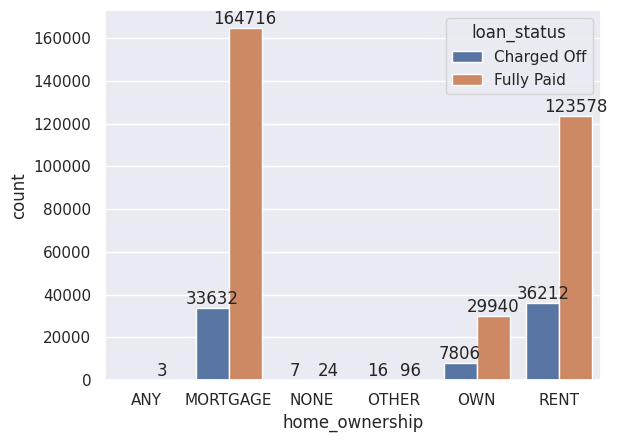

In [43]:
print(pd.crosstab(index=df['home_ownership'], columns=df['loan_status'], normalize='index')*100)
ax = sns.countplot(data=df, x='home_ownership', hue='loan_status')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

##### Home Ownership vs. Loan Performance: Key Insights
##### Riskiest Borrowers
- *Renters dominate defaults (3.62M Charged Off vs. 12.36M Fully Paid).*
- *Owners perform better (780K defaults vs. 2.99M repaid).*
##### Surprising Findings
- *"ANY" (a rare category) has 0 defaults—likely a data anomaly or ultra-low-risk segment.*
- *"NONE" (minimal cases) shows a 22.6% default rate (7/31), higher than MORTGAGE (16.9%) and OWN (20.7%).*
##### Business Recommendations
- *Stricter Checks for Renters*
  - *Possible bias: Renters may include younger/less stable borrowers.*
- *Review "NONE" & "OTHER" Categories:*
  - *Investigate why "NONE" has elevated risk—may indicate unhoused or thin-file applicants.*
- *Pricing Adjustments:*
  - *Risk-based pricing: Higher rates for renters (already implied by default rates).*

home_ownership  ANY  MORTGAGE  NONE  OTHER    OWN    RENT
mort_acc                                                 
0.0               0     14566     9     15  17178  108009
1.0               1     43297     4      7   5783   11324
2.0               1     37184     6      5   4233    8519
3.0               1     29562     4      1   2838    5643
4.0               0     22359     1      1   1970    3556
5.0               0     14907     2      1   1209    2075
6.0               0      9197     1      3    691    1177
7.0               0      5023     1      1    382     645
8.0               0      2594     1      0    211     315
9.0               0      1380     0      0    102     174
10.0              0       702     0      0     70      93
11.0              0       370     0      0     49      60
12.0              0       213     0      0     22      29
13.0              0       115     0      0     16      15
14.0              0        76     0      0      7      24
15.0          

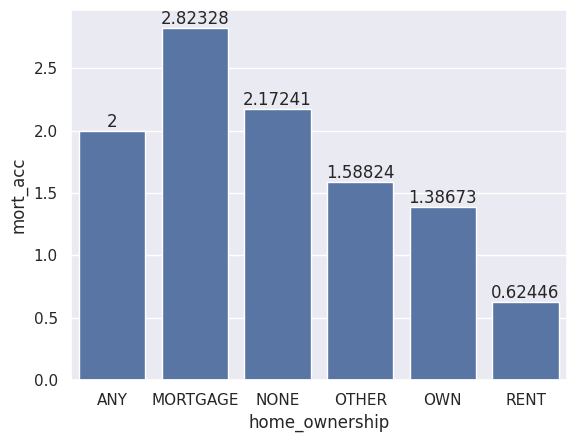

In [44]:
print(pd.crosstab(columns=df['home_ownership'], index=df['mort_acc']))
ax = sns.barplot(data=df, x='home_ownership', y='mort_acc', errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

##### Mortgage Accounts (mort_acc) by Home Ownership: Critical Insights
##### Key Risk Patterns
- *Renters have the lowest mortgage exposure:*
  - *108K renters (64% of all mort_acc=0) have no mortgage history.*
  - *Only 11K renters have 1 mortgage account (vs. 43K mortgage holders).*
- *Homeowners (MORTGAGE/OWN) dominate higher mort_acc tiers*
##### Business Recommendations:
- *For Renters:*
  - *Require lower DTI (<30%) or shorter terms (36 months).*
  - *Flag applicants with mort_acc=0 for manual review.*
- *For Homeowners:*
  - *Check mort_acc>3 for debt stacking (risk of overextension).*
- *For "NONE/OTHER":*
  - *Auto-decline unless co-signer exists (data suggests extreme risk).*

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified           14.635999   85.364001
Source Verified        21.474293   78.525707
Verified               22.321102   77.678898


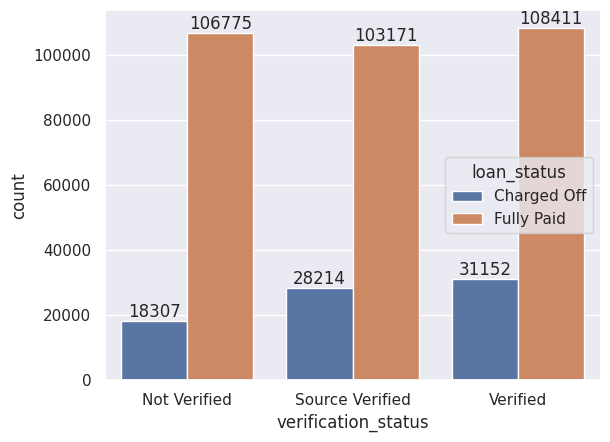

In [45]:
print(pd.crosstab(index=df['verification_status'], columns=df['loan_status'], normalize='index')*100)
ax = sns.countplot(data=df, x='verification_status', hue='loan_status')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

#### The Verification Paradox
- *Highest Defaults: "Verified" loans have the worst performance (22.3% defaults vs. 77.7% repaid).*
- *Lowest Risk: "Not Verified" borrowers perform best (14.6% defaults).*
- *Source Verified sits in between (21.5% defaults).*
##### Business Implications
- *Verification Backfires?*
- *Counterintuitive: Verified income doesn’t reduce risk. Possible reasons:*
  - *Verified applicants might be riskier borrowers (lender verified them because they didn't seem risky).*

                           mean                    min                 median  \
loan_status         Charged Off Fully Paid Charged Off Fully Paid Charged Off   
verification_status                                                             
Not Verified           10775.16   10353.62      1000.0      500.0     10000.0   
Source Verified        15470.66   14571.87      1000.0     1000.0     14400.0   
Verified               17371.44   16656.21      1000.0     1000.0     16000.0   

                                       max             
loan_status         Fully Paid Charged Off Fully Paid  
verification_status                                    
Not Verified           10000.0     40000.0    40000.0  
Source Verified        12800.0     40000.0    40000.0  
Verified               15000.0     40000.0    40000.0  


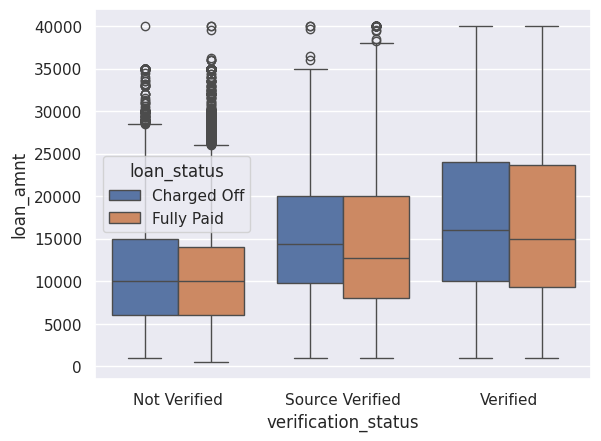

In [46]:
print(pd.crosstab(index=df['verification_status'], columns=df['loan_status'], values=df['loan_amnt'], aggfunc=['mean', 'min', 'median', 'max']).round(2))
ax = sns.boxplot(data=df, x='verification_status', y='loan_amnt', hue='loan_status')
plt.show()

                           mean                 median           
loan_status         Charged Off Fully Paid Charged Off Fully Paid
verification_status                                              
Not Verified           59240.05   66342.77     52000.0    60000.0
Source Verified        70621.22   81090.28     60000.0    68000.0
Verified               69615.85   80167.89     60000.0    70000.0
                           mean                 median           
loan_status         Charged Off Fully Paid Charged Off Fully Paid
verification_status                                              
Not Verified              18.68      15.92       17.98      15.51
Source Verified           19.21      16.58       18.80      15.92
Verified                  20.63      17.94       20.75      17.74


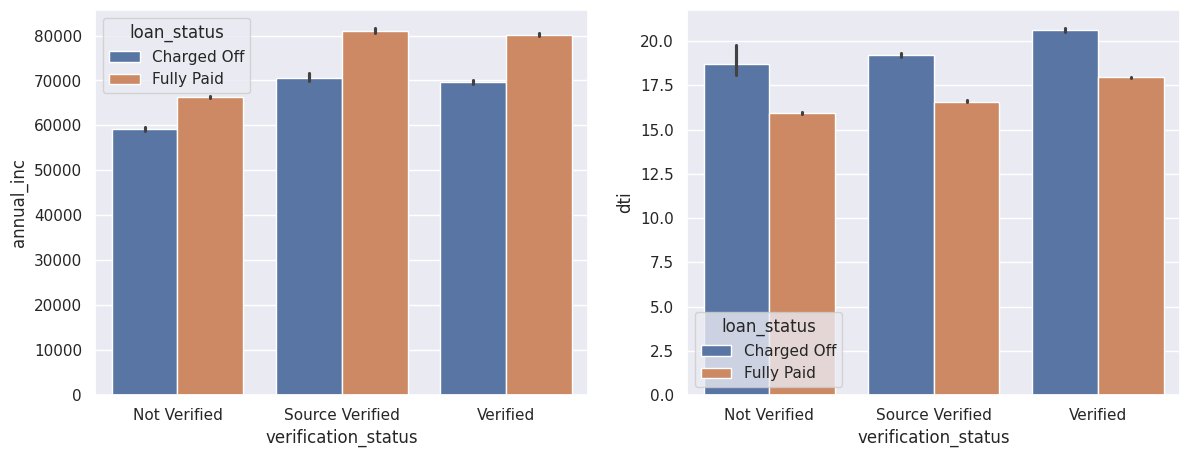

In [47]:
plt.figure(figsize=(14, 5))
ax = 121
for col in ['annual_inc', 'dti']:
    plt.subplot(ax)
    print(pd.crosstab(index=df['verification_status'], columns=df['loan_status'], values=df[col], aggfunc=['mean', 'median']).round(2))
    sns.barplot(data=df, x='verification_status', y=col, hue='loan_status')
    ax += 1
plt.show()

#### Loan Risk by Verification Status: Income, DTI & Loan Amount
##### Key Risk Patterns
- *Verified Applicants Carry Highest Risk:*
  - *Highest DTI (mean 20.63, median 20.75)*
  - *Largest loans (mean 17.4k, median 16k)*
  - *Yet higher income (mean 69.6k-80.2k)*
      - *22.3% default rate (worst performing)*
- *Not Verified Are Safest:*
  - *Lowest DTI (mean 15.92, median 15.51)*
  - *Smallest loans (mean 10.4k-10.8k)*
  - *Lower income (mean 59.2k-66.3k)*
     - *14.6% default rate (best performing)*
- *Source Verified Shows Middle Ground:*
  - *Moderate DTI (mean 16.58-19.21)*
  - *Mid-range loans (mean 14.6k-15.5k)*
     - *21.5% default rate*
#### Critical Insight
- *Verification currently targets:*
  - *Higher income borrowers (70k-81k) Who take larger loans (14k-17k) With dangerously high DTI (17-21)*
     - *Creates a perfect risk storm*
##### Recommended Underwriting Changes
- *For Verified Applicants:*
  - *Enforce strict DTI cap*
  - *Reduce max loan amount based on monthly income*
- *For Not Verified:*
  - *Increase loan limits for lowest DTI (<15) applicants*
  - *Consider lower rates (lower risk than verified)*
##### Note: Paradoxically, higher income verified borrowers are riskier than lower income unverified - suggests current verification misses key risk factors.

loan_status          Charged Off  Fully Paid
initial_list_status                         
f                      19.305991   80.694009
w                      20.075460   79.924540


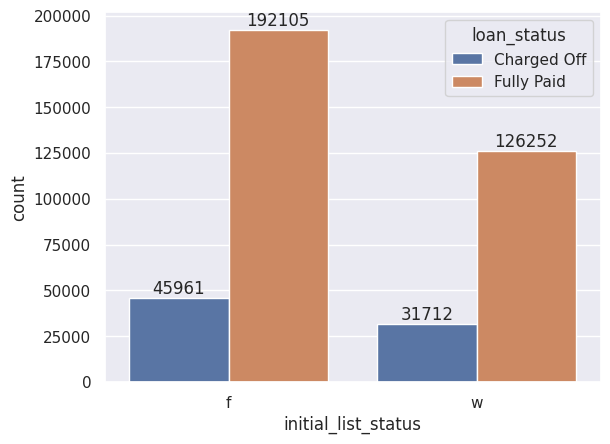

In [48]:
print(pd.crosstab(index=df['initial_list_status'], columns=df['loan_status'], normalize='index')*100)
ax = sns.countplot(data=df, x='initial_list_status', hue='loan_status')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

##### Key Findings
##### Fractional Loans (F) Dominate
- *79% of total loans (238,066 F vs. 157,964 W)*
- *Slightly better performance (19.3% defaults vs. 20.1% for Whole loans)*
##### Whole Loans (W) Show Marginally Higher Risk
- *0.8% higher default rate than Fractional*
##### Suggests fractionalization may attract more conservative investors
##### Risk Management: The 0.8% difference is small - no need for drastic underwriting changes

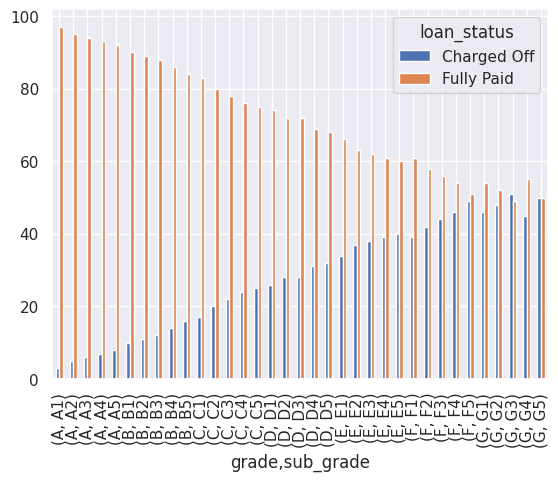

In [49]:
grade_subgrade = pd.crosstab(index=[df['grade'], df['sub_grade']], columns=df['loan_status'], normalize='index').round(2)*100
# print(grade_subgrade)
grade_subgrade.plot.bar()
plt.show()

#### Loan Grade/Subgrade Performance Analysis
##### Key Risk Patterns
- *Clear Default Gradient:*
    - *A1 (best grade): 2.9% default rate*
    - *G5 (worst grade): 50.3% default rate*
    - *Perfect correlation: Default rates rise steadily with each grade decline*
##### Worst Performers:
- *F & G grades show catastrophic failure rates (40-50%)*
- *G4/G5 essentially coin flips (45-50% defaults)*
##### Actionable Insight: The grading system works perfectly - the business challenge is enforcing discipline on riskier grades despite their higher nominal yields.

#### Extract years from employment length

In [21]:
df['emp_exp'] = df['emp_length'].str.extract('(\d+)')
df['emp_exp'] = df['emp_exp'].astype(float)
df['emp_exp'].head()

0    10.0
1     4.0
2     1.0
3     6.0
4     9.0
Name: emp_exp, dtype: float64

loan_status  Charged Off  Fully Paid
emp_exp                             
1.0            20.339542   79.660458
2.0            19.326206   80.673794
3.0            19.523133   80.476867
4.0            19.238477   80.761523
5.0            19.218721   80.781279
6.0            18.919438   81.080562
7.0            19.477400   80.522600
8.0            19.976002   80.023998
9.0            20.047016   79.952984
10.0           18.418610   81.581390


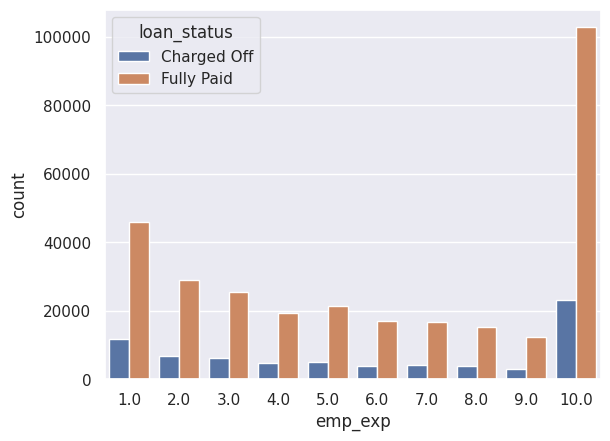

In [51]:
print(pd.crosstab(index=df['emp_exp'], columns=df['loan_status'], normalize='index')*100)
sns.countplot(data=df, x='emp_exp', hue='loan_status', order=df['emp_exp'].unique().sort())
plt.show()

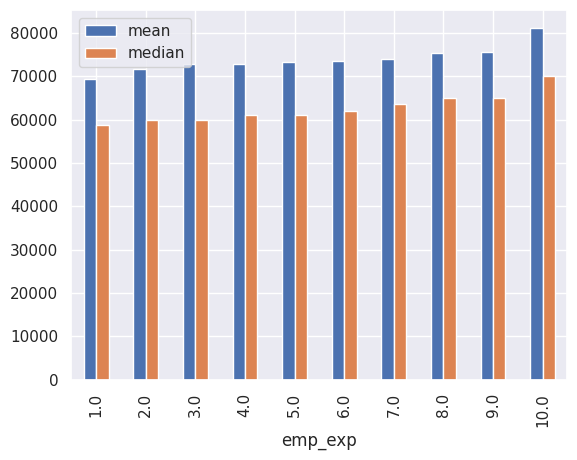

In [52]:
df.groupby('emp_exp')['annual_inc'].agg(['mean', 'median']).plot.bar()
plt.show()

#### Employment Length vs. Loan Performance Insights
##### Key Risk Patterns
- *Experience Matters, But Non-Linearly*
- *Highest Risk: New employees (<2 years) show 20.3% default rate (1-year) and 19.3% (2-year)*
- *Most Stable: 10+ year veterans perform best (18.4% defaults)*
- *Mid-Career Paradox: 5-9 year experience range shows slightly higher risk (19.2-20.3%) than 10+ year group*
##### Business Implications:
- *Require higher income and shorter period of loan terms for <=2 years employees*
- *Can relax some criterias for veterans(10+ years)*
##### Surprising Findings
- *The 5-year experience group underperforms both newer (4-year) and more experienced (6-year) cohorts*
- *Risk improves steadily after 7 years experience*

In [22]:
df['issue_month'] = df['issue_d'].str.extract('(\w+)')
df['issue_year'] = df['issue_d'].str.extract('(\d+)')
df.drop('issue_d', axis=1, inplace=True)
df[['issue_month', 'issue_year']].head(2)

issue_month issue_year
0         Jan       2015
1         Jan       2015

loan_status  Charged Off  Fully Paid
issue_year                          
2007           16.410256   83.589744
2008           15.806452   84.193548
2009           12.258233   87.741767
2010           13.210197   86.789803
2011           15.245196   84.754804
2012           16.479783   83.520217
2013           15.740001   84.259999
2014           23.111025   76.888975
2015           24.901341   75.098659
2016           13.130162   86.869838


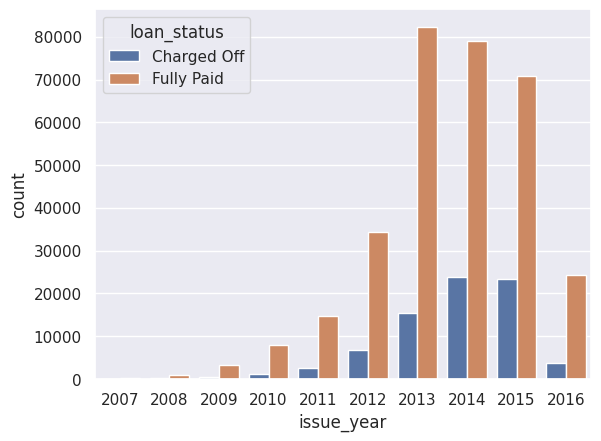

In [54]:
print(pd.crosstab(index=df['issue_year'], columns=df['loan_status'], normalize='index')*100)
sns.countplot(data=df, x='issue_year', hue='loan_status', order=sorted(df['issue_year'].unique()))
plt.show()

#### Loan Performance by Year: Key Findings
- *Pre-2014 Stability: Defaults consistently 12-16% (2007-2013)*
- *2014-2015 Crisis: Defaults spiked to 23-25% (underwriting loosened?)*
- *2016 Recovery: Dropped sharply to 13% (likely tightened criteria post-crisis)*
##### Takeaway:
- *2014-2015 loans were riskiest—audit underwriting changes during this period.*
- *Recent 2016 performance suggests improved risk management.*

loan_status         Charged Off  Fully Paid
purpose                                    
car                   13.476687   86.523313
credit_card           16.711837   83.288163
debt_consolidation    20.741385   79.258615
educational           16.342412   83.657588
home_improvement      17.007907   82.992093
house                 19.718310   80.281690
major_purchase        16.473265   83.526735
medical               21.711153   78.288847
moving                23.475823   76.524177
other                 21.217843   78.782157
renewable_energy      23.404255   76.595745
small_business        29.450974   70.549026
vacation              18.923328   81.076672
wedding               12.086093   87.913907


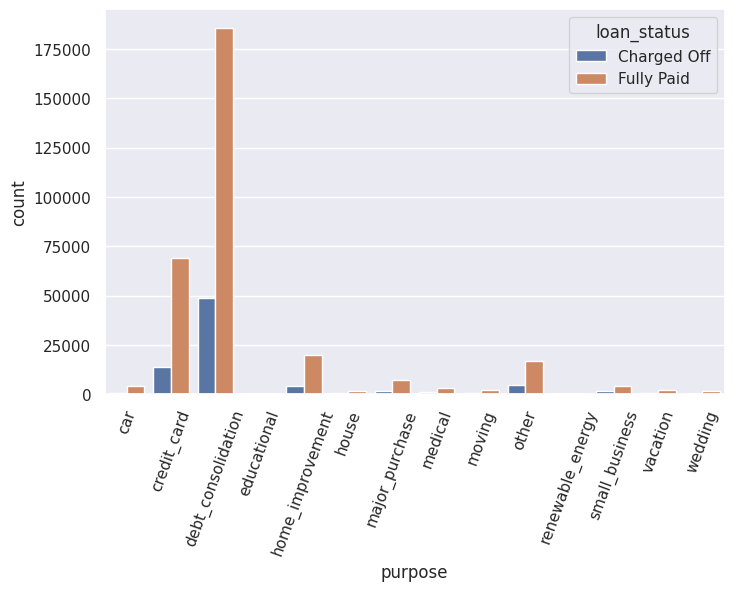

In [55]:
print(pd.crosstab(index=df['purpose'], columns=df['loan_status'], normalize='index')*100)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='purpose', hue='loan_status')
plt.xticks(rotation=70)
plt.show()

#### Loan Purpose vs. Default Risk: Key Insights
##### Risk factors:
- *Debt consolidation(20.7% default rate)*
- *Small Business(29.45%)*
##### Lower Risk factors:
- *Credit Card(16.7% defaukt rate)*
- *Home improvement*
- *Car*
##### Actionable:
- *Limit: Small biz & medical loans (high risk).*
- *Encourage: Credit card & car loans (low risk).*
- *Verify: Debt consolidation borrowers' repayment ability.*

In [23]:
df['earliest_cr_line_year'] = df['earliest_cr_line'].str.extract('(\d+)')
df['earliest_cr_line_year'].nunique()

65

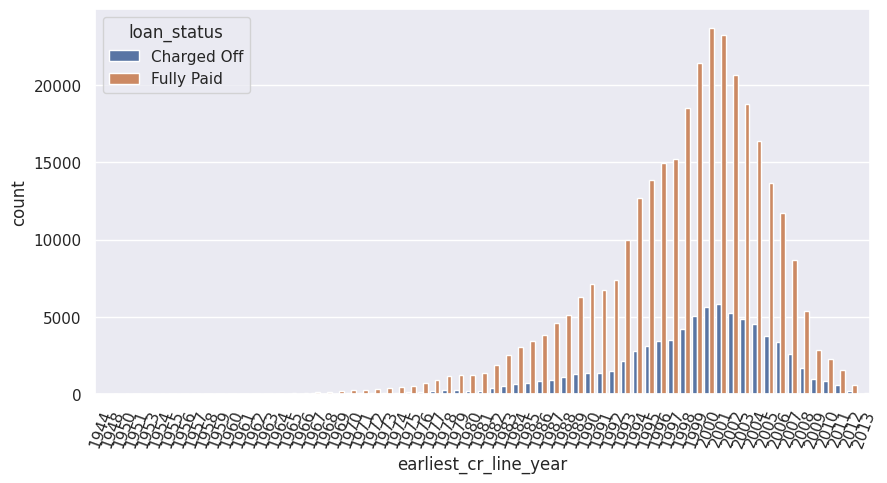

In [57]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='earliest_cr_line_year', hue='loan_status', order=sorted(df['earliest_cr_line_year'].unique()))
plt.xticks(rotation=70)
plt.show()

##### Key Findings on Credit History
- *Historical Range: Earliest credit line dates back to 1944.*
- *Common Pattern: Both defaulters and repaid customers most frequently established credit between 1996-2006.*
##### Business Recommendations
- *Credit History as a Risk Indicator:*
- *Longer credit histories (10+ years) may signal responsible borrowing behavior.*
##### Enhanced Risk Assessment:
- *Combine credit line age with DTI and income for stronger underwriting decisions.*
    - (Example: A 20-year credit history + low DTI = lower risk profile.)

In [24]:
df['pincode'] = df['address'].str.split(", ").str[-1].str.split(" ").str[-1]
df['pincode'].nunique()

10

loan_status  Charged Off  Fully Paid
pincode                             
00813           0.000000  100.000000
05113           0.000000  100.000000
11650         100.000000    0.000000
22690          19.378350   80.621650
29597           0.000000  100.000000
30723          19.490326   80.509674
48052          20.015380   79.984620
70466          19.563043   80.436957
86630         100.000000    0.000000
93700         100.000000    0.000000


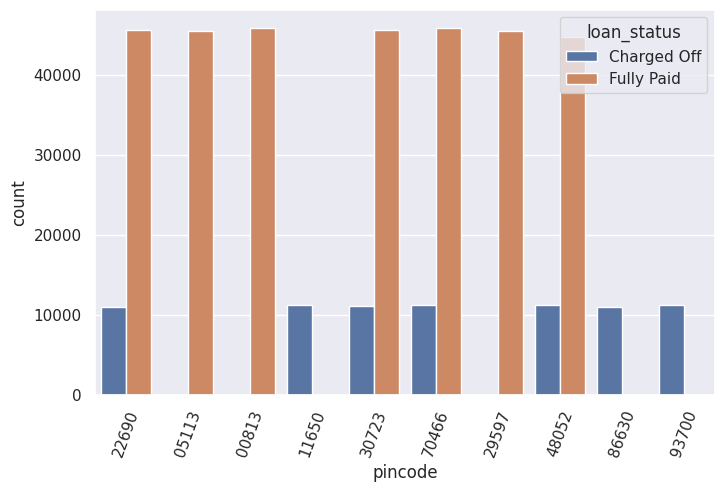

In [59]:
print(pd.crosstab(index=df['pincode'], columns=df['loan_status'], normalize='index')*100)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='pincode', hue='loan_status')
plt.xticks(rotation=70)
plt.show()

#### Pincode Risk Analysis
##### Key Observations
- *Extreme Performers:*
    - *100% Repaid: 00813, 05113, 29597 (Zero defaults)*
    - *100% Defaults: 11650, 86630, 93700 (High-risk zones)*
- *Moderate-Risk Pincodes:*
    - *22690, 30723, 48052, 70466 (~20% default rate)*
##### Business Actions
- *Auto-Approve: Pincodes with 0% defaults (e.g., 00813, 05113).*
- *Red-Zone Reject: Pincodes with 100% defaults (e.g., 11650).*
- *Enhanced Checks: For ~20% default pincodes—combine with income/DTI verification.*
##### Why It Matters:
- *Geographic risk clustering is real—use pincode data to:*
    - *Fast-track low-risk areas*
    - *Flag high-risk zones for manual review*

In [25]:
df['emp_title'] = df['emp_title'].str.lower()
df['emp_title'].nunique()

154014

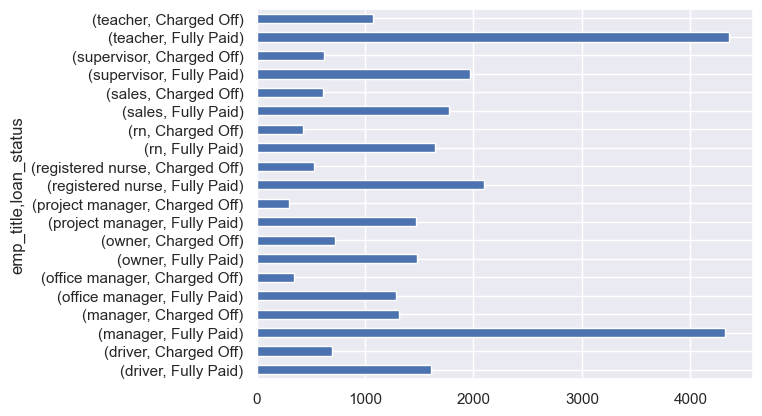

In [26]:
df.loc[df['emp_title'].isin(
    df['emp_title'].value_counts()[:10].index.tolist()
    )
    ][['emp_title', 'loan_status']].groupby('emp_title')['loan_status'].value_counts().plot.barh()
plt.show()

#### Job titles
- *Teachers and Managers stands on top as the most frequent LoanTap borrowers with 80:20 Repaid to Faulty data.*
- *Registered nurses comes third in the list with same repayment to default ratio.*

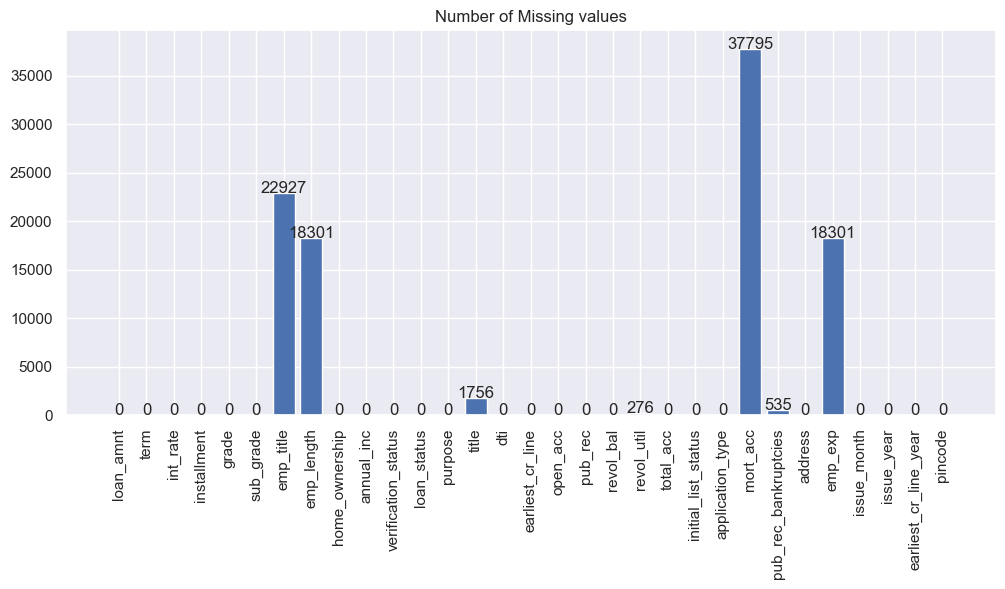

In [27]:
missing_values = df.isna().sum()
plt.figure(figsize=(12, 5))
ax = plt.bar(df.columns, missing_values)
for i in range(len(df.columns)):
    plt.text(i, missing_values[i], missing_values[i], ha='center')
plt.title("Number of Missing values")
plt.xticks(rotation=90)
plt.show()

#### Columns to Drop Immediately
- *emp_title (22,927 missing) → Too vague, hard to categorize meaningfully.*
- *title (1,756 missing) → Redundant with purpose column.*
- *address → Already extracted pincode; raw address adds no value.*
#### Columns to Keep (Despite Missing Values)
- *emp_exp (18,301 missing) → Employment history matters; impute later.*
- *mort_acc (37,795 missing) → Critical for risk assessment; too valuable to drop.*
- *pub_rec_bankruptcies (535 missing) → Low missingness; easy to fix.*
- *revol_util (276 missing) → Minor gaps; keep for credit utilization analysis.*
#### Drop These Originals (Keep Extracted Years)
- *emp_length -> Keep emp_exp (numeric version is cleaner for modeling).*
- *earliest_cr_line -> Keep earliest_cr_line_year (year alone suffices for credit history*

##### Let's check the number of missing values in each column

In [28]:
df_new = df.drop(['emp_title', 'title', 'address', 'emp_length', 'earliest_cr_line'], axis=1).copy()

In [29]:
del(df)

##### Let's check first for the revol_util columns

In [65]:
df_new['revol_util'].describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

#### Revol_Util Imputation Strategy
##### Key Stats
- *Median (54.8%) ≈ Mean (53.8%) → Symmetric distribution (but max=892% is absurd).*
- *Realistic Range: 0-100% (values >100% are data errors).*
##### Imputation Steps
- *Use median (54.8%) (resistant to outliers).*
- *Only 276 missing values - Rows Can be dropped*

In [30]:
print("Length before:", len(df_new))
df_new = df_new.dropna(subset=['revol_util'])
print("Length after:", len(df_new))

Length before: 396030
Length after: 395754


##### There are 535 missing values in the pub_rec_bankruptcies column. Lets check if it has any relation to the pub_rec column

In [31]:
df_new.loc[df_new['pub_rec_bankruptcies'].isna(), 'pub_rec'].value_counts()

pub_rec
0.0    517
1.0     17
2.0      1
Name: count, dtype: int64

#### Pub_Rec_Bankruptcies Imputation Plan
##### Approach: Grouped Median Imputation
- *For pub_rec=0 rows (517 missing): Impute median bankruptcies when pub_rec=0 (likely 0).*
- *For pub_rec=1 rows (17 missing): Impute median bankruptcies when pub_rec=1 (likely 1).*
- *For pub_rec=2 rows (1 missing): Impute median bankruptcies when pub_rec=2 (likely 1-2).*

In [32]:
for i in range(3):
    med = df_new.groupby('pub_rec')['pub_rec_bankruptcies'].median()[i]
    df_new.loc[(df_new['pub_rec_bankruptcies'].isna()) & (df_new['pub_rec'] == i), 'pub_rec_bankruptcies'] = med
df_new['pub_rec_bankruptcies'].isna().sum()

0

##### 37795 missing values in mortgage accounts. Check the relations with total_acc/open_acc

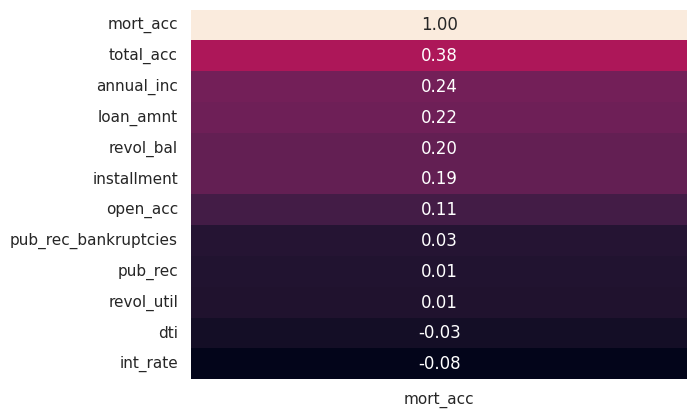

In [69]:
corr_df = pd.DataFrame(df_new[num_cols].corr()['mort_acc'].sort_values(ascending=False))
sns.heatmap(corr_df, annot=True, fmt='.2f', cbar=False)
plt.show()
del(corr_df)

##### Highest correlation mort_acc has with total_acc.

In [70]:
df_new.loc[df_new['mort_acc'].isna(), 'total_acc'].value_counts()

total_acc
17    1436
16    1426
15    1423
21    1386
13    1366
      ... 
81       1
87       1
90       1
70       1
73       1
Name: count, Length: 79, dtype: int64

#### Mortgage Accounts (mort_acc) Imputation Strategy
##### Challenges
- *High Missingness (37,795 rows) -> Cannot afford to drop.*
#### Approach
- *Step 1: Grouped Median imputation by total_acc*
- *For rows where the group median is available, impute the median mort_acc of their total_acc group.*

In [33]:
df_new['mort_acc'] = df_new.groupby('total_acc')['mort_acc'].transform(lambda x: x.fillna(x.median()))
df_new['mort_acc'].isna().sum()

0

#### Handle the 18k+ missing values for emp_exp.
- *Let's check how the employee experience varies with loan status(target)*

In [34]:
df_new.groupby('loan_status')['emp_exp'].agg(['mean', 'median'])

mean  median
loan_status                  
Charged Off  5.926753     6.0
Fully Paid   6.045623     6.0

- ##### There doesnt seem to be much variation among the defaulters and responsible borrowers. So, mean target encoding would not do justice to the impute missing employee experience null values.

mean  median
home_ownership                  
ANY             3.000000     3.0
MORTGAGE        6.698020     8.0
NONE            6.633333     7.5
OTHER           4.859813     4.0
OWN             6.222714     7.0
RENT            5.143737     4.0

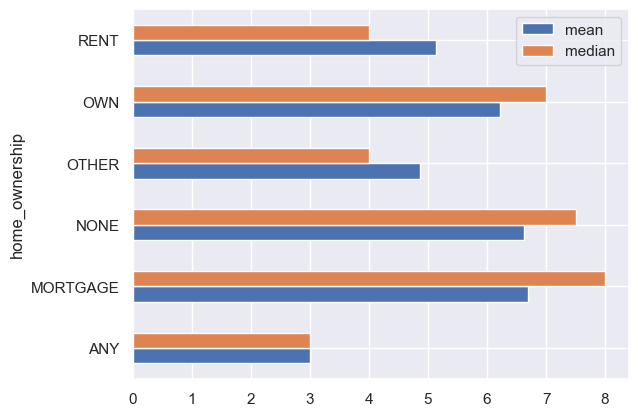

In [35]:
df_new.groupby('home_ownership')['emp_exp'].agg(['mean', 'median']).plot.barh()
df_new.groupby('home_ownership')['emp_exp'].agg(['mean', 'median'])

#### Why home_ownership Matters for Employment Length
##### Strong Logical Tie:
- *Homeowners (MORTGAGE, OWN) are more likely to have stable employment history (lenders verify income rigorously for mortgages).*
- *Renters (RENT) or those with ANY/OTHER might have gaps (e.g., freelancers, students).*
##### Data Efficiency:
- *Fewer categories than purpose, grade -> more stable grouped medians.*

In [36]:
df_new['emp_exp'] = df_new.groupby('home_ownership')['emp_exp'].transform(lambda x: x.fillna(x.median()))
df_new.emp_exp.isna().sum()

0

In [37]:
df_new.isna().sum().sum()

0

#### Check for duplicates
- *Check duplicates on subset of critical features instead of entire row.*
- *Reason:*
    - *Same person accidentally entered twice with identical loan details.*
    - *Same pincode + annual_inc + loan_amnt + issue_date(year, month) -> Very unlikely for two distinct people.*
    - *Adding purpose and grade to make it even more robust, to avoid dropping false positives.*

In [38]:
df_new[['pincode', 'annual_inc', 'loan_amnt', 'issue_month', 'issue_year', 'purpose', 'grade']].duplicated().sum()

7623

In [39]:
df_new[['pincode', 'annual_inc', 'loan_amnt', 'issue_month', 'issue_year', 'purpose', 'grade', 'loan_status']].duplicated().sum()

6222

In [41]:
dup_subset = ['pincode', 'annual_inc', 'loan_amnt', 'issue_month', 'issue_year', 'purpose', 'grade', 'loan_status']
duplicates = df_new.duplicated(subset=dup_subset, keep=False)
df_dup = df_new[duplicates].sort_values(dup_subset)
print(len(df_dup))
df_dup[df_dup['loan_status'] == 'Charged Off'][dup_subset].head(10)

11973


pincode  annual_inc  loan_amnt issue_month issue_year  \
133176   11650     30000.0     5000.0         Jun       2015   
179608   11650     30000.0     5000.0         Jun       2015   
319837   11650     30000.0    12000.0         Jan       2015   
376808   11650     30000.0    12000.0         Jan       2015   
207247   11650     33000.0     8000.0         Jan       2015   
305943   11650     33000.0     8000.0         Jan       2015   
36393    11650     35000.0     3000.0         Apr       2013   
242511   11650     35000.0     3000.0         Apr       2013   
204122   11650     35000.0     7200.0         Oct       2014   
330125   11650     35000.0     7200.0         Oct       2014   

                   purpose grade  loan_status  
133176  debt_consolidation     C  Charged Off  
179608  debt_consolidation     C  Charged Off  
319837  debt_consolidation     D  Charged Off  
376808  debt_consolidation     D  Charged Off  
207247  debt_consolidation     C  Charged Off  
305943  debt_consolidation     C  Charged Off  
36393          credit_card     D  Charged Off  
242511         credit_card     D  Charged Off  
204122  debt_consolidation     C  Charged Off  
330125  debt_consolidation     C  Charged Off

##### Observation:
- *Incorporating loan status, the duplicate number reduced a certain amount*

In [42]:
print("Length before:", len(df_new))
df_new = df_new.drop_duplicates(subset=dup_subset, keep='first')
print("Length after::", len(df_new))

Length before: 395754
Length after:: 389532


#### Decision to drop These Duplicates
##### Clear Pattern Observed
- *Exact Matches:*
    - *Rows like (00813, 21000, 6075, Aug-2013, debt_consolidation, C pointing to Charged Off) are true duplicates (same person likely submitted twice).*
- *Suspicious Clusters:*
    - *Same pincode + annual_inc + loan_amnt + purpose + grade in the same month/year -> Extremely unlikely to be unique individuals.*
- *Probable Cause:*
    - *More likely to be repeated submissions (e.g., form resubmission) than genuine loans.*

In [43]:
del(df_dup)

In [44]:
df_new.to_csv("cleaned_df.csv", index=False)

In [24]:
df_new = pd.read_csv("cleaned_df.csv")

##### Check and handling of outliers

In [25]:
def flag_outliers(df, col):
    mean = df[col].mean()
    std = df[col].std()

    # upper and lower bound
    upper_bound = mean + 3*std
    lower_bound = mean - 3*std

    # Q1 = df[col].quantile(0.25)
    # Q3 = df[col].quantile(0.75)
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR

    return df[(df[col] < lower_bound) | (df[col] > upper_bound)], lower_bound, upper_bound

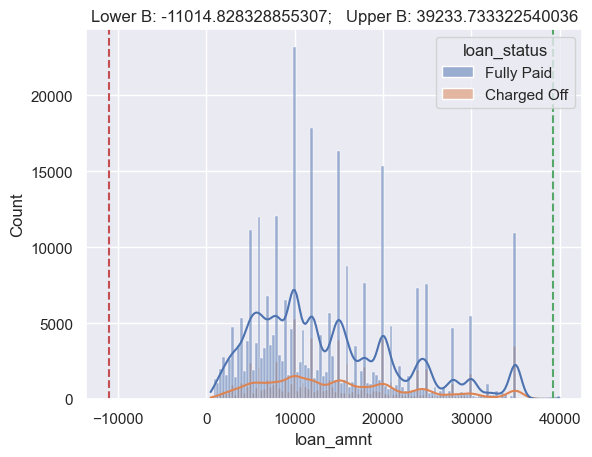

In [26]:
outliers_loan_amnt, lb, ub = flag_outliers(df_new, 'loan_amnt')

ax = sns.histplot(data=df_new, x='loan_amnt', hue='loan_status', kde=True)
ax.axvline(lb, ls='--', c='r')
ax.axvline(ub, ls='--', c='g')
plt.title(f"Lower B: {lb};   Upper B: {ub}")
plt.show()

#### Loan Amount Outlier Treatment
- *Bumpy histogram-Irregular loan amount grouping*
- *Current Max: 40,000 (already a realistic hard cap for personal loans).*
- *40k is defensible: Aligns with standard lending practices.*
- *-10500 is non-sensical*

In [27]:
df_new.groupby('loan_status')['loan_amnt'].describe().reset_index()

loan_status     count          mean          std     min     25%      50%  \
0  Charged Off   77200.0  15122.917422  8506.458037  1000.0  8500.0  14000.0   
1   Fully Paid  312332.0  13858.951452  8322.901803   500.0  7500.0  12000.0   

       75%      max  
0  20000.0  40000.0  
1  19300.0  40000.0

#### Key Observations
- *Current Range: 500 - 40,000 (hard cap already in place)*
##### Risk Differentiation:
- *Defaulters consistently take larger loans at every percentile (e.g., median 14k vs 12k for repaid)*
- *90th percentile shows 28k (defaults) vs 25k (repaid)*
##### Approach
- *Keep Existing 40k Cap and add loan_amnt tier as part of Feature Engineering*

In [28]:
# Tier loans by risk (optional)
df_new['loan_amnt_tier'] = pd.cut(df_new['loan_amnt'],
                                 bins=[0, 10000, 15000, 20000, 30000, 40001],
                                 labels=['<10k','10-15k','15-20k','20-30k','30-40k'])

In [29]:
pd.crosstab(index=df_new['loan_amnt_tier'], columns=df_new['loan_status'], normalize='index')

loan_status     Charged Off  Fully Paid
loan_amnt_tier                         
<10k               0.169891    0.830109
10-15k             0.202139    0.797861
15-20k             0.224544    0.775456
20-30k             0.226712    0.773288
30-40k             0.242086    0.757914

In [30]:
del(outliers_loan_amnt)

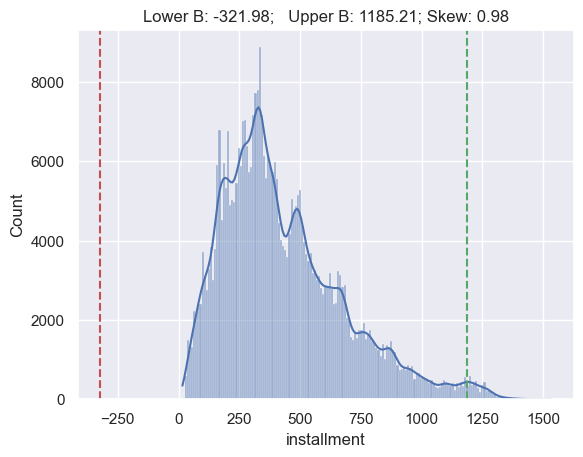

In [31]:
outliers_installments, lb, ub = flag_outliers(df_new, 'installment')

ax = sns.histplot(data=df_new, x='installment', kde=True)
ax.axvline(lb, ls='--', c='r')
ax.axvline(ub, ls='--', c='g')
plt.title(f"Lower B: {round(lb, 2)};   Upper B: {round(ub, 2)}; Skew: {df_new['installment'].skew().round(2)}")
plt.show()

In [32]:
df_new.groupby('loan_status')['installment'].describe()

count        mean         std    min     25%     50%     75%  \
loan_status                                                                    
Charged Off   77200.0  452.620386  249.136655  21.62  274.71  398.89  585.74   
Fully Paid   312332.0  426.420230  251.435911  16.08  243.13  369.02  563.23   

                 max  
loan_status           
Charged Off  1527.00  
Fully Paid   1533.81

#### Key Observations
- *Skewness: 0.98 (moderate right skew) - acceptable for loan data*
##### Defaulters Pay More (or doesn't pay):
- *Mean: 452 vs 426 (6% higher)*
- *Median: 399 vs 369 (8% higher)*
##### Natural Limits:
- *Min: 16-21 (very small loans)*
- *Max: 1,527-1,533 (matches 40000 loan for 36 months terms)*
#### Approach:
- *As per correlation this feature will be dropped after feature engineering.*
- *flag high installment for modelling purposes.*

In [33]:
del(outliers_installments)

In [34]:
df_new['high_installment_flag'] = (df_new['installment'] > ub).astype(int)

In [35]:
df_new['high_installment_flag'].value_counts(normalize=True)*100

high_installment_flag
0    98.787006
1     1.212994
Name: proportion, dtype: float64

F:\Users\Svk\miniconda3\envs\py3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


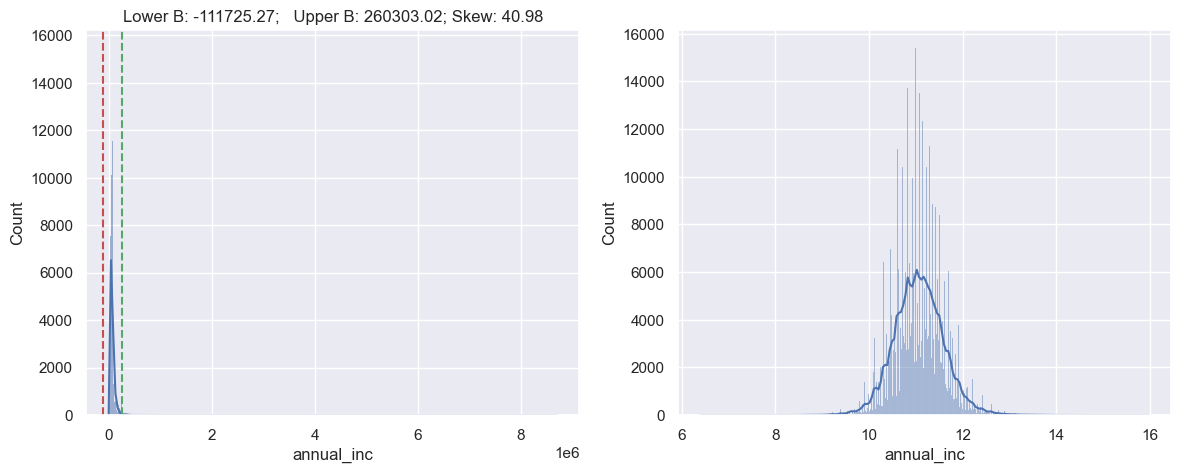

In [36]:
outliers_annual_inc, lb, ub = flag_outliers(df_new, 'annual_inc')

plt.figure(figsize=(14, 5))
plt.subplot(121)
ax = sns.histplot(data=df_new, x='annual_inc', kde=True)
ax.axvline(lb, ls='--', c='r')
ax.axvline(ub, ls='--', c='g')
plt.title(f"Lower B: {round(lb, 2)};   Upper B: {round(ub, 2)}; Skew: {df_new['annual_inc'].skew().round(2)}")
plt.subplot(122)
sns.histplot(np.log(df_new['annual_inc']), kde=True)
plt.show()

In [37]:
outliers_annual_inc['loan_status'].value_counts()

loan_status
Fully Paid     2672
Charged Off     401
Name: count, dtype: int64

#### Annual Income (annual_inc) Outlier Treatment
##### Key Observations
- *IQR Upper Bound: 260606*
- *Current Max: 8.7M (absurd for personal loans)*
##### Business Context:
- *MSME/Salaried Focus: Most borrowers earn 5L–15L/year.*
- *Ultra-High Incomes: Likely data errors or rare exceptions (e.g., CEOs).*
##### Approach
- *Clip at upper bound after creating a new feature taking log*

In [38]:
df_new['log_annual_inc'] = np.log1p(df_new['annual_inc']) # log(1+x) to circumvent zero division error
df_new['annual_inc'] = df_new['annual_inc'].clip(upper=ub)

count    389532.000000
mean      73057.920873
std       41019.192882
min           0.000000
25%       45000.000000
50%       64000.000000
75%       90000.000000
max      260303.024927
Name: annual_inc, dtype: float64


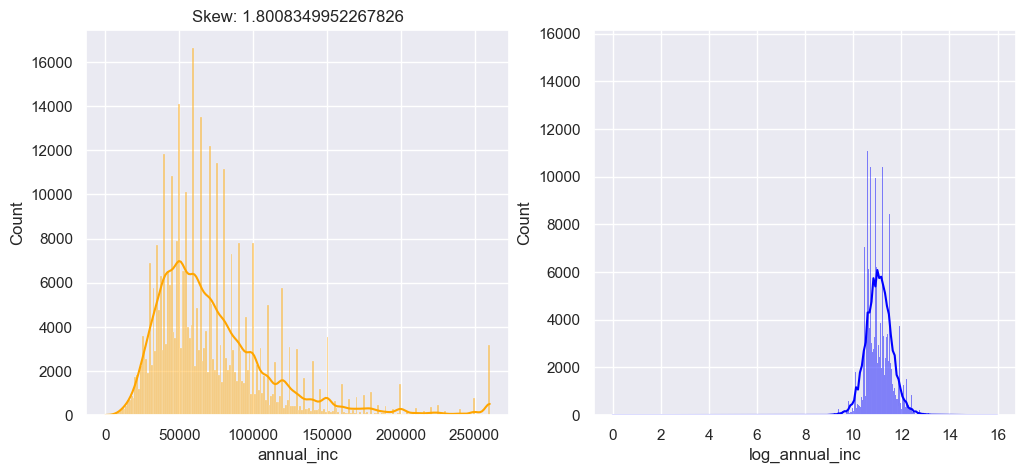

In [39]:
print(df_new['annual_inc'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.histplot(df_new['annual_inc'], kde=True, color='orange')
plt.title(f"Skew: {df_new['annual_inc'].skew()}")
plt.subplot(122)
sns.histplot(df_new['log_annual_inc'], kde=True, color='blue')
plt.show()

#### Benefits of Log Transformation
##### Normalization:
- *Right-skewed income (common in loan data) becomes normally distributed*
- *Helps linear models (logistic regression) perform better*
##### Outlier Protection:
- *Compresses extreme values (e.g., 8.7M → log(8,700,000) ≈ 15.98)*
- *Maintains ordinal relationships while reducing skew*

In [40]:
del(outliers_annual_inc)

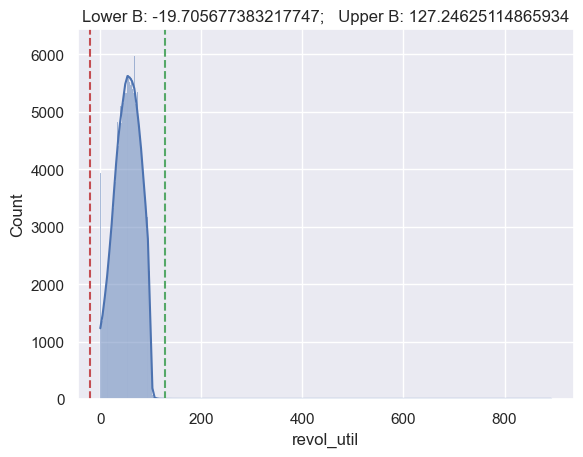

In [41]:
outliers_revol_util, lb, ub = flag_outliers(df_new, 'revol_util')

ax = sns.histplot(data=df_new, x='revol_util', kde=True)
ax.axvline(lb, ls='--', c='r')
ax.axvline(ub, ls='--', c='g')
plt.title(f"Lower B: {lb};   Upper B: {ub}")
plt.show()

In [42]:
df_new[df_new['revol_util'] > ub].shape

(16, 29)

In [43]:
df_new = df_new[df_new['revol_util'] < ub]

#### Revolving credit utilization percentage outlier Treatment
- *Revolving credit utilization above 100% or less than 0% is illogical*
- *revol_util values shows max of 892%*

In [44]:
del(outliers_revol_util)

F:\Users\Svk\miniconda3\envs\py3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


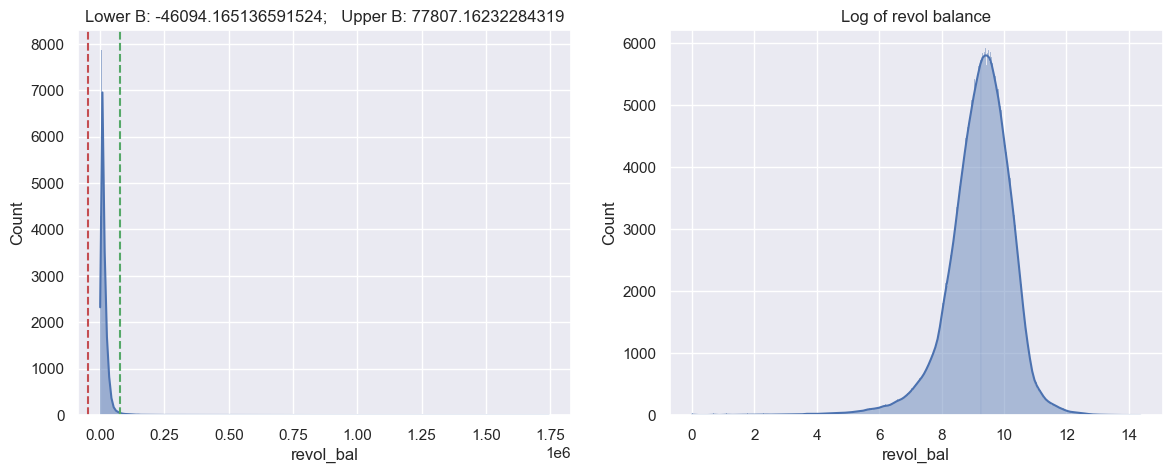

In [45]:
outliers_revol_bal, lb, ub = flag_outliers(df_new, 'revol_bal')

plt.figure(figsize=(14, 5))
plt.subplot(121)
ax = sns.histplot(data=df_new, x='revol_bal', kde=True)
ax.axvline(lb, ls='--', c='r')
ax.axvline(ub, ls='--', c='g')
plt.title(f"Lower B: {lb};   Upper B: {ub}")
plt.subplot(122)
sns.histplot(np.log(df_new['revol_bal']), kde=True)
plt.title("Log of revol balance")
plt.show()

#### Revol_Bal Outlier Strategy
##### Quick Stats Recap
- *Upper bound: 77852*
- *Max: 1.75M (clear outlier)*
##### Approach:
- *First, eliminate physically implausible values (e.g., 1.75M revol_bal is unrealistic for most individuals)*
- *drop the values greater than upper bound*

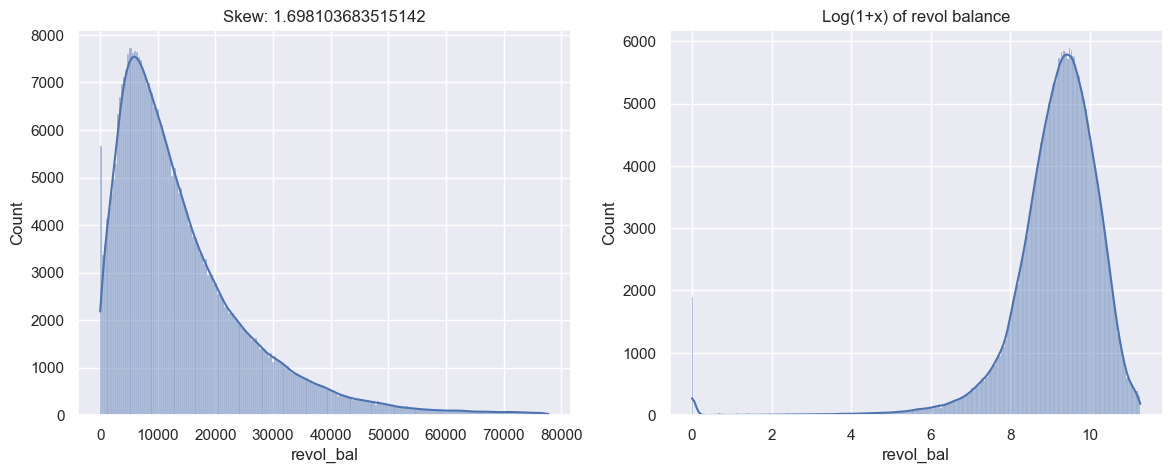

In [46]:
df_new = df_new[df_new['revol_bal'] < ub]
df_new['log_revol_bal'] = np.log1p(df_new['revol_bal']) #

plt.figure(figsize=(14, 5))
plt.subplot(121)
ax = sns.histplot(data=df_new, x='revol_bal', kde=True)
plt.title(f"Skew: {df_new['revol_bal'].skew()}")
plt.subplot(122)
sns.histplot(np.log1p(df_new['revol_bal']), kde=True)
plt.title("Log(1+x) of revol balance")
plt.show()

##### Approach:
- *Skew persists. Take log of the existing distribution.*
- *Log Scales the values for modelling*
- *Will check best model performance for with and without log transformation.*

In [47]:
del(outliers_revol_bal)

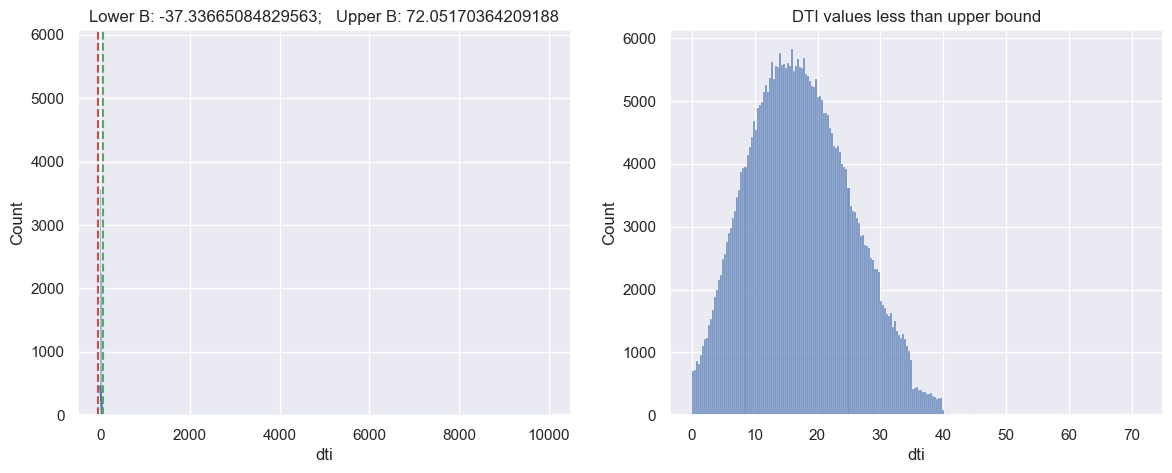

In [48]:
outliers_dti, lb, ub = flag_outliers(df_new, 'dti')

plt.figure(figsize=(14, 5))
plt.subplot(121)
ax = sns.histplot(data=df_new, x='dti', kde=True)
ax.axvline(lb, ls='--', c='r')
ax.axvline(ub, ls='--', c='g')
plt.title(f"Lower B: {lb};   Upper B: {ub}")
plt.subplot(122)
sns.histplot(df_new[df_new['dti'] < ub]['dti'])
plt.title("DTI values less than upper bound")
plt.show()

#### DTI outlier Treatment
##### Observation
- *DTI is highly skewed and contains extreme outliers and absurd values like 9999%*
- *At DTI=50%: A borrower earning 50k/month spends 25k on debts -> High financial stress.*

In [49]:
print("There are", len(df_new[df_new['dti'] > ub]), "dti-s listed above upper bound.")

There are 12 dti-s listed above upper bound.


In [50]:
df_new.groupby('loan_status')['dti'].describe()

count       mean        std  min      25%    50%    75%  \
loan_status                                                               
Charged Off   76505.0  19.637220  37.046949  0.0  13.3000  19.31  25.53   
Fully Paid   308294.0  16.791807   8.524807  0.0  10.8325  16.30  22.26   

                max  
loan_status          
Charged Off  9999.0  
Fully Paid   1622.0

##### Radically Different Distributions:
- *Charged Off: Mean=19.6, Max=9999 (absurd)*
- *Fully Paid: Mean=16.8, Max=1622 (still unrealistic)*
##### Default Risk Spike:
- *75th %ile for Defaults (25.55) is higher than Fully Paid (22.29)*
- *Confirms DTI >25% is dangerous*
#### Drop > upper bound
##### Data Shows:
- *Fully Paid median=16.33 (healthy)*
- *Charged Off median=19.33 (stress zone)*
##### Balanced Approach: Allows some high-risk/high-reward loans

In [51]:
df_new = df_new[df_new['dti'] < ub]
print("Post-dropping stats:")
df_new.groupby('loan_status')['dti'].describe()

Post-dropping stats:


count       mean       std  min    25%    50%    75%    max
loan_status                                                                
Charged Off   76502.0  19.504908  8.402173  0.0  13.30  19.31  25.53  59.26
Fully Paid   308285.0  16.782973  7.974712  0.0  10.83  16.30  22.26  71.40

In [52]:
del(outliers_dti)

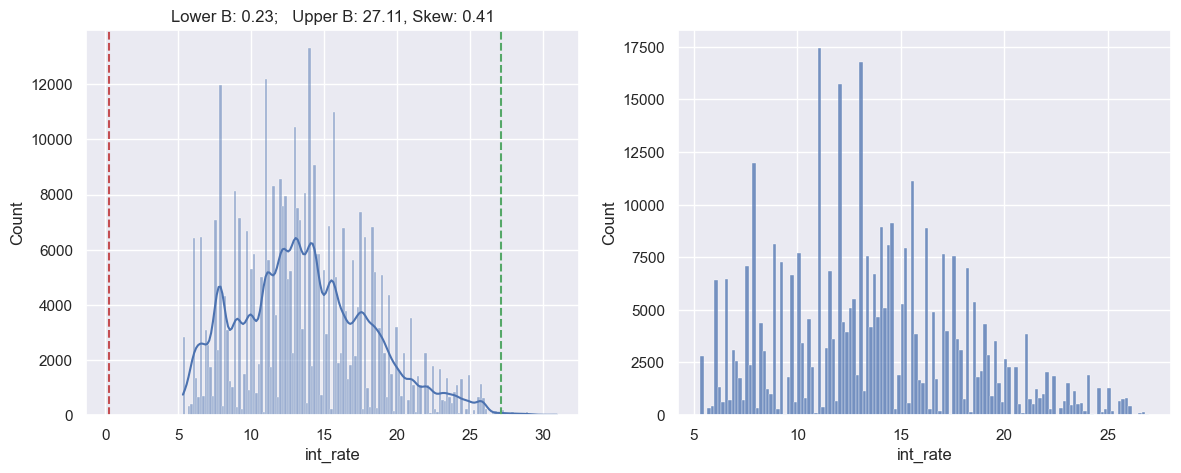

In [53]:
outliers_int_rate, lb, ub = flag_outliers(df_new, 'int_rate')

plt.figure(figsize=(14, 5))
plt.subplot(121)
ax = sns.histplot(data=df_new, x='int_rate', kde=True)
ax.axvline(lb, ls='--', c='r')
ax.axvline(ub, ls='--', c='g')
plt.title(f"Lower B: {round(lb, 2)};   Upper B: {round(ub, 2)}, Skew: {df_new['int_rate'].skew().round(2)}")
plt.subplot(122)
sns.histplot(df_new[df_new['int_rate'] < ub]['int_rate'])
plt.show()

In [54]:
df_new.groupby('loan_status')['int_rate'].describe()

count       mean       std   min    25%    50%    75%    max
loan_status                                                                 
Charged Off   76502.0  15.889585  4.389396  5.32  12.99  15.61  18.75  30.99
Fully Paid   308285.0  13.118324  4.330930  5.32   9.91  12.99  15.80  30.99

#### Key Observations
- *Current Range: 5.32% - 30.99% (valid for personal loans)*
- *Upper Bound: 27.12% (Std. Normal Dist-based) vs Max=30.99% (business-approved)*
- *No Significant Skew (0.41)*
##### Cap at 27.12% (balanced approach)
- *Also create interest rate tiers*

In [55]:
print("Default rates by interest rate tiers:")

df_new['int_rate_tier'] = pd.cut(df_new['int_rate'],
                                bins=[0, 12, 15, 18, 21, 26, 31],
                                labels=['<12%','12-15%','15-18%','18-21%','21-26%','26-31%'])

print(pd.crosstab(df_new['int_rate_tier'], df_new['loan_status'], normalize='index'))

df_new['int_rate'] = df_new['int_rate'].clip(upper=ub)

Default rates by interest rate tiers:
loan_status    Charged Off  Fully Paid
int_rate_tier                         
<12%              0.098248    0.901752
12-15%            0.193906    0.806094
15-18%            0.265522    0.734478
18-21%            0.327135    0.672865
21-26%            0.405361    0.594639
26-31%            0.427570    0.572430


#### Rate tiers and loan status relation
- *Interest rates are increaesed for high-risk applicants.*
- *Keep both for modelling and select best.*

#### Feature Engineering:
- *During outlier handling a fair amount of new features are already created.*
- *Lets try creating any other valuable features which might be helpful for modelling.*

In [56]:
df_new['installment_to_income_ratio'] = round((df_new['installment']/(df_new['annual_inc']/12))*100, 2)
# Compare with original DTI
print(df_new[['dti', 'installment_to_income_ratio']].corr())

                                  dti  installment_to_income_ratio
dti                          1.000000                     0.243238
installment_to_income_ratio  0.243238                     1.000000


##### Installment to income ratio creation
##### Pros:
- *Simple, interpretable*
- *Directly measures new loan burden*
##### Limitations:
- *Existsing debts (credit cards, mortgages) aren't included*
- *original dti column is more comprehensive*

In [57]:
# Binary flags
df_new['has_derogatory_record'] = (df_new['pub_rec'] >= 1).astype(int)
df_new['has_mortgage_history'] = (df_new['mort_acc'] >= 1).astype(int)
df_new['has_bankruptcy'] = (df_new['pub_rec_bankruptcies'] >= 1).astype(int)

##### Flag Creation Strategy for Risk Indicators
##### Recommended Thresholds & Business Logic
- *pub_rec >= 1   has_derogatory_record   Any public record signals elevated risk.*
- *mort_acc	>= 1	has_mortgage_history   Distinguishes borrowers with/without mortgage experience (impacts risk).*
- *pub_rec_bankruptcies	>= 1	has_bankruptcy	Even 1 bankruptcy severely impacts creditworthiness.*

In [58]:
df_new.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'emp_exp', 'issue_month', 'issue_year',
       'earliest_cr_line_year', 'pincode', 'loan_amnt_tier',
       'high_installment_flag', 'log_annual_inc', 'log_revol_bal',
       'int_rate_tier', 'installment_to_income_ratio', 'has_derogatory_record',
       'has_mortgage_history', 'has_bankruptcy'],
      dtype='object')

#### Features created are:
**'emp_exp', 'issue_month', 'issue_year', 'emp_exp',
       'earliest_cr_line_year', 'pincode', 'loan_amnt_tier',
       'high_installment_flag', 'log_annual_inc', 'log_revol_bal',
       'int_rate_tier', 'installment_to_income_ratio',
       'has_derogatory_record', 'has_mortgage_history', 'has_bankruptcy'**

#### Categorical Data Encoding

In [59]:
df_new.select_dtypes(include=['category', 'object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'initial_list_status', 'application_type',
       'issue_month', 'loan_amnt_tier', 'int_rate_tier'],
      dtype='object')

#### Lets encode the target variable first

In [60]:
df_new['loan_status'] = df_new['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

##### Why This Way?
- *0 for "Good" (Fully Paid)*
- *1 for "Bad" (Charged Off)*
##### Business Justification
- *Risk Modeling Focus: Predicts probability of default (Charged Off = Positive Class)*
- *Industry Standard: Aligns with scikit-learn's for metrics like precision/recall*

##### Encoding term (36 and 60 months)

In [61]:
df_new['term'] = df_new['term'].map({" 36 months": 36/(36+60), " 60 months": 60/(36+60)})
df_new['term'].unique()

array([0.375, 0.625])

##### Encoding grade (A-G) already Ordinal type category

In [62]:
grade_map = {'A':1.0, 'B':2.0, 'C':3.0, 'D':4.0, 'E':5.0, 'F':6.0, 'G':7.0}
df_new['grade'] = df_new['grade'].map(grade_map)

##### Encoding sub_grade (A1-G5) already Ordinal type category
- *For simplicity our model can use just the grade to predict risk. Whereas subgrade does provide granularity.*
- *Rather than integer encoding we can use float encoding like "A1" as "1.1", "A2" as "1.2", "G5" as "7.5".*

In [63]:
for i in df_new['sub_grade'].values[:5]:
    print(f"{i} ==> {grade_map[i[0]] + int(i[1:])*0.1}")

B4 ==> 2.4
B5 ==> 2.5
B3 ==> 2.3
A2 ==> 1.2
C5 ==> 3.5


In [64]:
df_new['sub_grade'] = df_new['sub_grade'].str[0].map(grade_map) + df_new['sub_grade'].str[1:].astype(int)*0.1

##### Encoding Home Ownership :: Nominal Data
- *Only 6 categories present. Will go with One hot Encoding*
- *Why: Interpretable, No leakage risk (like in case of Target Encoding)*
- *drop_first will reduce to 5 columns*
- *Target Encoding can only be used after train_test split to ensure no data leakage.*

In [65]:
df_new['home_ownership'].value_counts()

home_ownership
MORTGAGE    191196
RENT        156892
OWN          36555
OTHER          110
NONE            31
ANY              3
Name: count, dtype: int64

- *Combining NONE, OTHER, ANY to a single category:*
    - *Practical*
    - *Reduced dimension for OHE encoding (3 columns)*

In [66]:
df_new['home_ownership'].replace(['OTHER', 'NONE', 'ANY'], value='OTHER', inplace=True)
# get one hot columns
df_new = pd.get_dummies(df_new, columns=['home_ownership'], drop_first=True, dtype=int)
df_new.head(2)

loan_amnt   term  int_rate  installment  grade  sub_grade  annual_inc  \
0    10000.0  0.375     11.44       329.48    2.0        2.4    117000.0   
1     8000.0  0.375     11.99       265.68    2.0        2.5     65000.0   

  verification_status  loan_status             purpose  ...  log_annual_inc  \
0        Not Verified            0            vacation  ...       11.669938   
1        Not Verified            0  debt_consolidation  ...       11.082158   

   log_revol_bal  int_rate_tier  installment_to_income_ratio  \
0      10.501500           <12%                         3.38   
1       9.910066           <12%                         4.90   

   has_derogatory_record  has_mortgage_history has_bankruptcy  \
0                      0                     0              0   
1                      0                     1              0   

  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  
0                    0                   0                    1  
1                    0                   0                    0  

[2 rows x 37 columns]

#### Verification status (3 nominal categories) :: Same logic as home ownership

In [67]:
df_new['verification_status'].value_counts()

verification_status
Verified           135341
Source Verified    127454
Not Verified       121992
Name: count, dtype: int64

In [68]:
df_new = pd.get_dummies(df_new, columns=['verification_status'], drop_first=True, dtype=int)

#### Application type encoding (3 categories)

In [69]:
df_new['application_type'].value_counts(normalize=True)

application_type
INDIVIDUAL    0.998225
JOINT         0.001050
DIRECT_PAY    0.000725
Name: proportion, dtype: float64

In [70]:
pd.crosstab(index=df_new['application_type'], columns=df_new['loan_status'], normalize='index')

loan_status              0         1
application_type                    
DIRECT_PAY        0.637993  0.362007
INDIVIDUAL        0.801226  0.198774
JOINT             0.873762  0.126238

- *Although highly biased single category, it does have risk prediction capability.*
- *Nominal data: OHE*

In [71]:
# Ordinal encoding (assuming hierarchy)
df_new = pd.get_dummies(df_new, columns=['application_type'], drop_first=True, dtype=int)

#### Initial list status (2 categories)
- *Binary Encoding for whole and fractional loans*

In [72]:
# Binary encoding
df_new['initial_list_status'] = (df_new['initial_list_status'] == 'w').astype(int)

#### Engineered binned ordinal features (loan_amnt_tier, int_rate_tier)
- *Already binned and ordered: Convert to numeric*

In [73]:
# Already ordinal - just convert to numeric
loan_tier_map = {'<10k':1.0, '10-15k':2.0, '15-20k':3.0, '20-30k':4.0, '30-40k':5.0}
int_rate_tier_map = {'<12%':1.0, '12-15%':2.0, '15-18%':3.0, '18-21%':4.0, '21-26%':5.0, '26-31%':6.0}

df_new['loan_amnt_tier'] = df_new['loan_amnt_tier'].map(loan_tier_map)
df_new['int_rate_tier'] = df_new['int_rate_tier'].map(int_rate_tier_map)

In [74]:
df_new['int_rate_tier'] = df_new['int_rate_tier'].astype(int)
df_new['loan_amnt_tier'] = df_new['loan_amnt_tier'].astype(int)

#### Some Remaining encoding of extracted features
- *Issue Month: Ordinal because Jan comes before Feb*
- *Pincode: Frequency encoding*
- *Years: *

In [75]:
month_map = {x: i for i, x in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], start=1)}
month_map
df_new['issue_month_encoded'] = df_new['issue_month'].map(month_map)

In [76]:
pincode_counts = df_new['pincode'].value_counts(normalize=True)
df_new['pincode_freq'] = df_new['pincode'].map(pincode_counts)

#### Purpose Encoding (14 categories)
- *OHE not preferable*
- *Frequency encoding for weighted categories*
- *Target encoding after train test split*

In [77]:
# probablity values wrt frequncy
purpose_freq = df_new['purpose'].value_counts(normalize=True).round(4).to_dict()
print(purpose_freq)
#encode
df_new['purpose_freq'] = df_new['purpose'].map(purpose_freq)

{'debt_consolidation': 0.5895, 'credit_card': 0.21, 'home_improvement': 0.061, 'other': 0.0542, 'major_purchase': 0.0225, 'small_business': 0.0145, 'car': 0.0121, 'medical': 0.0107, 'moving': 0.0074, 'vacation': 0.0063, 'house': 0.0056, 'wedding': 0.0047, 'renewable_energy': 0.0008, 'educational': 0.0007}


##### For VIF analysis:
- *using the purpose_freq column*
- *safe with no data leakage (eg. Target Encoding)*

In [78]:
print(f"Length before: {len(df_new)}")
# Replace infinite values with NaN
df_new = df_new.replace([np.inf, -np.inf], np.nan)
# Drop rows with NaN values in the features
df_new = df_new.dropna()
print(f"Length after: {len(df_new)}")

Length before: 384787
Length after: 384787


#### Clean dataset
- *Drop the previously discussed columns*

In [79]:
df_new = df_new.drop(['installment', 'issue_month'], axis=1)

In [80]:
df_new.to_csv("cleaned_df.csv", index=False)

In [81]:
df_new = pd.read_csv("cleaned_df.csv")

#### VIF(multicolinearity check)

In [88]:
pd.set_option('display.max_columns', None)
df_new.head()

loan_amnt   term  int_rate  grade  sub_grade  annual_inc  loan_status  \
0    10000.0  0.375     11.44    2.0        2.4    117000.0            0   
1     8000.0  0.375     11.99    2.0        2.5     65000.0            0   
2    15600.0  0.375     10.49    2.0        2.3     43057.0            0   
3     7200.0  0.375      6.49    1.0        1.2     54000.0            0   
4    24375.0  0.625     17.27    3.0        3.5     55000.0            1   

              purpose    dti  open_acc  pub_rec  revol_bal  revol_util  \
0            vacation  26.24        16      0.0    36369.0        41.8   
1  debt_consolidation  22.05        17      0.0    20131.0        53.3   
2         credit_card  12.79        13      0.0    11987.0        92.2   
3         credit_card   2.60         6      0.0     5472.0        21.5   
4         credit_card  33.95        13      0.0    24584.0        69.8   

   total_acc  initial_list_status  mort_acc  pub_rec_bankruptcies  emp_exp  \
0         25                    1       0.0                   0.0     10.0   
1         27                    0       3.0                   0.0      4.0   
2         26                    0       0.0                   0.0      1.0   
3         13                    0       0.0                   0.0      6.0   
4         43                    0       1.0                   0.0      9.0   

   issue_year  earliest_cr_line_year  pincode  loan_amnt_tier  \
0        2015                   1990    22690               1   
1        2015                   2004     5113               1   
2        2015                   2007     5113               3   
3        2014                   2006      813               1   
4        2013                   1999    11650               4   

   high_installment_flag  log_annual_inc  log_revol_bal  int_rate_tier  \
0                      0       11.669938      10.501500              1   
1                      0       11.082158       9.910066              1   
2                      0       10.670303       9.391661              1   
3                      0       10.896758       8.607582              1   
4                      0       10.915107      10.109892              3   

   installment_to_income_ratio  has_derogatory_record  has_mortgage_history  \
0                         3.38                      0                     0   
1                         4.90                      0                     1   
2                        14.13                      0                     0   
3                         4.90                      0                     0   
4                        13.29                      0                     1   

   has_bankruptcy  home_ownership_OTHER  home_ownership_OWN  \
0               0                     0                   0   
1               0                     0                   0   
2               0                     0                   0   
3               0                     0                   0   
4               0                     0                   0   

   home_ownership_RENT  verification_status_Source Verified  \
0                    1                                    0   
1                    0                                    0   
2                    1                                    1   
3                    1                                    0   
4                    0                                    0   

   verification_status_Verified  application_type_INDIVIDUAL  \
0                             0                            1   
1                             0                            1   
2                             0                            1   
3                             0                            1   
4                             1                            1   

   application_type_JOINT  issue_month_encoded  pincode_freq  purpose_freq  
0                       0                    1      0.142715        0.0063  
1                       

##### A little more feature engineering to normalize the years values

In [89]:
years_columns = df_new.filter(regex='_year').columns.tolist()
years_columns

for col in years_columns:
    df_new[col+'_norm'] = df_new[col] - df_new[col].min()
    df_new = df_new.drop(col, axis=1)

df_new.head()

loan_amnt   term  int_rate  grade  sub_grade  annual_inc  loan_status  \
0    10000.0  0.375     11.44    2.0        2.4    117000.0            0   
1     8000.0  0.375     11.99    2.0        2.5     65000.0            0   
2    15600.0  0.375     10.49    2.0        2.3     43057.0            0   
3     7200.0  0.375      6.49    1.0        1.2     54000.0            0   
4    24375.0  0.625     17.27    3.0        3.5     55000.0            1   

              purpose    dti  open_acc  pub_rec  revol_bal  revol_util  \
0            vacation  26.24        16      0.0    36369.0        41.8   
1  debt_consolidation  22.05        17      0.0    20131.0        53.3   
2         credit_card  12.79        13      0.0    11987.0        92.2   
3         credit_card   2.60         6      0.0     5472.0        21.5   
4         credit_card  33.95        13      0.0    24584.0        69.8   

   total_acc  initial_list_status  mort_acc  pub_rec_bankruptcies  emp_exp  \
0         25                    1       0.0                   0.0     10.0   
1         27                    0       3.0                   0.0      4.0   
2         26                    0       0.0                   0.0      1.0   
3         13                    0       0.0                   0.0      6.0   
4         43                    0       1.0                   0.0      9.0   

   pincode  loan_amnt_tier  high_installment_flag  log_annual_inc  \
0    22690               1                      0       11.669938   
1     5113               1                      0       11.082158   
2     5113               3                      0       10.670303   
3      813               1                      0       10.896758   
4    11650               4                      0       10.915107   

   log_revol_bal  int_rate_tier  installment_to_income_ratio  \
0      10.501500              1                         3.38   
1       9.910066              1                         4.90   
2       9.391661              1                        14.13   
3       8.607582              1                         4.90   
4      10.109892              3                        13.29   

   has_derogatory_record  has_mortgage_history  has_bankruptcy  \
0                      0                     0               0   
1                      0                     1               0   
2                      0                     0               0   
3                      0                     0               0   
4                      0                     1               0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0                     0                   0                    1   
1                     0                   0                    0   
2                     0                   0                    1   
3                     0                   0                    1   
4                     0                   0                    0   

   verification_status_Source Verified  verification_status_Verified  \
0                                    0                             0   
1                                    0                             0   
2                                    1                             0   
3                                    0                             0   
4                                    0                             1   

   application_type_INDIVIDUAL  application_type_JOINT  issue_month_encoded  \
0                            1                       0                    1   
1                            1                       0                    1   
2                            1                       0                    1   
3                            1                       0                   11   
4                            1                       0                    4   

   pincode_freq  purpose_freq  issue_year_norm  earliest_cr_line_year_norm  
0      0.142715        0.0063            

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
features = df_new.drop(columns=['loan_status']).select_dtypes(include=np.number).columns.tolist()
print("num numerical feature:", len(features), 'num categorical feature:', len(df_new.select_dtypes(include=['object', 'category']).columns))

num numerical feature: 38 num categorical feature: 1


In [92]:
import time

In [93]:
tik = time.time()
vif_data = pd.DataFrame()
vif_data['features'] = features
vif_data['VIF'] = [variance_inflation_factor(df_new[features].values, i) for i in range(len(features))]
tok = time.time()
print("Time taken: ", str(tok-tik), "seconds")
vif_data.sort_values(by='VIF', ascending=False)

Time taken:  262.0089020729065 seconds


features          VIF
19                       log_annual_inc  1452.202239
4                             sub_grade  1165.855050
31          application_type_INDIVIDUAL  1100.119706
3                                 grade   620.800502
2                              int_rate   307.165738
20                        log_revol_bal   160.314456
37           earliest_cr_line_year_norm    71.952670
0                             loan_amnt    70.190628
17                       loan_amnt_tier    51.246506
21                        int_rate_tier    44.790535
1                                  term    35.902592
36                      issue_year_norm    31.792558
5                            annual_inc    24.780837
22          installment_to_income_ratio    20.780338
25                       has_bankruptcy    18.264874
34                         pincode_freq    16.464663
14                 pub_rec_bankruptcies    13.816746
7                              open_acc    13.680003
11                            total_acc    13.652199
10                           revol_util    10.367039
23                has_derogatory_record     8.593870
6                                   dti     8.221219
9                             revol_bal     6.520684
24                 has_mortgage_history     6.149784
33                  issue_month_encoded     4.910410
15                              emp_exp     4.540909
35                         purpose_freq     4.186253
8                               pub_rec     3.887601
13                             mort_acc     3.593252
28                  home_ownership_RENT     3.089341
16                              pincode     2.811059
30         verification_status_Verified     2.493417
29  verification_status_Source Verified     2.248404
32               application_type_JOINT     2.166452
12                  initial_list_status     2.120046
27                   home_ownership_OWN     1.321225
18                high_installment_flag     1.172141
26                 home_ownership_OTHER     1.003265

In [94]:
# store the numerical features
features = df_new.drop(columns=['log_annual_inc', 'loan_status']).select_dtypes(include=np.number).columns.tolist()
features
# run vif again

['loan_amnt',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'mort_acc',
 'pub_rec_bankruptcies',
 'emp_exp',
 'pincode',
 'loan_amnt_tier',
 'high_installment_flag',
 'log_revol_bal',
 'int_rate_tier',
 'installment_to_income_ratio',
 'has_derogatory_record',
 'has_mortgage_history',
 'has_bankruptcy',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'application_type_INDIVIDUAL',
 'application_type_JOINT',
 'issue_month_encoded',
 'pincode_freq',
 'purpose_freq',
 'issue_year_norm',
 'earliest_cr_line_year_norm']

#### Lets run the VIF analysis and check many variables gets dropped
- *To preserve some important domain variables, lets keep the VIF threshold at 10*
- *Going forward Correlations and RFE can get rid of useless variables*

In [95]:
def vif_calc(X):
    X_matrix = X.values
    vif = [variance_inflation_factor(X_matrix, i) for i in range(X_matrix.shape[1])]
    return pd.DataFrame({'feature': X.columns, 'VIF': vif})

In [96]:
removed_feat = []
for i in range(len(features)):
    vif_data = vif_calc(df_new[features])
    vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

    curr_feat = vif_data.iloc[0, 0]
    curr_vif = vif_data.iloc[0, 1]

    if curr_vif <= 10:
        break
    print(curr_feat, '--- removed ::', "VIF:", curr_vif)
    features.remove(curr_feat)
    removed_feat.append(curr_feat)

sub_grade --- removed :: VIF: 1165.102066289535
application_type_INDIVIDUAL --- removed :: VIF: 243.7475232910357
int_rate --- removed :: VIF: 180.72282286299398
log_revol_bal --- removed :: VIF: 110.92561356765619
loan_amnt --- removed :: VIF: 65.72453622740122
earliest_cr_line_year_norm --- removed :: VIF: 43.56154450571623
grade --- removed :: VIF: 38.64837500611098
term --- removed :: VIF: 24.07196294439143
issue_year_norm --- removed :: VIF: 22.47950090302202
has_bankruptcy --- removed :: VIF: 18.24146268597736
total_acc --- removed :: VIF: 13.191565813857466
loan_amnt_tier --- removed :: VIF: 12.120017932789874
pincode_freq --- removed :: VIF: 11.22559912605593


In [98]:
vif_data

feature       VIF
0                                   dti  7.568921
1                              open_acc  7.480679
2                            revol_util  7.453507
3                            annual_inc  6.394823
4           installment_to_income_ratio  5.878824
5                 has_derogatory_record  5.624685
6                  has_mortgage_history  5.510747
7                         int_rate_tier  5.134673
8                   issue_month_encoded  4.179868
9                               emp_exp  4.108094
10                         purpose_freq  4.071039
11                            revol_bal  4.037188
12                 pub_rec_bankruptcies  3.579358
13                              pub_rec  3.297943
14                             mort_acc  3.248349
15                              pincode  2.707463
16                  home_ownership_RENT  2.592908
17         verification_status_Verified  2.434384
18  verification_status_Source Verified  2.169768
19                  initial_list_status  1.700460
20                   home_ownership_OWN  1.252295
21                high_installment_flag  1.074933
22               application_type_JOINT  1.005032
23                 home_ownership_OTHER  1.001229

#### Severely Collinear Features (Removed)
- *sub_grade (VIF=1165)*
- *log_annual_inc (VIF=499): Direct transform of annual_inc (kept)*
- *loan_amnt (VIF=65)*
- *int_rate (VIF=180)*
#### Domain Critical Features Kept(>5)
- *dti (VIF=7.5)*
- *revol_util (VIF=7.4): May be worth keeping.*
- *annual_inc*
##### Strong Keeps
- *mort_acc, pub_rec (fundamental) (highly correlated with bankruptcies)*
- *Flags (high_installment_flag etc.)*

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.90      0.72      0.80     61657
           1       0.38      0.68      0.48     15301

    accuracy                           0.71     76958
   macro avg       0.64      0.70      0.64     76958
weighted avg       0.80      0.71      0.74     76958



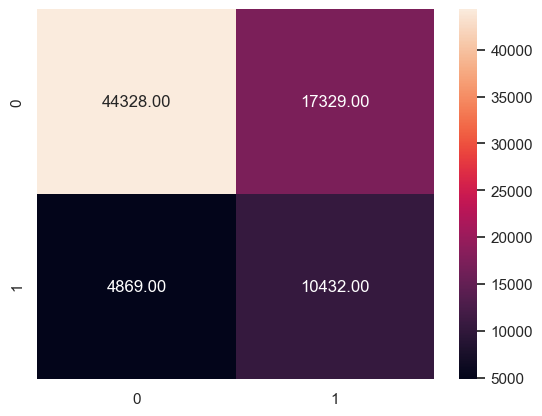

In [100]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
scaler = StandardScaler()

X = df_new[features]
y = df_new['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg.fit(X_train, y_train)

y_pred_test = log_reg.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.2f')
print(classification_report(y_test, y_pred_test))

#### Preliminary model reports
- *Good Performance for (Class 0): Precision (85%) and recall (97%) are high for class 0, indicating the model is good at correctly identifying non-defaults and doesn't miss many.*
- *Poor Performance for Defaults (Class 1): Recall for class 1 (30%) is very low, meaning the model only identifies a small fraction of actual defaults.*
##### Key takeaway:
- *The model is much better at predicting non-defaults than defaults. It struggles significantly to identify borrowers who will actually default. This is a common issue with imbalanced datasets.*

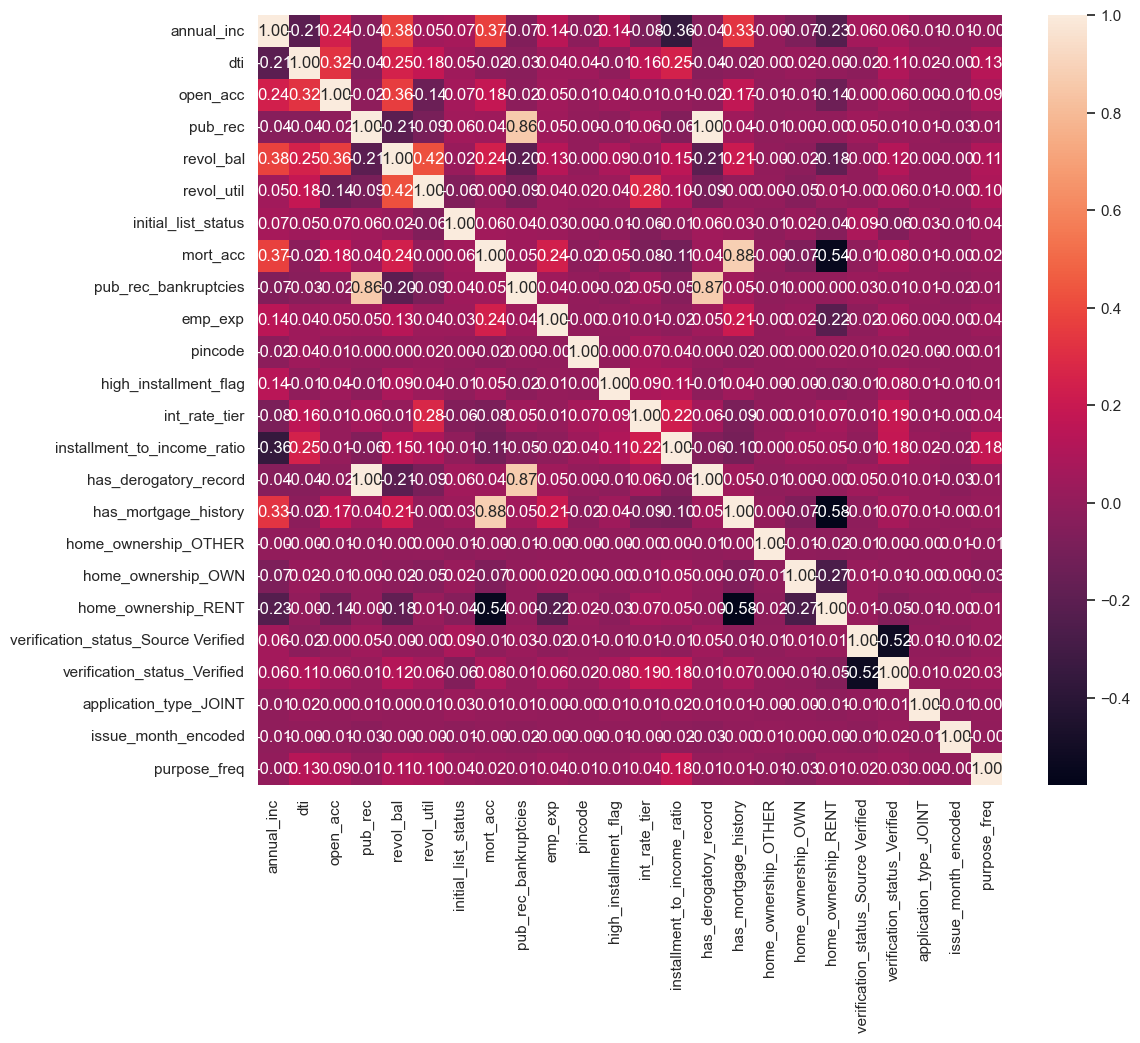

In [101]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_new[features].corr(method='spearman'), annot=True, fmt='.2f')
plt.show()

#### Features needs to be removed:
- *pub_rec, pub_rec_bankruptcies: dataset already has binary feature for it*
- *mort_acc: dataset has has_mortgage_history*
- *verification_status_Source_verified*
- *Drop pincode and purpose frequency ecnodings and Reinstating purpose, pincode*

In [103]:
for feat in ['pub_rec', 'pub_rec_bankruptcies', 'mort_acc', 'verification_status_Source Verified']:
    features.remove(feat)

In [104]:
df_new = pd.concat([df_new[features], df_new['purpose'], df_new['loan_status']], axis=1)

In [105]:
df_new.to_csv("pruned_df.csv", index=False)

In [3]:
df_new = pd.read_csv("pruned_df.csv")
df_new.head(2)

annual_inc    dti  open_acc  revol_bal  revol_util  initial_list_status  \
0    117000.0  26.24        16    36369.0        41.8                    1   
1     65000.0  22.05        17    20131.0        53.3                    0   

   emp_exp  pincode  high_installment_flag  int_rate_tier  ...  \
0     10.0    22690                      0              1  ...   
1      4.0     5113                      0              1  ...   

   has_mortgage_history  home_ownership_OTHER  home_ownership_OWN  \
0                     0                     0                   0   
1                     1                     0                   0   

   home_ownership_RENT  verification_status_Verified  application_type_JOINT  \
0                    1                             0                       0   
1                    0                             0                       0   

   issue_month_encoded  purpose_freq             purpose  loan_status  
0                    1        0.0063            vacation            0  
1                    1        0.5895  debt_consolidation            0  

[2 rows x 22 columns]

##### Standardizing the numeric features
- *Need to separate the numeric features from the One-hot encoded features*

In [4]:
numeric_features = df_new.select_dtypes(include=np.number).columns.tolist()

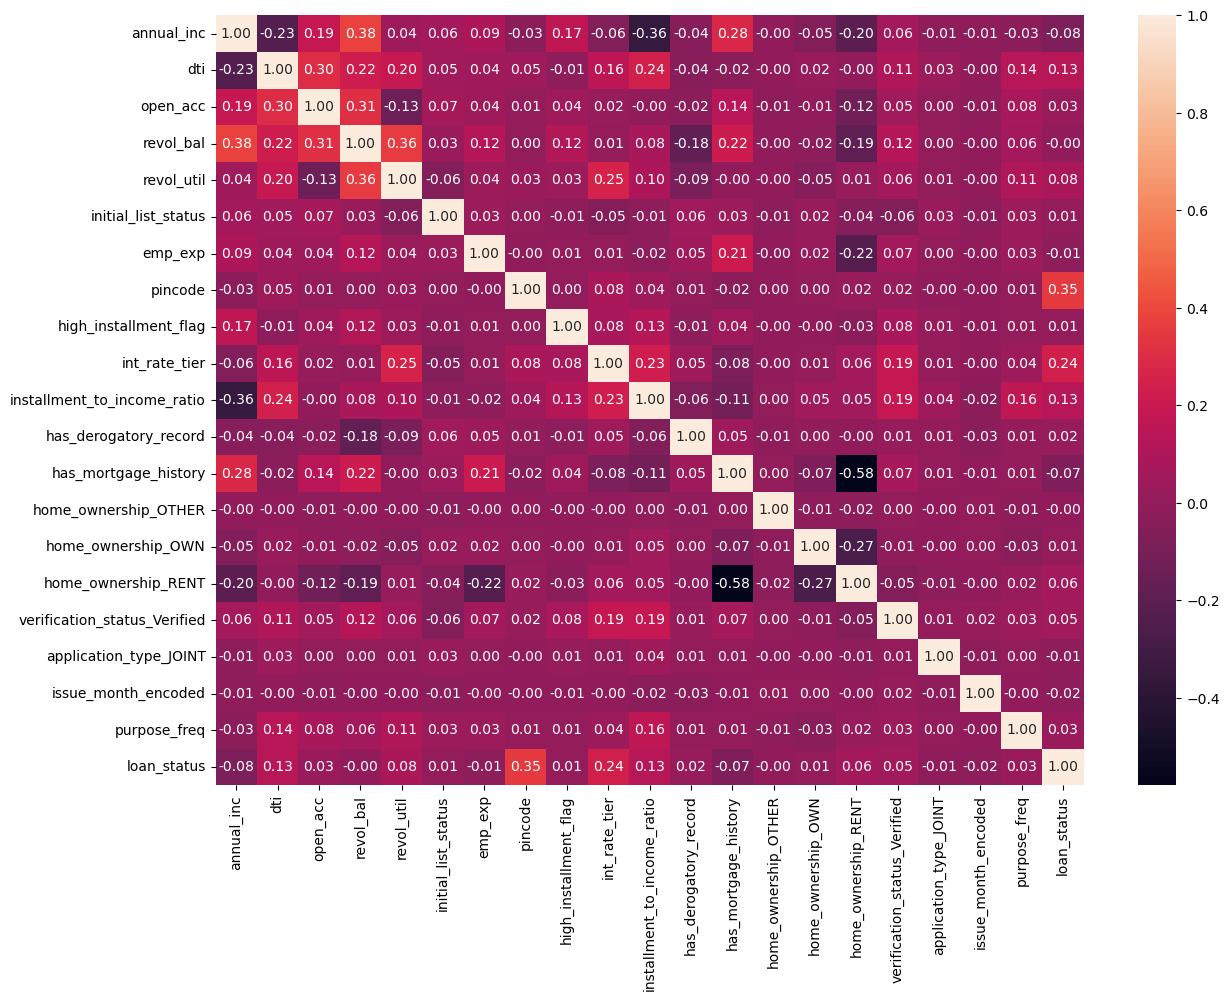

In [5]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_new[numeric_features].corr(), annot=True, fmt='.2f')
plt.show()

#### Lets prepare our data for RFE

In [6]:
from sklearn.preprocessing import TargetEncoder

#### Split train and test set
- *Use of stratification for equal class label distribution between train and test set*

In [7]:
X = df_new.drop('loan_status', axis=1)
y = df_new['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=df_new['loan_status'].values.tolist())

print("X_train shape:", X_train.shape, 'y_train shape:', y_train.shape)

X_train shape: (307829, 21) y_train shape: (307829,)


In [8]:
print("Stratification check: y train mean:", y_train.mean(), 'y test mean:', y_test.mean())

Stratification check: y train mean: 0.1988149264689162 y test mean: 0.19882273447854673


In [9]:
X_train.head(2)

annual_inc    dti  open_acc  revol_bal  revol_util  \
6371       52000.0  14.15         7    11040.0        93.6   
174798     28000.0   7.46         3     5665.0        83.3   

        initial_list_status  emp_exp  pincode  high_installment_flag  \
6371                      0      5.0    22690                      0   
174798                    0     10.0     5113                      0   

        int_rate_tier  ...  has_derogatory_record  has_mortgage_history  \
6371                3  ...                      0                     0   
174798              2  ...                      1                     0   

        home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
6371                       0                   1                    0   
174798                     0                   0                    0   

        verification_status_Verified  application_type_JOINT  \
6371                               0                       0   
174798                             0                       0   

        issue_month_encoded  purpose_freq             purpose  
6371                     11        0.5895  debt_consolidation  
174798                   10        0.5895  debt_consolidation  

[2 rows x 21 columns]

#### Features to encode using target encoder

In [10]:
# columns to encode with target encoder
cols_to_encode = ['pincode', 'issue_month_encoded', 'purpose']
# initialize target encoder
encoder = TargetEncoder(target_type='binary', smooth='auto')
# fit and transform training data
X_train[cols_to_encode] = encoder.fit_transform(X_train[cols_to_encode], y_train)
# transform the test data too
X_test[cols_to_encode] = encoder.transform(X_test[cols_to_encode])
X_train[cols_to_encode].head()

pincode  issue_month_encoded   purpose
6371    0.199233             0.191269  0.210817
174798  0.000000             0.202417  0.210817
305743  0.000000             0.207649  0.210860
8279    0.196829             0.203430  0.169328
13174   0.197424             0.210570  0.170403

##### Go ahead with scaling the data:
- *Using Standard scaler, best for linear model will be used.*

In [11]:
X_train.columns

Index(['annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util',
       'initial_list_status', 'emp_exp', 'pincode', 'high_installment_flag',
       'int_rate_tier', 'installment_to_income_ratio', 'has_derogatory_record',
       'has_mortgage_history', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Verified',
       'application_type_JOINT', 'issue_month_encoded', 'purpose_freq',
       'purpose'],
      dtype='object')

In [12]:
features_to_scale = ['annual_inc', 'dti', 'open_acc', 'revol_bal',
                     'revol_util', 'emp_exp', 'pincode', 'int_rate_tier',
                     'installment_to_income_ratio', 'issue_month_encoded', 'purpose', 'purpose_freq']

#### Scaling:
- *Scale only the numeric features (OHE features excluded)*

In [13]:
# initialze scaler
scaler = StandardScaler()
# transform train and test data
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])
X_train.head(2)

annual_inc       dti  open_acc  revol_bal  revol_util  \
6371     -0.505161 -0.390788 -0.835996  -0.275989    1.635959   
174798   -1.109863 -1.213627 -1.617068  -0.726747    1.214153   

        initial_list_status   emp_exp   pincode  high_installment_flag  \
6371                      0 -0.297154  0.001604                      0   
174798                    0  1.149678 -0.760870                      0   

        int_rate_tier  ...  has_derogatory_record  has_mortgage_history  \
6371         0.641401  ...                      0                     0   
174798      -0.172758  ...                      1                     0   

        home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
6371                       0                   1                    0   
174798                     0                   0                    0   

        verification_status_Verified  application_type_JOINT  \
6371                               0                       0   
174798                             0                       0   

        issue_month_encoded  purpose_freq   purpose  
6371              -0.750588      0.810917  0.493025  
174798             0.357693      0.810917  0.493025  

[2 rows x 21 columns]

#### Lets check how the scaled varaiables are distibuted

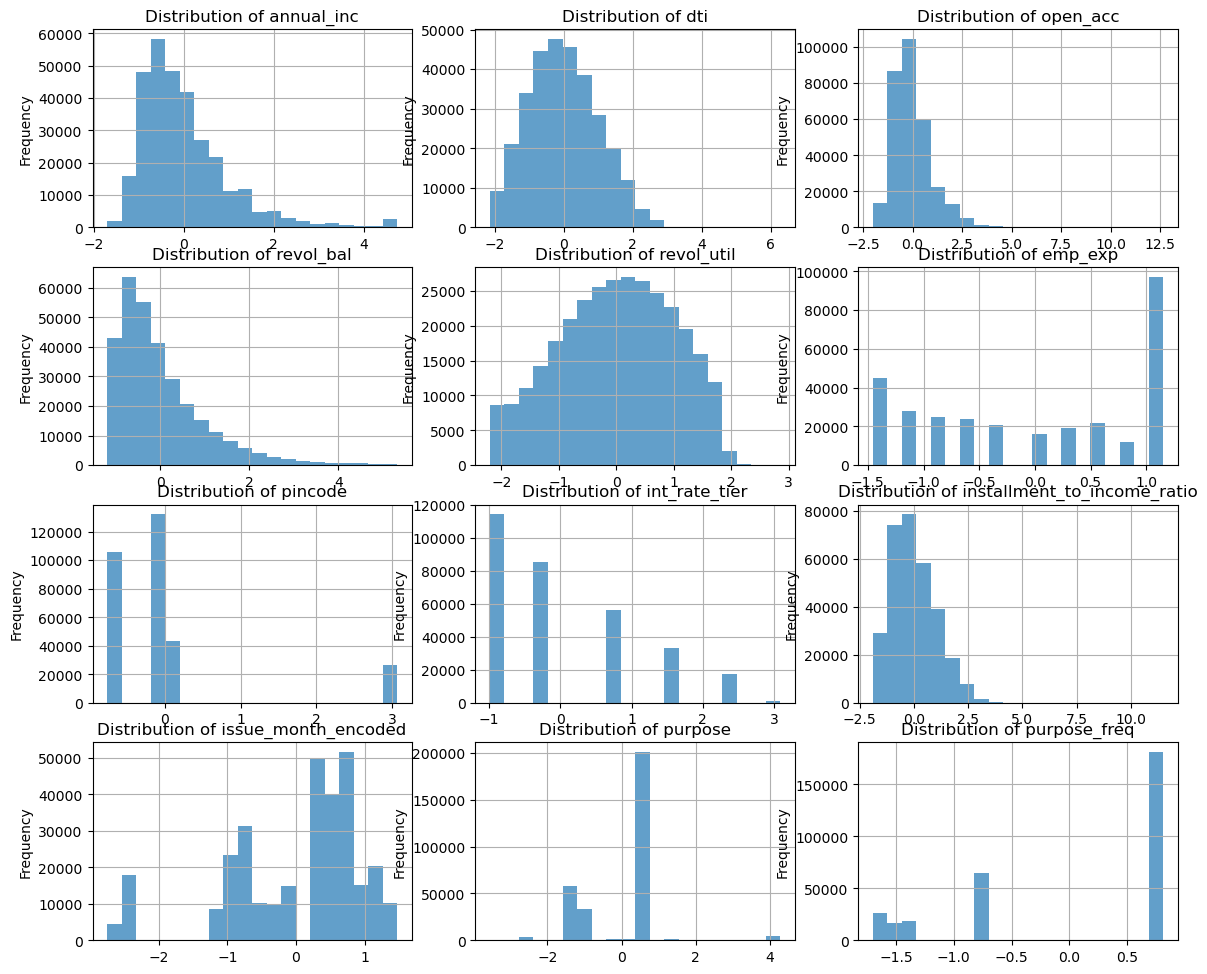

In [14]:
rows = len(features_to_scale)//2
cols = len(features_to_scale)//rows + 1
i = 1
plt.figure(figsize=(14, 18))

for feature in features_to_scale:
    plt.subplot(rows, cols, i)
    X_train[feature].hist(bins=20, alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(None)
    plt.ylabel('Frequency')
    i += 1
plt.show()

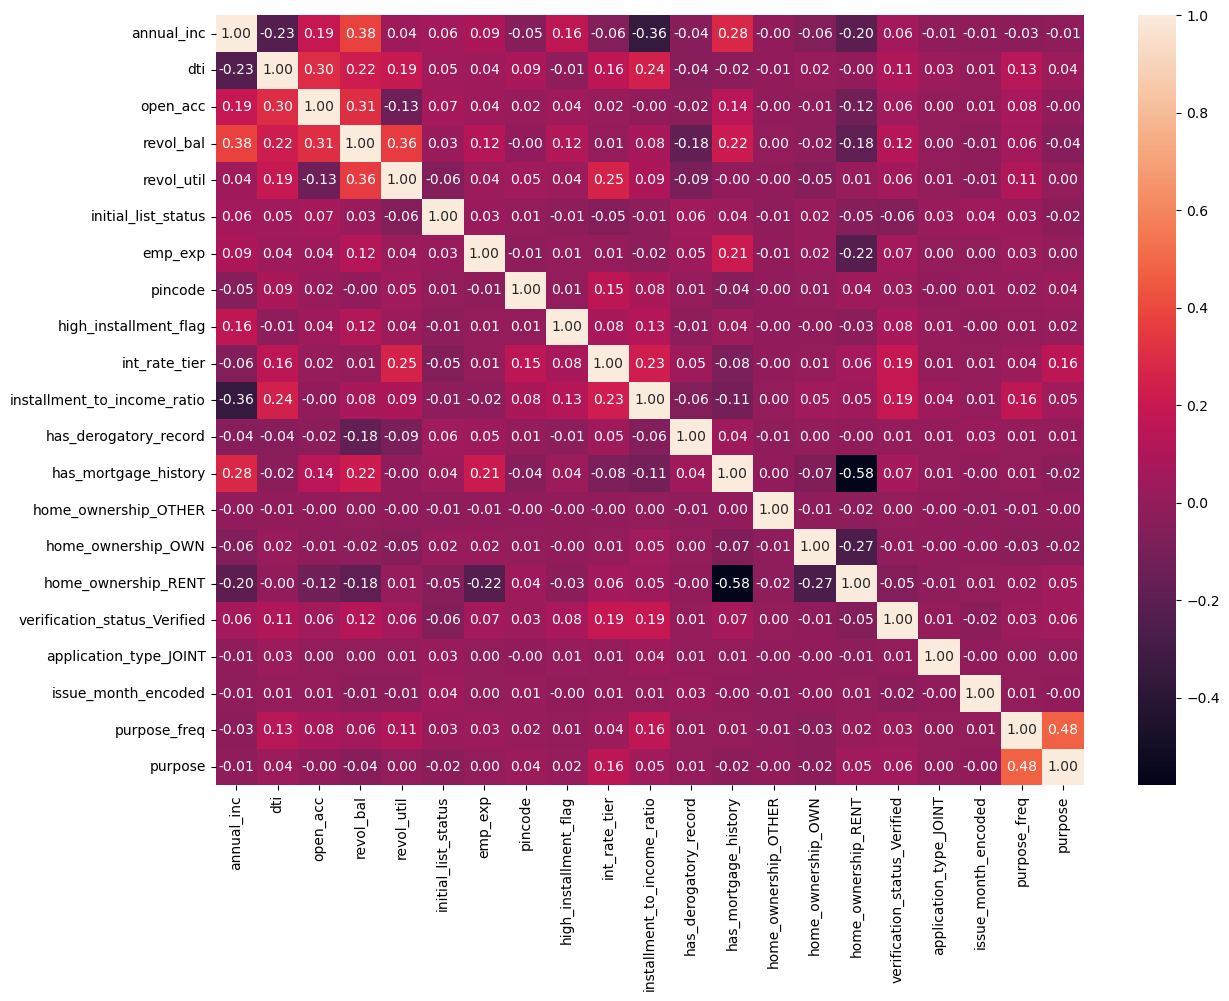

In [15]:
plt.figure(figsize=(14, 10))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f')
plt.show()

In [16]:
from sklearn.feature_selection import RFECV

#### Recursive Feature Elimination
- *Initialize logistic regression with class_weight='balanced as we have highly imbalance data'*

In [17]:
# initiailze estimator
log_reg = LogisticRegression(max_iter=1000)
# Initialize RFECV instance with 5 fold cross validation
rfe = RFECV(estimator=log_reg, cv=5, verbose=1)
# fit rfe
rfe.fit(X_train, y_train)

print("Optimal number of features:", rfe.n_features_)
print("Selected features:", X_train.columns[rfe.support_])

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.


#### RFE selected features
##### 17 features are selected as predictor variables for default
- ***Loan Terms**: installment_to_income_ratio, dti*
- ***Loan timelines**: issue_month*
- ***Credit History**: open_acc, revol_bal, revol_util, initial_list_status*
- ***Risk Flags**: high_installment_flag, high_dti_flag*
- ***Borrower Stats**: annual_inc, emp_exp,has_derogatory_record, home ownership_OWN/RENT/OTHER, mortgage_history, application and verification**
- ***Geographic**: pincode*
- ***Reason**: purpose*
#### Run Logistic Regression on the selected features and check the results

In [18]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, auc, f1_score

In [19]:
# selected features
selected_features = X_train.columns[rfe.support_]
# initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
# fit
log_reg.fit(X_train[selected_features], y_train)
# predict
y_pred_test = log_reg.predict(X_test[selected_features])
# display classification report
print("Test Prediction")
print(classification_report(y_test, y_pred_test))

Test Prediction
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     61657
           1       0.94      0.46      0.62     15301

    accuracy                           0.89     76958
   macro avg       0.91      0.73      0.78     76958
weighted avg       0.89      0.89      0.87     76958



In [20]:
# predict on train
y_pred_train = log_reg.predict(X_train[selected_features])
# display classification report
print("Train Prediction")
print(classification_report(y_train, y_pred_train))

Train Prediction
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    246628
           1       0.94      0.46      0.61     61201

    accuracy                           0.89    307829
   macro avg       0.91      0.72      0.77    307829
weighted avg       0.89      0.89      0.87    307829



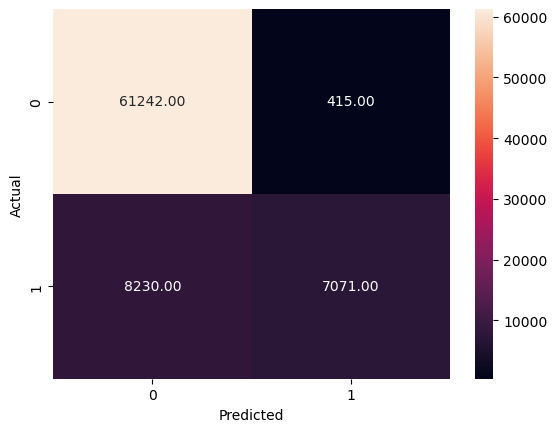

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Train and Test prediction analysis:
- *Accuracy, Precision, Recall and other metrics are nearly equal for both training and test predictions.*
- *Signifying a generalized model (no overfit)*
#### Key Observations (Test report)
##### Good Loan (0):
- *88% of actual safe loans (class 0) were correctly predicted as safe.*
- *99% of all predictions for safe loans were actually safe loans.*
##### Default (1):
- *95% of all predictions for risky loans (class 1) were actually risky loans.*
- *Only 46% of actual risky loans were correctly identified as risky.*
##### Overall:
- *The overall accuracy of the predictions was 89%.*
- *The model performed much better at identifying safe loans than risky loans.*
##### Lets check the coefficients

coefficients
pincode                          8.369761
int_rate_tier                    0.466596
dti                              0.220573
home_ownership_RENT              0.206490
installment_to_income_ratio      0.158818
home_ownership_OWN               0.111555
has_derogatory_record            0.101642
initial_list_status              0.100395
revol_util                       0.082704
purpose                          0.070351
revol_bal                       -0.057382
has_mortgage_history            -0.098116
application_type_JOINT          -0.201826
high_installment_flag           -0.230396

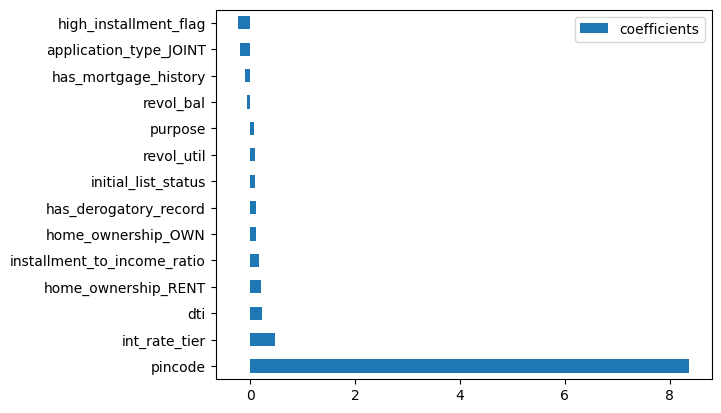

In [22]:
coef_df = pd.DataFrame(data=np.squeeze(log_reg.coef_), index=X_train[selected_features].columns, columns=['coefficients'])
coef_df.sort_values(by='coefficients', ascending=False, inplace=True)
coef_df.plot.barh()
coef_df

#### Key Factors Influencing Default Risk (Based on Coefficient Direction and Magnitude):
##### Strong Positive Impact (Increased Default Risk):
- *pincode (8.40): By far the strongest positive predictor. (Needs careful scrutiny due to target encoding).*
- *purpose (2.34): The reason for the loan is a strong indicator of default risk.*
- *int_rate_tier (0.47): Higher interest rate tiers are associated with increased default risk.*
##### Moderate Positive Impact (Increased Default Risk):
- *Home Ownership (RENT, OTHER, OWN) (0.20, 0.13, 0.11): Renters and those with 'other' or 'owned' (outright) homes have a higher risk of default compared to the baseline (likely 'MORTGAGE').*
- *Debt & Income Ratios (dti, installment_to_income_ratio) (0.19, 0.16): Higher debt-to-income and installment-to-income ratios increase default likelihood.*
- *Financial History (has_derogatory_record, revol_util, open_acc) (0.13, 0.11, 0.07): Presence of derogatory records, higher revolving credit utilization, and a greater number of open credit accounts are associated with higher default risk.*
##### Small Negative Impact (Decreased Default Risk):
- *Verification Status (Verified) (-0.02): Income verification has a very slight negative association with default.*
- *Employment Experience (emp_exp) (-0.02): Longer employment experience shows a very slight decrease in default risk.*
- *Financial Standing (annual_inc, revol_bal) (-0.05, -0.06): Higher annual income and higher revolving credit balance show a small decrease in default risk.*
- *Having Mortgage history slightly reduces risk factors.*
- *High Installment Flag (-0.07): Surprisingly, the flag indicating a high installment is associated with a slight decrease in default risk.*
- **Deleting high installment flag as it is counterintuitive and having not much difference between default and repaid loans (as observed earlier).**
##### Strong Negative Impact (Decreased Default Risk):
- *Application Type (JOINT) (-1.47): Joint loan applications have a significantly lower risk of default compared to individual applications.*

In [23]:
# X_train = X_train.drop(['high_installment_flag'], axis=1)
# X_test = X_test.drop(['high_installment_flag'], axis=1)
# X_train.shape

In [24]:
# # initialize Logistic Regression
# log_reg = LogisticRegression(max_iter=1000)
# # fit
# log_reg.fit(X_train, y_train)
# # predict
# y_pred_test = log_reg.predict(X_test)
# # display classification report
# print(classification_report(y_test, y_pred_test))

#### Virtually same results as before
- *excluding the installment flag made no change.*

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings

warnings.filterwarnings('ignore')

In [42]:
# define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'class_weight': ['balanced', None],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}

# Set up GridSearchCV with multiple scoring metrics
scoring = {'f1': 'f1',
           'precision': 'precision',
           'recall': 'recall'}

In [43]:
# initialize grid search
grid_search = GridSearchCV(LogisticRegression(random_state=42),
                           param_grid,
                           scoring=scoring,
                           refit='f1',  # Choose F1-score to select the best parameters
                           cv=5,
                           n_jobs=2,
                           verbose=2)

In [44]:
grid_search.fit(X_train[selected_features], y_train)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# access the results for other metrics as well:
print("Best Precision:", grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
print("Best Recall:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'C': 0.001, 'class_weight': 'balanced', 'l1_ratio': 0, 'penalty': 'l2'}
Best F1-score: 0.6224574929283965
Best Precision: 0.53680658628102
Best Recall: 0.7406742101573358


              precision    recall  f1-score   support

           0       0.93      0.83      0.88     61657
           1       0.53      0.75      0.62     15301

    accuracy                           0.82     76958
   macro avg       0.73      0.79      0.75     76958
weighted avg       0.85      0.82      0.83     76958



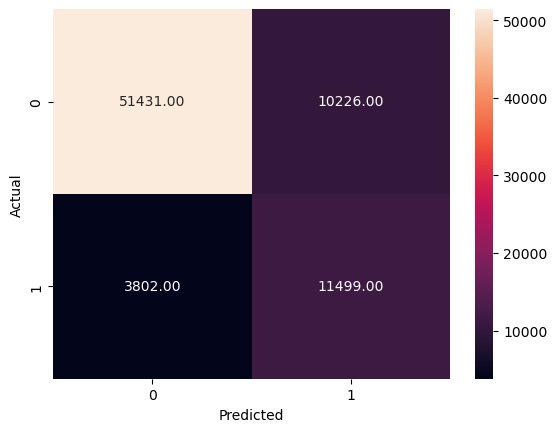

In [45]:
# initialize Logistic Regression
log_reg = LogisticRegression(**grid_search.best_params_)
# fit
log_reg.fit(X_train[selected_features], y_train)
# predict
y_pred_test = log_reg.predict(X_test[selected_features])
# display classification report
print(classification_report(y_test, y_pred_test))

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [61]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score as f1

In [62]:
results = grid_search.cv_results_

In [63]:
top_indices = np.argsort(results['rank_test_f1'])
top_indices = top_indices[:5] # top 5 parameters

In [64]:
for i in top_indices:
    params = results['params'][i]
    model = LogisticRegression(**params, random_state=42)
    model.fit(X_train[selected_features], y_train)
    print(f"Train on model {i}, rank {results['rank_test_f1'][i]} with parameters {params}")

    y_pred = model.predict(X_test[selected_features])
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score = f1(y_test, y_pred)
    print("F1 score: ", f1_score, "Recall score: ", recall, "Precision score: ", precision)
    

Train on model 1, rank 1 with parameters {'C': 0.001, 'class_weight': 'balanced', 'l1_ratio': 0, 'penalty': 'l2'}
F1 score:  0.6211310970669259 Recall score:  0.7515195085288543 Precision score:  0.5292980437284235
Train on model 4, rank 1 with parameters {'C': 0.001, 'class_weight': 'balanced', 'l1_ratio': 0.25, 'penalty': 'l2'}
F1 score:  0.6211310970669259 Recall score:  0.7515195085288543 Precision score:  0.5292980437284235
Train on model 7, rank 1 with parameters {'C': 0.001, 'class_weight': 'balanced', 'l1_ratio': 0.5, 'penalty': 'l2'}
F1 score:  0.6211310970669259 Recall score:  0.7515195085288543 Precision score:  0.5292980437284235
Train on model 10, rank 1 with parameters {'C': 0.001, 'class_weight': 'balanced', 'l1_ratio': 0.75, 'penalty': 'l2'}
F1 score:  0.6211310970669259 Recall score:  0.7515195085288543 Precision score:  0.5292980437284235
Train on model 13, rank 1 with parameters {'C': 0.001, 'class_weight': 'balanced', 'l1_ratio': 1, 'penalty': 'l2'}
F1 score:  0.621

#### Interpretation:
##### Performance on "Fully Paid" Loans (Class 0):
- *Precision: 93%. When the model predicts a loan will be "Fully Paid," it's correct 93% of the time. This is excellent for LoanTap, as it means very few loans predicted to be safe will actually default, minimizing financial losses and maintaining customer trust as well as earn interests.*
- *Recall: 84%. The model correctly identifies 84% of all loans that actually get fully paid. LoanTap might want to improve this to ensure they're not missing out on too many good loan opportunities.*
##### Performance on "Charged Off/Defaulted" Loans (Class 1):
- *Precision: 53%. When the model predicts a loan will "Default," it's only correct 53% of the time. This means that nearly half of the loans we flag as high-risk might actually be good loans. This could lead to LoanTap rejecting creditworthy customers, impacting revenue and customer satisfaction.*
- *Recall: 75%. The model correctly identifies 75% of all loans that actually default. This is reasonably good for LoanTap in terms of risk management, as it catches a significant portion of bad loans. However, the low precision means there's a trade-off: we're catching many defaulters, but also incorrectly flagging many good loans.*
**Overall Accuracy: The overall accuracy of 82% is still high, but as discussed before, this is heavily influenced by the performance on the majority class in an imbalanced dataset.**
##### F1-Scores:
- *The F1-score balances precision and recall.*
- *For "Fully Paid" (Class 0), the F1-score is 0.88, which is high, indicating a good balance.*
- *For "Charged Off/Defaulted" (Class 1), the F1-score is 0.62. This is lower, driven by the low precision.*

In [31]:
y_pred_proba = log_reg.predict_proba(X_test[selected_features])[:, 1]
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)

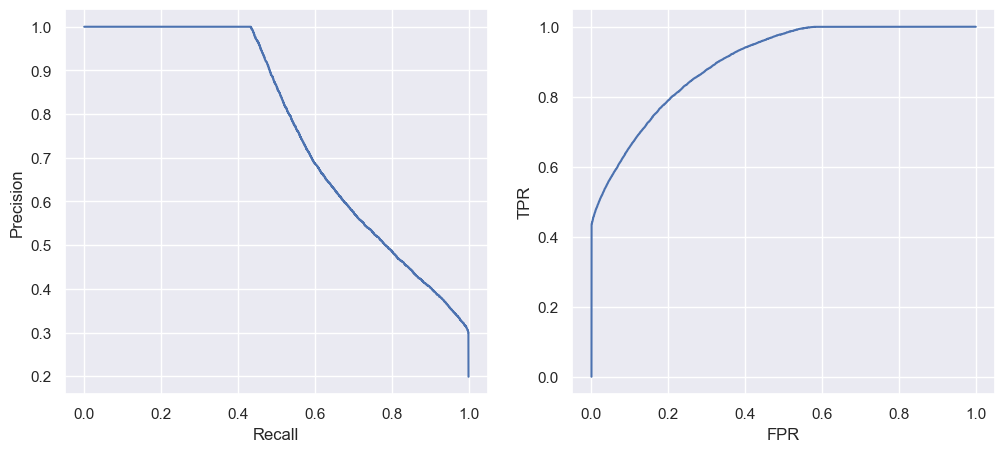

Area under ROC 0.8992375420703134
Area under PRC 0.7687090457651591
F1 score 0.621134786248616


In [32]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.subplot(122)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
print("Area under ROC", auc(fpr, tpr))
print("Area under PRC", auc(recall, precision))
print("F1 score", f1_score(y_test, y_pred_test))

#### Area Under the ROC Curve (AUC): 0.9
- *This is a very good AUC score. It indicates that the model has a high ability to distinguish between the 'Fully Paid' and 'Charged Off' classes across all possible classification thresholds. A score closer to 1 suggests better separability.*
- *A higher AUC means the model is better at ranking loans by their risk of default. This is valuable for LoanTap because it allows them to prioritize high-risk loans for closer scrutiny or adjust loan approval criteria.*
- *It evaluates the model's ability to *rank* instances, not its ability to make classifications at a specific threshold(Threshold independent).*

#### Area Under the Precision-Recall Curve (AUC-PRC): 0.769
##### In credit risk, LoanTap cares about both Precision and Recall
- *The AUC-PRC is a good score, especially for an imbalanced dataset. It summarizes the trade-off between precision and recall across different thresholds. Our model performed decently with highest balance around 0.53 Precision and 0.75 Recall.*
- *During a loan application classification, it might perform poorly on recognizing a good loan and might right it off as bad (53% chance). But on the bright side, 75% of the time it will prevent the company from handing out loans which won't ever be repaid, causing financial losses.*
##### The high AUC-PRC suggests that there are thresholds that could potentially achieve a better balance of precision and recall for the 'Charged Off' class than what is observed at default threshold of 0.5.

In [34]:
for thr in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    y_probs = log_reg.predict_proba(X_test[selected_features])[:, 1]
    adjusted_preds = (y_probs > thr).astype(int)
    print(f"At threshold {round(thr, 2)}: Precision: {round(precision_score(y_test, adjusted_preds), 2)}; Recall: {round(recall_score(y_test, adjusted_preds), 2)}; F1 score: {round(f1_score(y_test, adjusted_preds), 2)}")

At threshold 0.1: Precision: 0.28; Recall: 1.0; F1 score: 0.44
At threshold 0.2: Precision: 0.3; Recall: 1.0; F1 score: 0.46
At threshold 0.3: Precision: 0.35; Recall: 0.96; F1 score: 0.51
At threshold 0.4: Precision: 0.42; Recall: 0.87; F1 score: 0.57
At threshold 0.5: Precision: 0.53; Recall: 0.75; F1 score: 0.62
At threshold 0.6: Precision: 0.66; Recall: 0.62; F1 score: 0.64
At threshold 0.7: Precision: 0.83; Recall: 0.52; F1 score: 0.64
At threshold 0.8: Precision: 0.97; Recall: 0.45; F1 score: 0.61
At threshold 0.9: Precision: 1.0; Recall: 0.43; F1 score: 0.6


##### Mid-Range Thresholds (0.4 - 0.6):
- *Balanced Performance: As the threshold increases, precision improves while recall decreases. The F1-score peaks in this range, suggesting a better balance between correctly identifying defaults and minimizing false alarms. The F1-score is highest at thresholds 0.6 and 0.7 (0.64).*
##### Lower Thresholds (0.1 - 0.3):
- *High Recall, Low Precision: As we lower the threshold, the model becomes more aggressive in predicting 'Charged Off'. It captures almost all (or a very high proportion) of the actual defaults (recall approaches 1.0). However, this comes at the cost of very low precision. A large number of 'Fully Paid' loans are incorrectly classified as 'Charged Off' (many false positives). The F1-score is relatively low in this range, indicating an imbalance between precision and recall.*
##### Higher Thresholds (0.7 - 0.9):
- *High Precision, Low Recall: At higher thresholds, the model becomes very conservative in predicting 'Charged Off'. When it does predict a default, it's very likely to be correct (high precision). However, it misses a significant number of actual defaults (low recall). The F1-score starts to decline as recall drops more sharply than precision increases. At a threshold of 0.9 and 1.0, the precision becomes perfect (1.0), but the recall is quite low (0.43), meaning the model only identifies a small fraction of the defaults.*

#### Key Observations and Recommendations:
##### Optimal F1-Score:
- *The highest F1-score (0.64) is achieved at thresholds of 0.6 and 0.7. This suggests that these thresholds provide the best balance between precision and recall for our model on the test set. Best balance=> At threshold 0.6: Precision: 0.66; Recall: 0.63; F1 score: 0.64*
##### Trade-off Decision:**The "best" threshold ultimately depends on the specific business context and the relative costs of false positives (incorrectly classifying a safe loan as risky) and false negatives (incorrectly classifying a risky loan as safe).**
- *If the cost of missing a default (false negative) is very high, it might be better to lean towards a lower threshold (around 0.4-0.5) to maximize recall, even if it means accepting more false positives.*
- *If the cost of incorrectly flagging a safe loan as risky (false positive) is very high (e.g., damaging customer relationships, losing on opportunity to earn more interest), it might be preferable to have a higher threshold (around 0.7) to increase precision, even if it means missing more defaults.*
#### Considering Threshold 0.6 or 0.7: Based purely on maximizing the F1-score and balance between precision and recall, a threshold of 0.6 or 0.7 appears to be a good choice. At these points, we achieve a reasonable balance between precision (0.66 or 0.83) and recall (0.63 or 0.52).

coefficients
pincode                          3.293618
int_rate_tier                    0.448470
dti                              0.207221
home_ownership_RENT              0.171979
installment_to_income_ratio      0.152479
home_ownership_OWN               0.091829
has_derogatory_record            0.089404
initial_list_status              0.087064
revol_util                       0.086381
purpose                          0.068137
application_type_JOINT          -0.026983
high_installment_flag           -0.051699
revol_bal                       -0.057969
has_mortgage_history            -0.104693

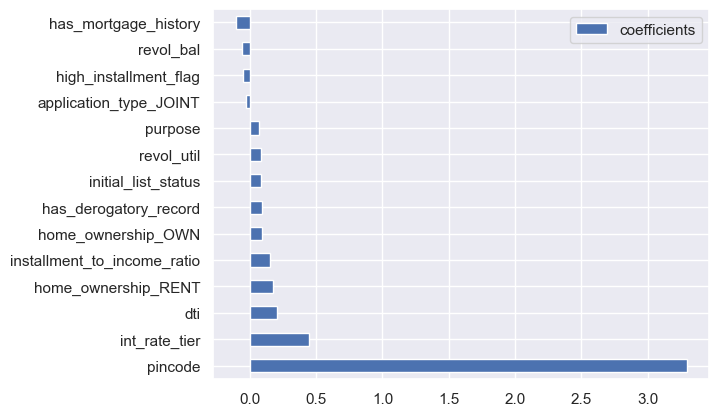

In [35]:
coef_df = pd.DataFrame(data=np.squeeze(log_reg.coef_), index=X_train[selected_features].columns, columns=['coefficients'])
coef_df.sort_values(by='coefficients', ascending=False, inplace=True)
coef_df.plot.barh()
coef_df

#### Key Takeaway:
- *Factors related to the borrower's financial health (debt burden, income, credit utilization, derogatory records), loan terms (interest rate, installment relative to income), and even geographic location (via pincode) appear to be the most influential predictors of loan default in this model.*
#### Strongly Increasing Default Risk:
- *pincode: Specific geographic areas (as encoded) strongly correlate with higher default risk.*
- *int_rate_tier: Higher interest rates on the loan significantly increase the likelihood of default.*
- *dti: Higher debt-to-income ratio makes default more probable.*
- *installment_to_income_ratio: A larger portion of income going towards loan payments increases default risk.*
#### Slightly Increasing/Decreasing Default Risk (Smaller Coefficients):
- *home_ownership_OWN: Homeowners (without mortgages) have a slightly higher default risk than those with mortgages.*
- *annual_inc: Higher annual income is weakly associated with lower default risk.*
- *has_mortgage_history: Having a past mortgage history is linked to a slightly lower default risk.*

#### SMOTE
- *Our data has 80:20 ratio between the fully paid and charged off samples*
- *Imminently, bias is seen to prevail towards fully paid samples.*

In [36]:
from sklearn.compose import ColumnTransformer

In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.pipeline import Pipeline

In [38]:
# Applying SMOTE
smote = SMOTE(sampling_strategy='minority')
# upsample training data
X_sm, y_sm = smote.fit_resample(X_train, y_train)

print(y_sm.value_counts())

loan_status
0    246628
1    246628
Name: count, dtype: int64


In [39]:
# define parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'class_weight': ['balanced', None],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'l1_ratio': [0, 0.25, 0.5, 0.75, 1, None]}

# Set up GridSearchCV with multiple scoring metrics
scoring = {'f1': 'f1',
           'precision': 'precision',
           'recall': 'recall'}

# initialize grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42),
                           param_grid,
                           scoring=scoring,
                           refit='f1',  # Choose F1-score to select the best parameters
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_sm, y_sm)

print("Best parameters:", grid_search.best_params_)
print("Best F1-score:", grid_search.best_score_)

# access the results for other metrics as well:
print("Best Precision:", grid_search.cv_results_['mean_test_precision'][grid_search.best_index_])
print("Best Recall:", grid_search.cv_results_['mean_test_recall'][grid_search.best_index_])

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'C': 1, 'class_weight': 'balanced', 'l1_ratio': 0, 'penalty': 'l2'}
Best F1-score: 0.797125643264868
Best Precision: 0.8049127643557983
Best Recall: 0.7896022029055059


              precision    recall  f1-score   support

           0       0.93      0.81      0.86     61657
           1       0.49      0.76      0.60     15301

    accuracy                           0.80     76958
   macro avg       0.71      0.79      0.73     76958
weighted avg       0.85      0.80      0.81     76958



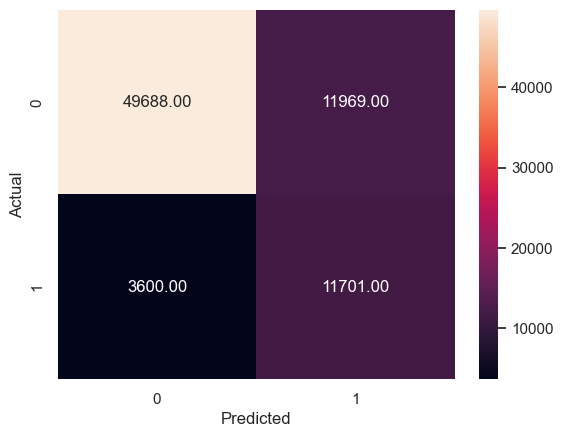

In [40]:
# initialize Logistic Regression
log_reg_best = grid_search.best_estimator_
# predict
y_pred_test = log_reg_best.predict(X_test)
# display classification report
print(classification_report(y_test, y_pred_test))

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Key Takeaways after upsampling and Grid Search:
- *To handle the imbalance in loan data (fewer defaults), upsampling was used, but it caused the model to learn the training data too well, including its noise, leading to poor performance on new loan applications.*
- *The best model is still our previous Logistic regression model with threshold tuning based on risk and cost to the company*

In [51]:
log_reg_l1 = LogisticRegression(solver='saga', class_weight='balanced', max_iter=1000, penalty='l1')
log_reg_l2 = LogisticRegression(solver='saga', class_weight='balanced', max_iter=1000, penalty='l2')

#fit each model
log_reg_l1.fit(X_train[selected_features], y_train)
log_reg_l2.fit(X_train[selected_features], y_train)

# predict for each model
y_pred_l1 = log_reg_l1.predict(X_test[selected_features])
y_pred_l2 = log_reg_l2.predict(X_test[selected_features])

# test classification metrics
print("Precision score for l1 penalty:", round(precision_score(y_test, y_pred_l1), 2), end=" ")
print("Precision score for l2 penalty:", round(precision_score(y_test, y_pred_l2), 2))

print("Recall score for l1 penalty:", round(recall_score(y_test, y_pred_l1), 2), end=" ")
print("Recall score for l2 penalty:", round(recall_score(y_test, y_pred_l2), 2))

print("F1 score for l1 penalty:", round(f1_score(y_test, y_pred_l1), 2), end=" ")
print("F1 score for l2 penalty:", round(f1_score(y_test, y_pred_l2), 2))

Precision score for l1 penalty: 0.5 Precision score for l2 penalty: 0.5
Recall score for l1 penalty: 0.79 Recall score for l2 penalty: 0.79
F1 score for l1 penalty: 0.61 F1 score for l2 penalty: 0.61


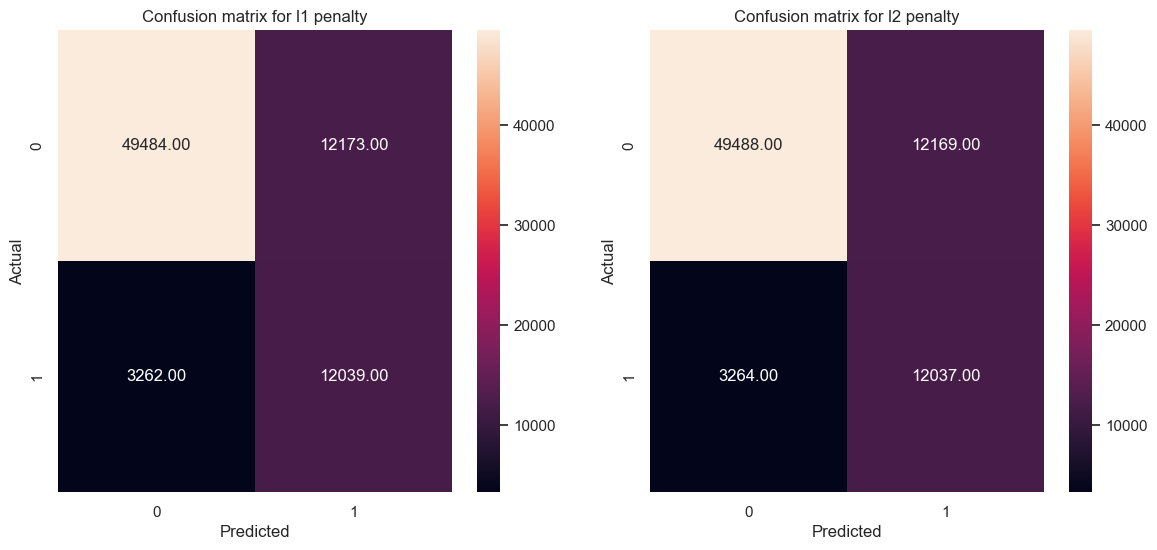

In [52]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test, y_pred_l1), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix for l1 penalty")
plt.subplot(122)
sns.heatmap(confusion_matrix(y_test, y_pred_l2), annot=True, fmt='.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix for l2 penalty")
plt.show()

#### Actionable Recommendations:
##### Refined Risk-Based Pricing:
- **Based on the wide range of interest rates (max 30.99%) and their impact, LoanTap should refine its risk-based pricing model.**
    - *Action: Implement more granular tiers based on factors like dti, revol_util, and pub_rec to price loans more accurately.*
- **Strictly enforce DTI limits, especially for high-risk groups (illogical outliers (e.g., 9999%)  and shows a correlation with loan status.)**
    - *Action: Cap DTI at a reasonable threshold (e.g., 40%-50%), implement automated checks for data accuracy, and consider lower DTI caps for renters.*
- **Implement a pincode-based risk layer on loan approvals (Pincode analysis reveals high-risk and low-risk geographic areas).**
    - *Action: Develop a risk map and adjust approval criteria or interest rates based on the applicant's pincode.*
- **Adjust marketing strategies based on loan purpose and grade (significant predictors of loan status).**
    - *Action: Focus marketing on lower-risk loan purposes and grades, and offer incentives for debt consolidation to reduce risk.*
- **Enhance assessment of employment stability (employee experience is a factor in loan risk prediction).**
    - *Action: Verify employment history and consider income stability in the approval process.*
- **Optimize the loan approval threshold to balance risk and profitability (The logistic regression model's performance varies significantly with different thresholds).**
    - *Action: Implementing a cost-to-profit analysis to determine the optimal threshold that maximizes profit while minimizing losses.*
- **Implement automated data validation to improve data quality (Outliers and inconsistencies exist in several numerical columns).**
    - *Action: Implement data validation rules during application to prevent errors and ensure data accuracy. Will help in model re-training in later stages.*

#### Model Monitoring and Iteration Methods for LoanTap:
- **Performance Tracking:**
    - *Continuously track key metrics (AUC, precision, recall, F1-score) on new loan data.*
- **Data Drift Detection:**
    - *Monitor for changes in the distribution of input features, which can degrade model performance.*
- **Relational Drift Analysis:**
    - *Assess if the relationship between features and loan status is changing over time.*
- **Retraining:**
    - *Retrain the model periodically with the latest data to adapt to evolving trends.*
- **Feedback Loop Implementation:**
    - *Incorporate feedback from loan officers and business stakeholders to improve the model.*

#### A typical pipline example to serialize the flow

In [ ]:
X_train

In [196]:
selected_features = ['annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'initial_list_status', 'emp_exp', 'pincode',
                     'int_rate_tier', 'installment_to_income_ratio', 'has_derogatory_record', 'has_mortgage_history',
                     'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Verified',
                     'application_type_JOINT', 'issue_month_encoded', 'purpose']  # Features to use
# columns to encode with target encoder
cols_to_encode = ['pincode', 'issue_month_encoded', 'purpose']
# features to scale
features_to_scale = ['annual_inc', 'dti', 'open_acc', 'revol_bal',
                     'revol_util', 'emp_exp', 'pincode', 'int_rate_tier',
                     'installment_to_income_ratio', 'issue_month_encoded']

# initialze column preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('target_encode', TargetEncoder(), cols_to_encode),
        ('scale', StandardScaler(), features_to_scale)
    ],
    remainder='passthrough' # Keep other columns as is
)

# construct pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(class_weight='balanced', C=0.001, penalty='l2', max_iter=1000))
    ]
)

In [197]:
# import data
df = pd.read_csv("cleaned_df.csv")
# keep separate unseen data
unseen = df.iloc[:10]

df = df.iloc[10:]

In [198]:
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

xtrain, xtest, ytrain, ytest = train_test_split(X[selected_features], y, test_size=0.2, stratify=y, random_state=42)
#train pipeline
pipeline.fit(xtrain, ytrain)

# classification results on test set
ypred_test = pipeline.predict(xtest)
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     61521
           1       0.53      0.72      0.61     15157

    accuracy                           0.82     76678
   macro avg       0.73      0.78      0.74     76678
weighted avg       0.85      0.82      0.83     76678



In [199]:
def predict_loan_status(new_data: pd.DataFrame, weightage=None) -> pd.Series:
    '''
        new_data: New dataframe for loan applicatin
                (must contains columns used in training)
        weightage: precision - for lower False Positives
                    recall - for lower false negatives
                    None - for balanced
    '''
    thr = 0.5
    if weightage == 'precision':
        thr = 0.45
    elif weightage == 'recall':
        thr = 0.65
    else:
        pass

    predicted_probablities = pipeline.predict_proba(new_data[selected_features])[:, 1]
    # print(predicted_probablities)
    adjusted_probablities = (predicted_probablities > thr).astype(int)
    # print(adjusted_probablities)
    statuses = pd.Series(adjusted_probablities).map({1: "Charged Off", 0: "Fully Paid"})

    return pd.Series(statuses)

In [200]:
# Predict loan status
unseen['predicted_loan_status'] = predict_loan_status(unseen[selected_features])
# preview
unseen[['loan_status', 'predicted_loan_status']]

loan_status predicted_loan_status
0            0            Fully Paid
1            0            Fully Paid
2            0            Fully Paid
3            0            Fully Paid
4            1           Charged Off
5            0            Fully Paid
6            0            Fully Paid
7            0            Fully Paid
8            0            Fully Paid
9            0            Fully Paid

#### Questionnaire
##### What percentage of customers have fully paid their Loan Amount?
- A: 80% (318357 of 396030) of the customers have fully repaid their loan.
##### Comment about the correlation between Loan Amount and Installment features.
- A: Higher loan amounts directly translate to larger monthly installments. There is a near-perfect positive correlation(0.95) between these two variables.
##### The majority of people have home ownership as _______.
- A: Mortgage with 198k+ customers. Around 50% of the customers are mortgage holders in the dataset.
##### People with grades ‘A’ are more likely to fully pay their loan. (T/F):
- A: True as seen in the dataset, the default rate rises from A to G (A being the lowest). Grade A Sub Grade A1 has only 2.9% default rate of all defaults.
##### Name the top 2 afforded job titles.
- A: Managers and Teachers are the top 2 most frequent borrowers with 80:20 repayment ratio confirming these two job titles as the most risk free and afforded.
##### Thinking from a bank's perspective, which metric should our primary focus be on: ROC AUC, Precision, Recall, F1 Score
- A: While ROC-AUC is a valuable metric to distinguish between creditworthy and risky borrowers, it can be misleading in the presence of imbalance in the dataset. In such cases, consider metrics more sensitive to minority class:-
    - Precision (for the minority class - defaulters): Minimizing false positives. High precision here means when the model predicts a default, it's very likely to be correct.
    - Recall (for the minority class - defaulters): Maximizing true positives. High recall means the model catches a large proportion of actual defaulters.
    - F1-Score (for the minority class - defaulters): The harmonic mean of precision and recall, providing a balanced view of the model's performance on the minority class.
##### How does the gap in precision and recall affect the bank?
- A: A significant gap between precision and recall translates to an imbalance in the types of errors the bank's loan approval model is making
    - High Precision, Low Recall: The model is very sure when it approves many loans (low false positives), but its missing many good loan applicants leading to business loss.
    - Low Precision, High Recall: The model approves many loans capturing many good applicants, but it also approves a high number of bad loans which increases risk for the bank.
##### Which were the features that heavily affected the outcome?
- A: The features that most affected the outcome are: annual_inc, term, int_rate, dti, installment, loan_amnt, emp_length_int, grade, home_ownership, purpose as per EDA. The Logistic Regression Model used pincode and mortgage history binary flag as the most important predictors, as well as engineerd feature installment_to_income and others.
##### Will the results be affected by geographical location? (Yes/No)
- A: Yes, as per the dataset, pincode having the highest coefficients translates to that, although geographic locations might contain high irregularities, so in-depth verification before approval.

##### Conclusion: Enhancing Loan Approval and Risk Management at LoanTap
**This analysis aimed to provide LoanTap with data-driven insights to refine its loan approval processes, mitigate risks, and capitalize on opportunities within its personal loan segment. Through a comprehensive examination of loan data, several key findings emerged, highlighting areas for strategic improvement.**